['data\\0', 'data\\1', 'data\\2', 'data\\3', 'data\\4']
5
40


C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py:59: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


40
40
40
40
complete!


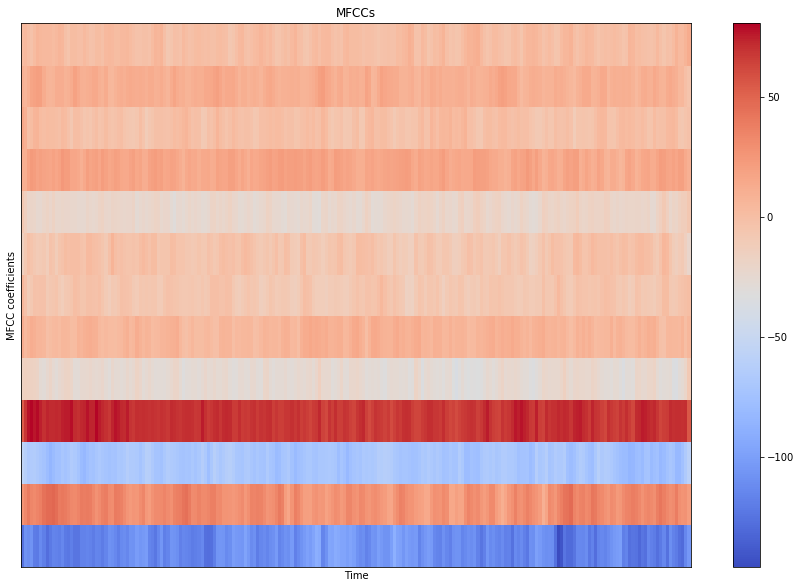

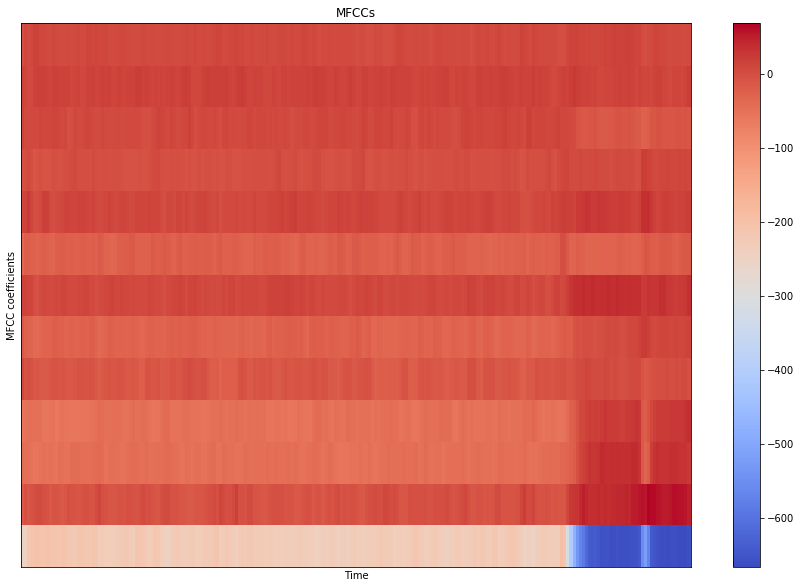

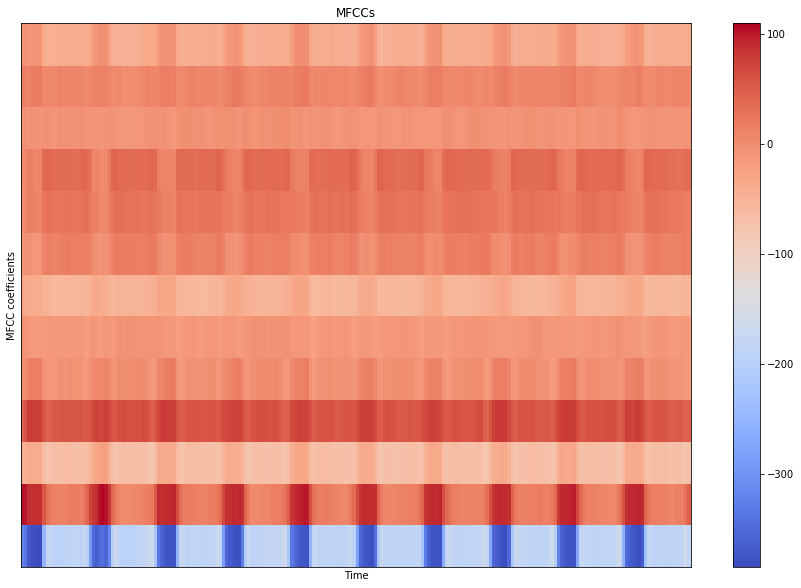

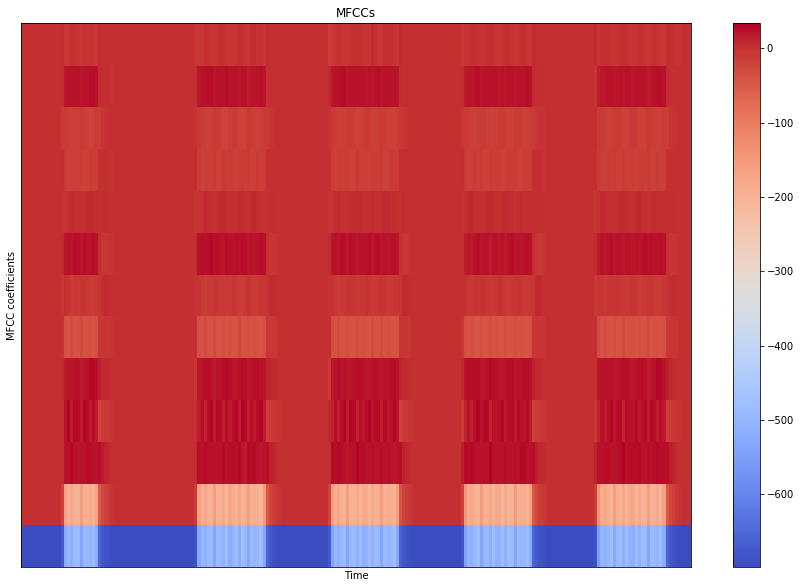

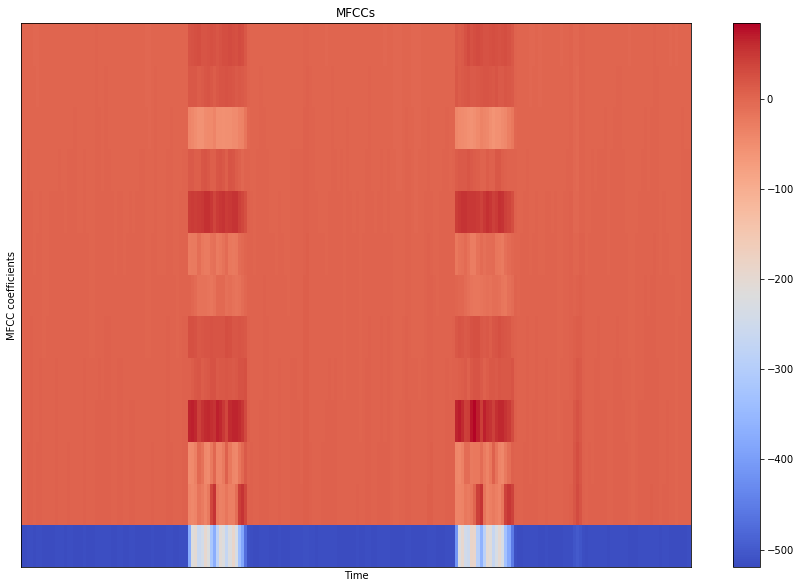

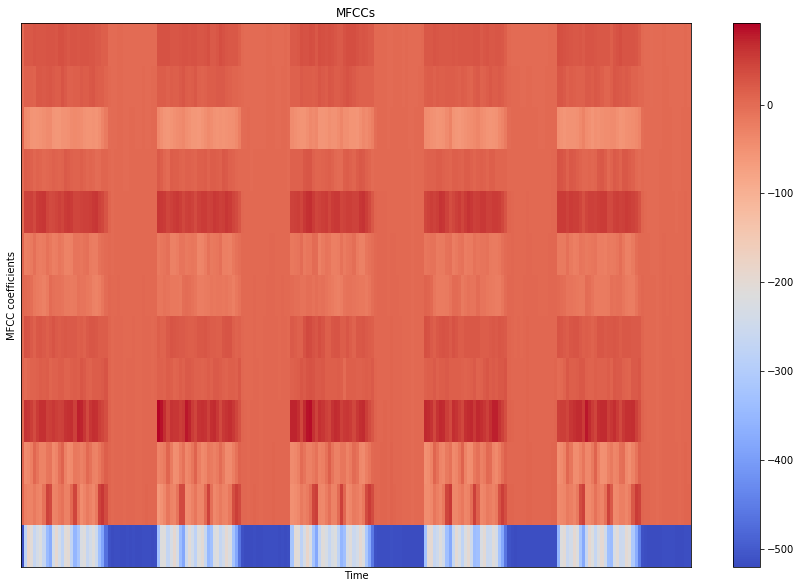

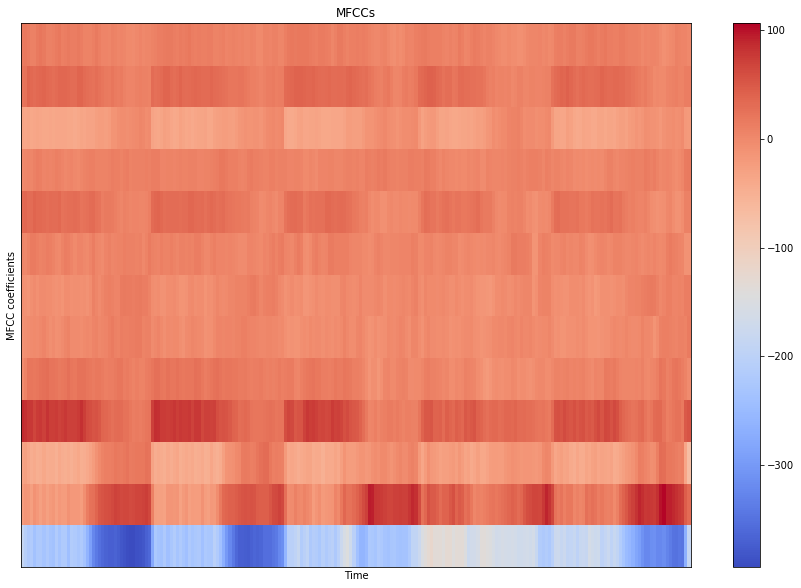

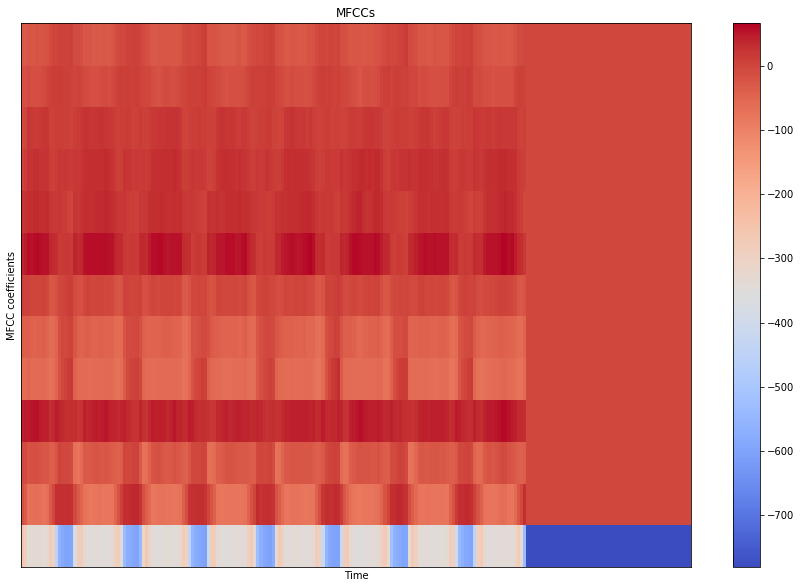

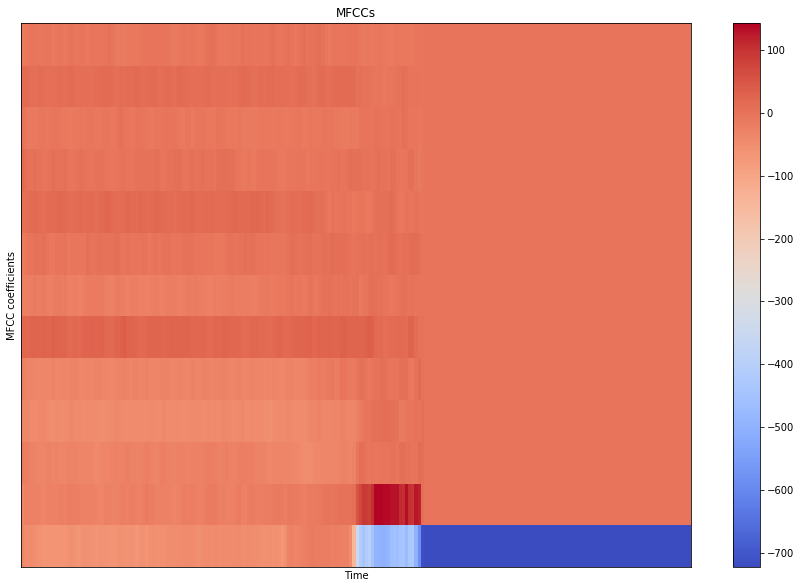

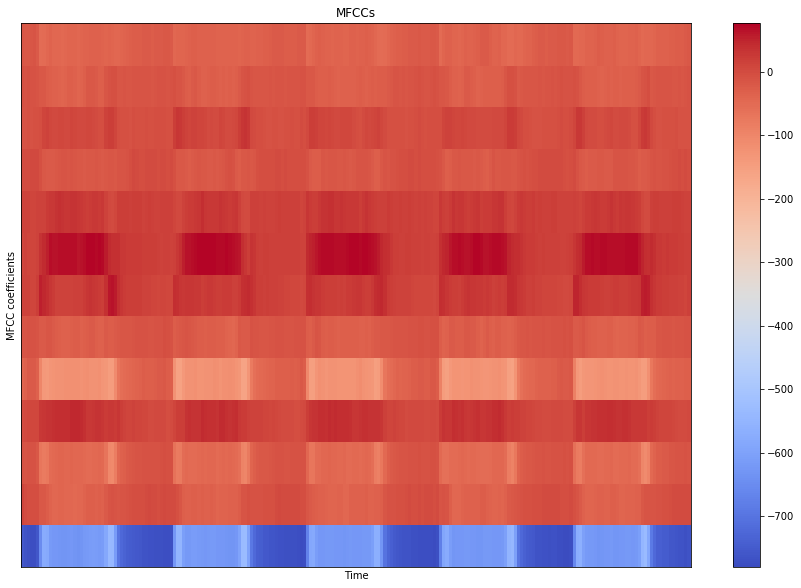

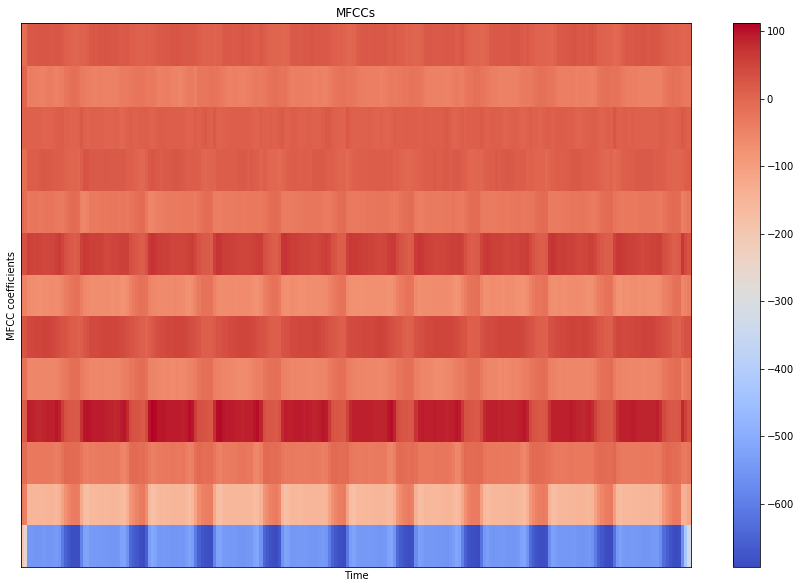

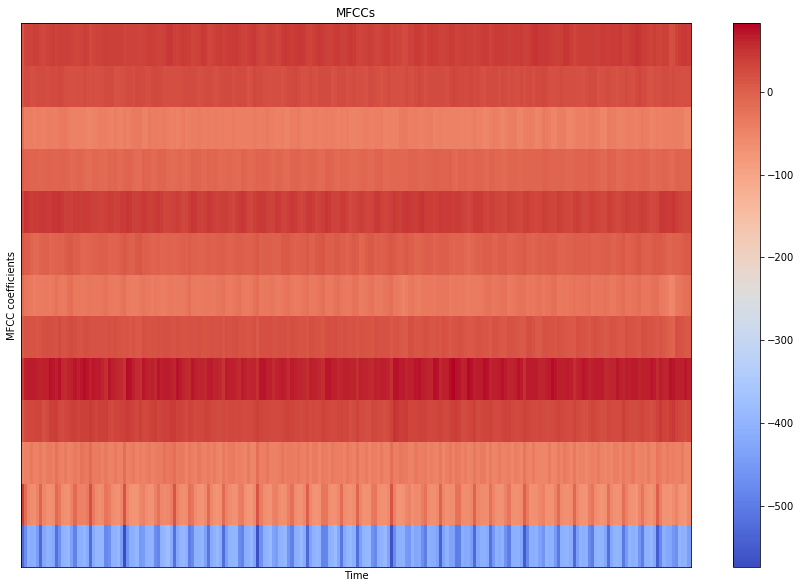

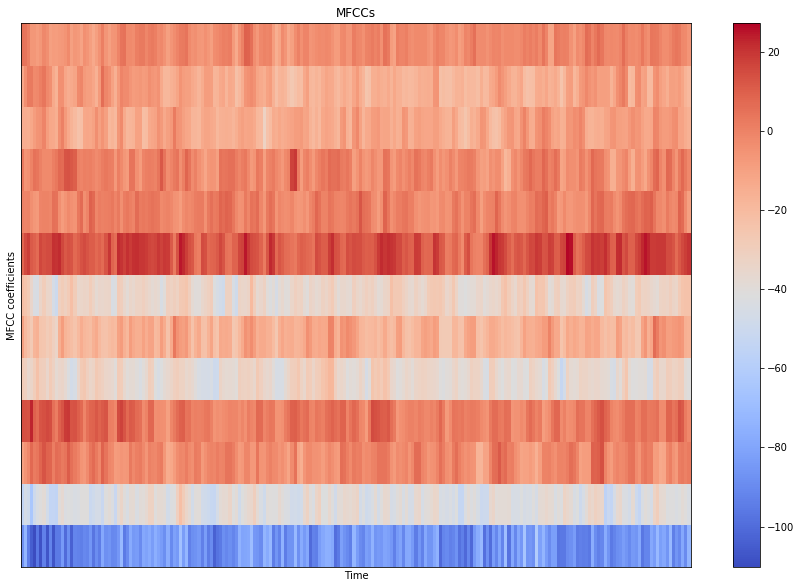

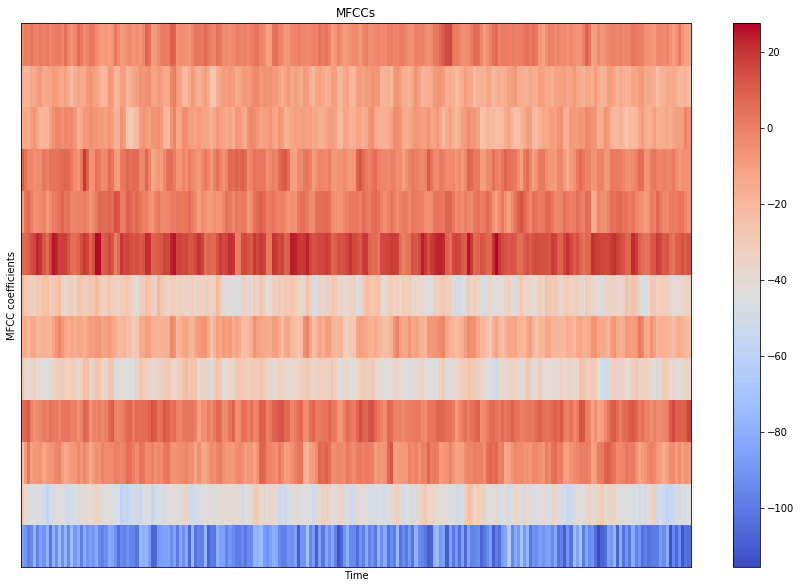

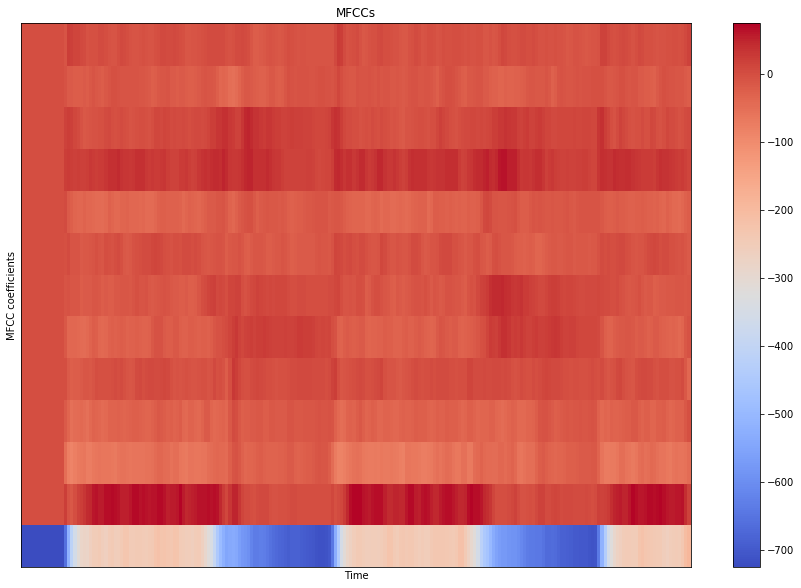

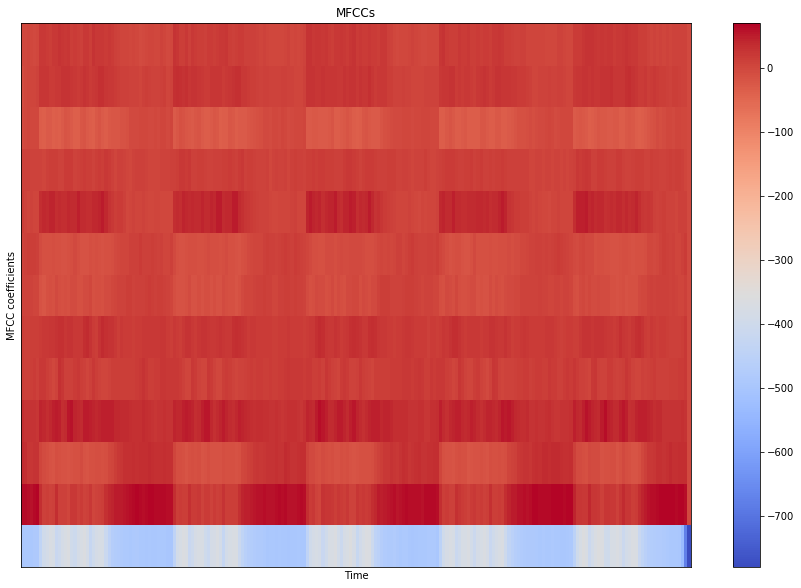

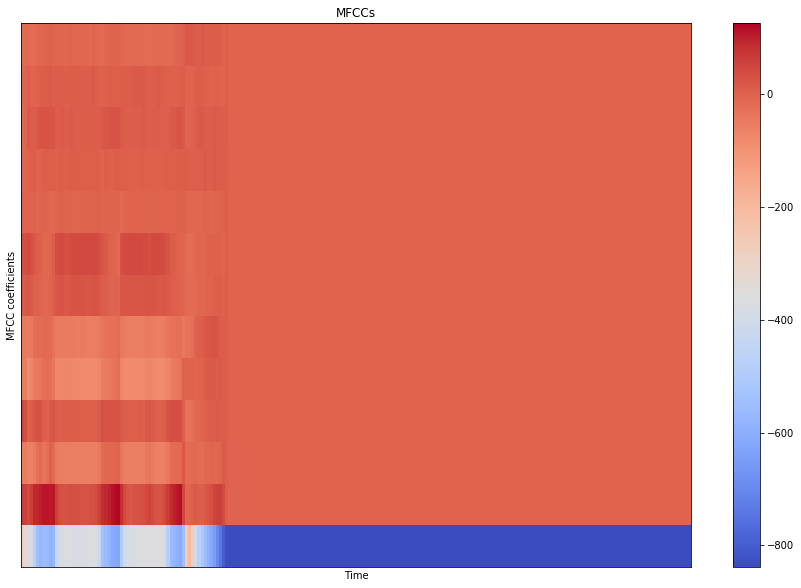

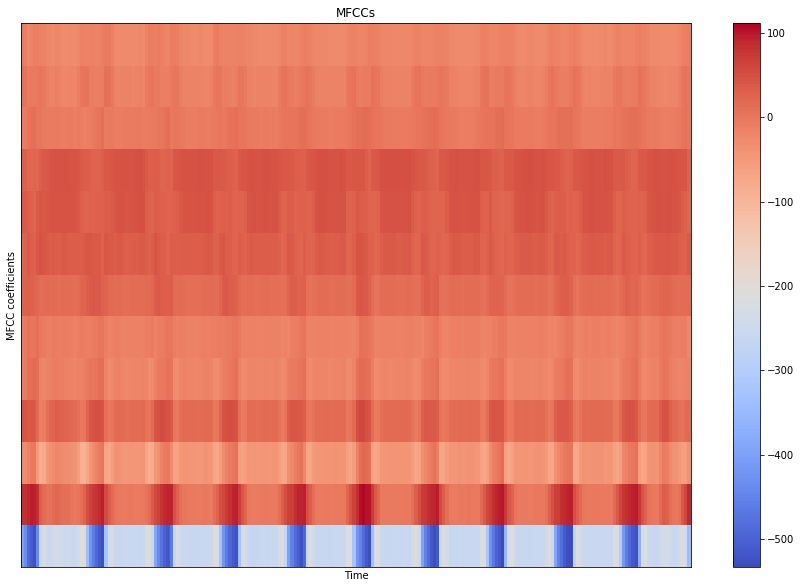

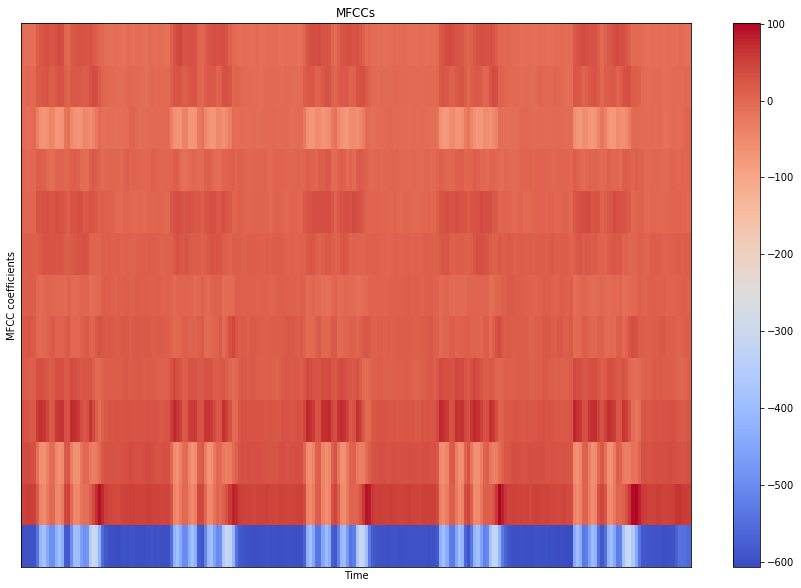

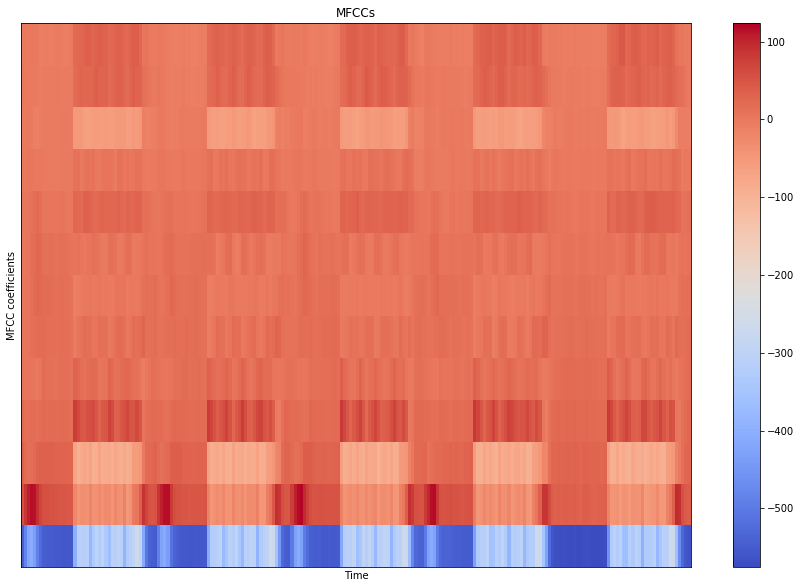

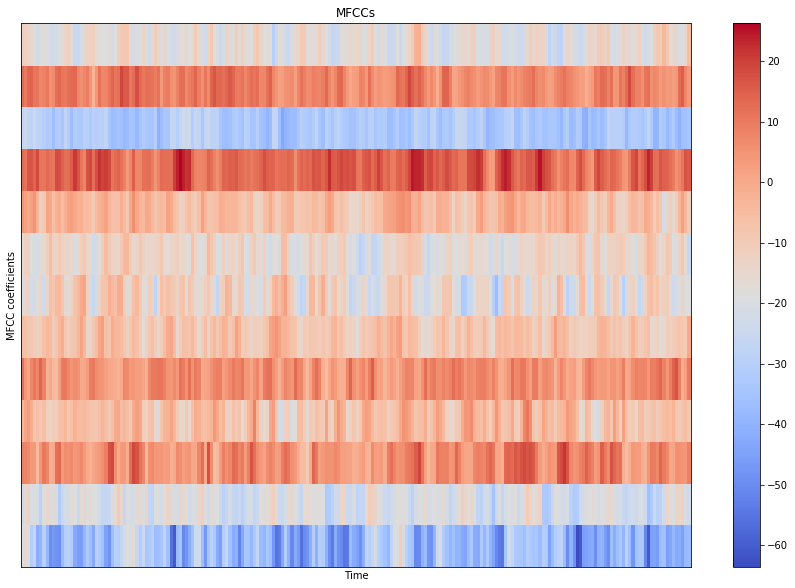

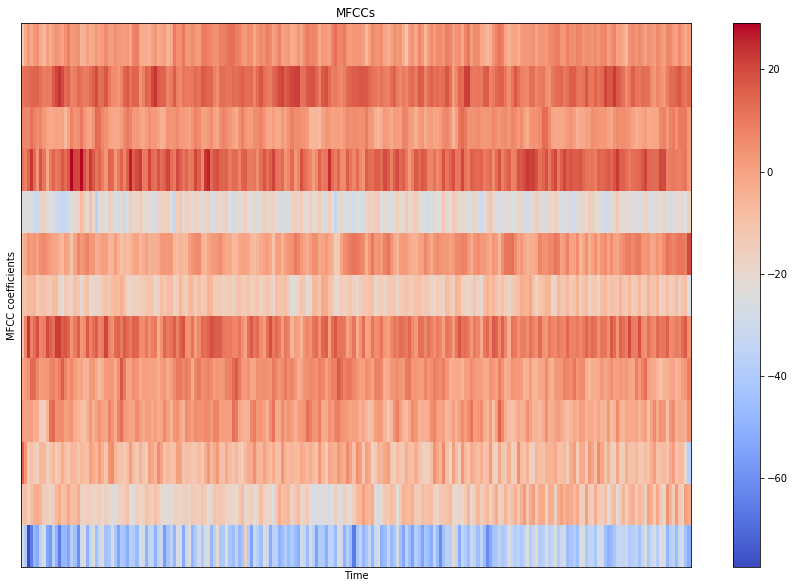

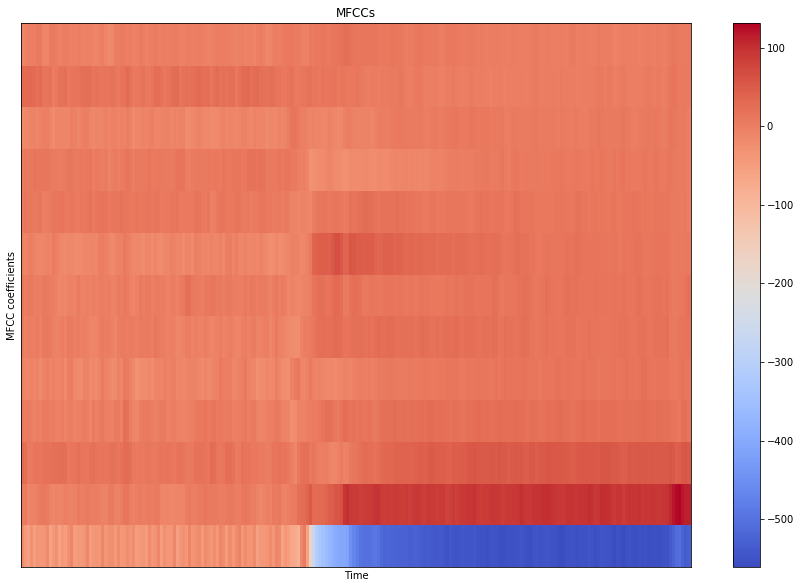

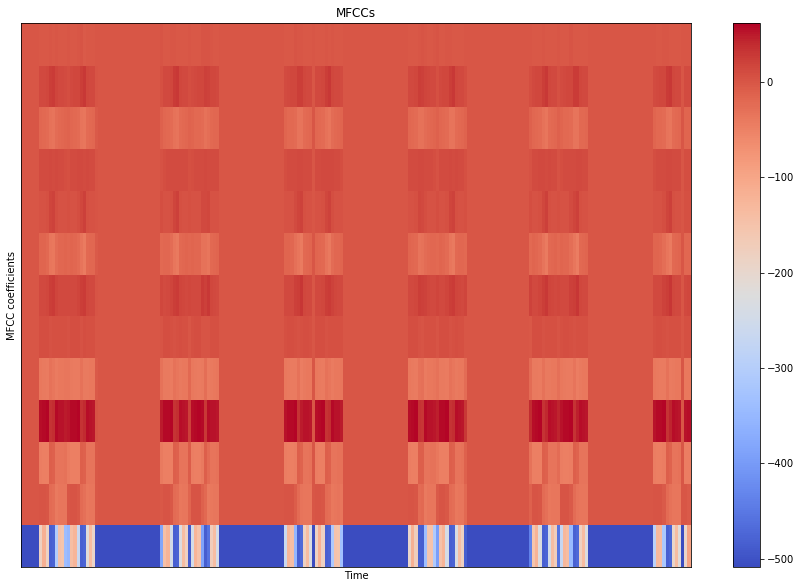

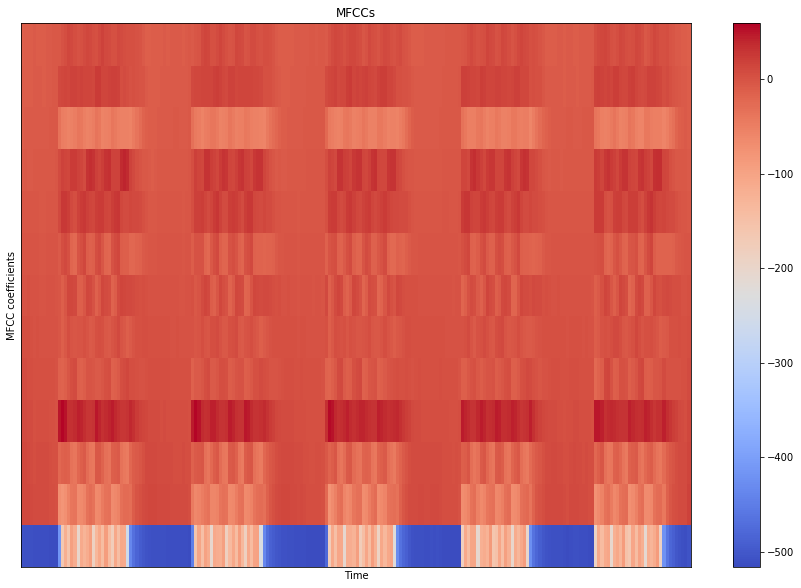

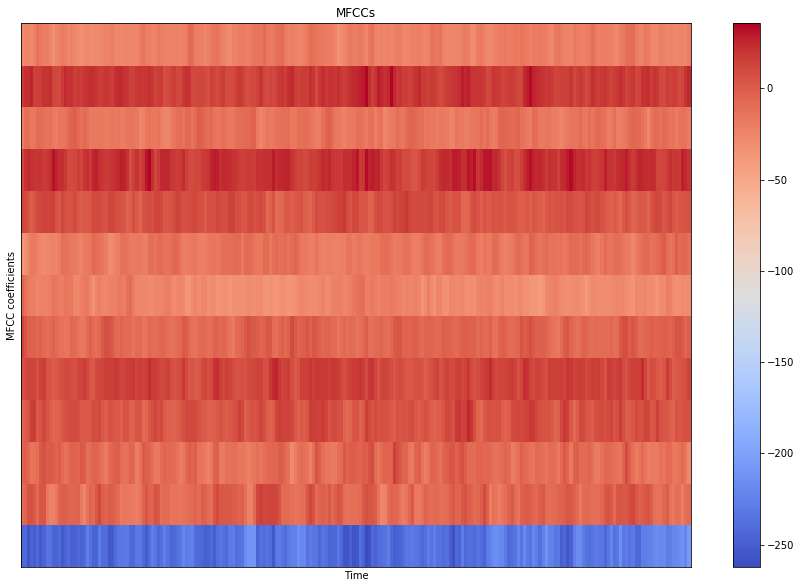

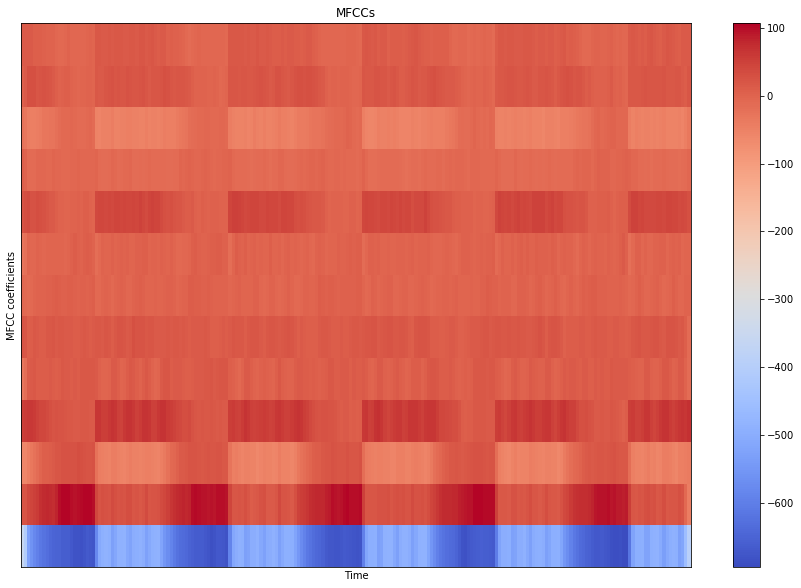

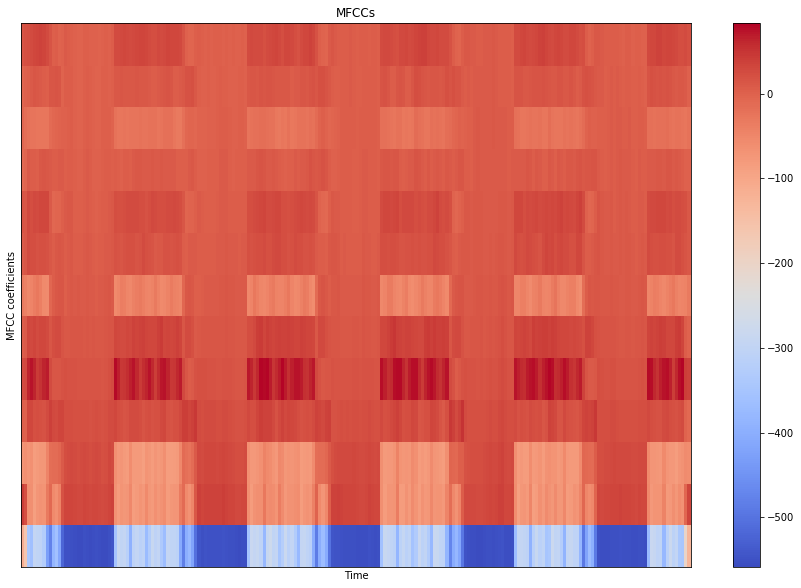

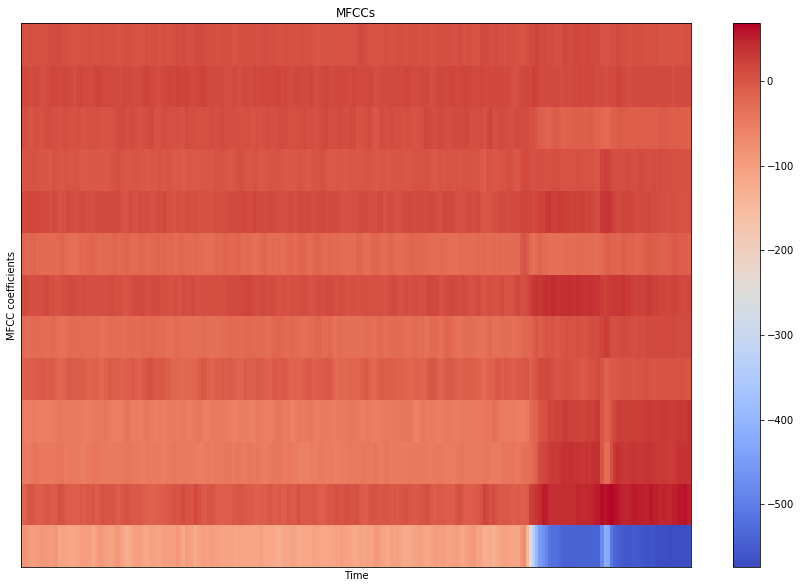

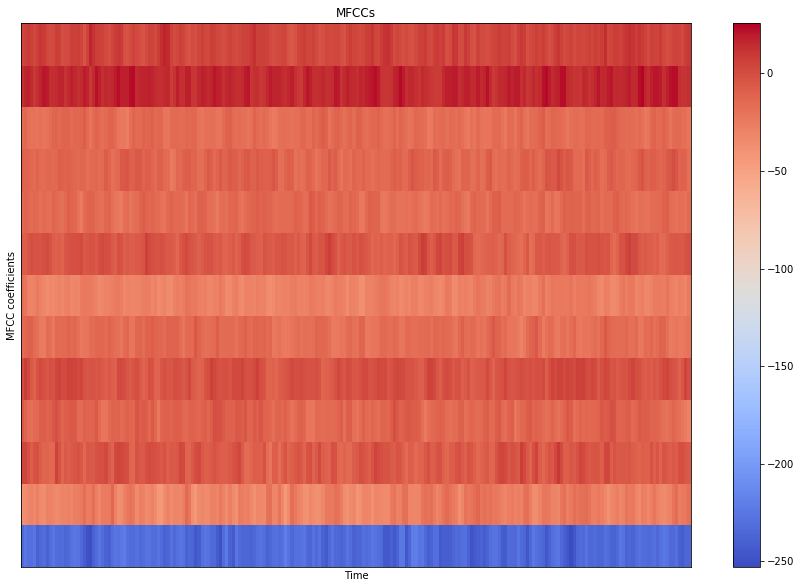

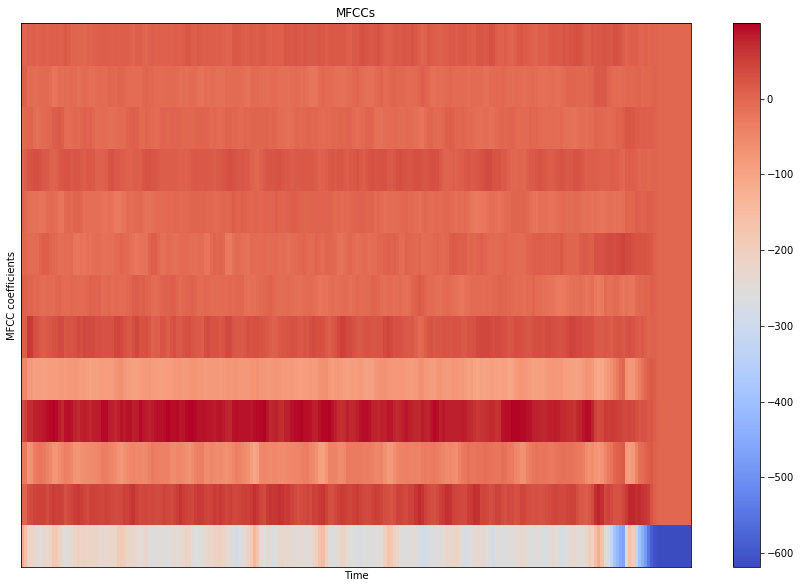

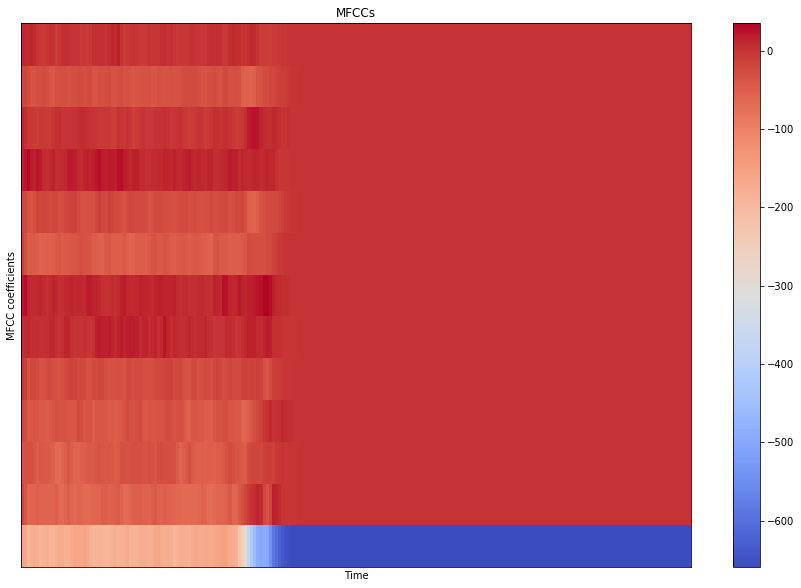

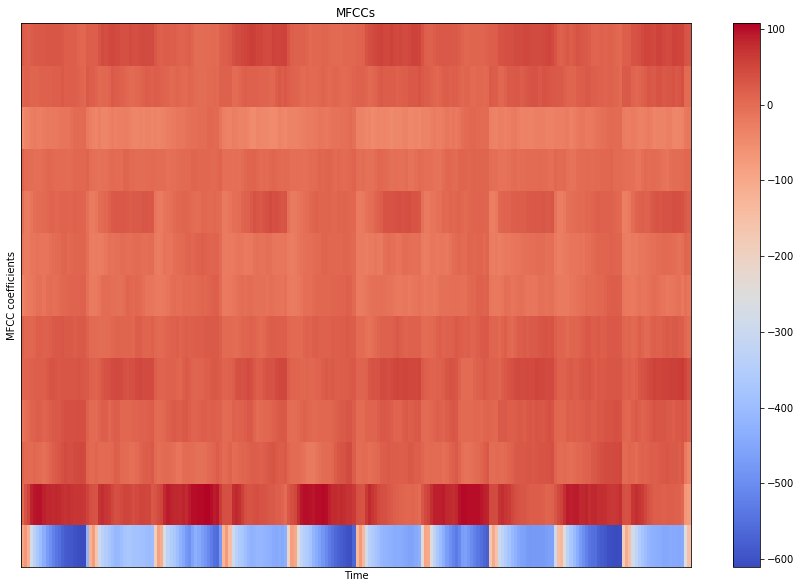

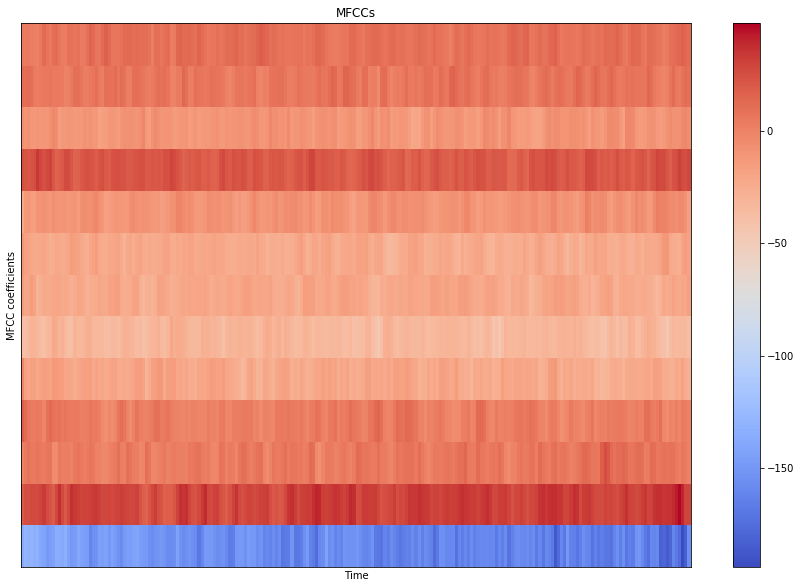

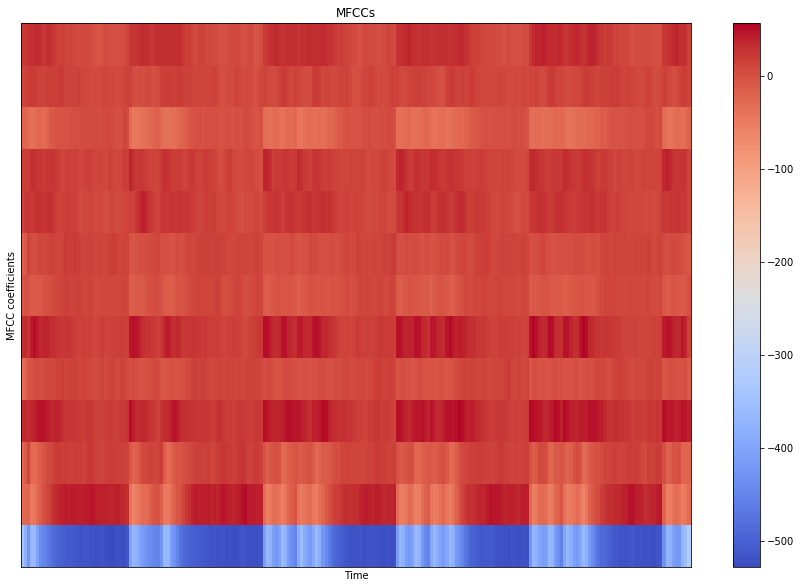

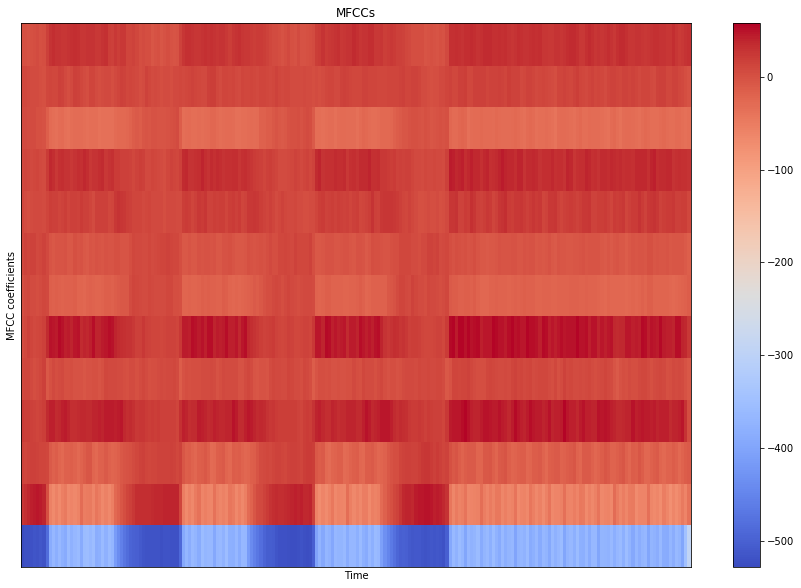

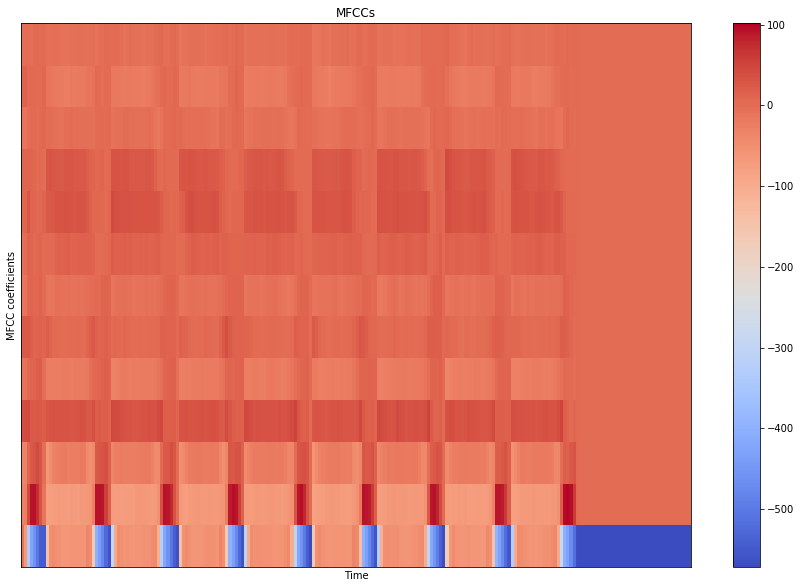

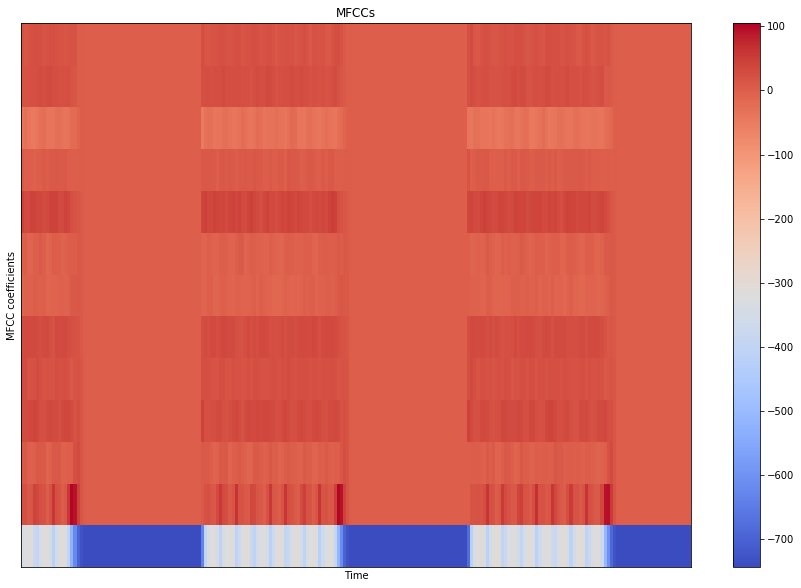

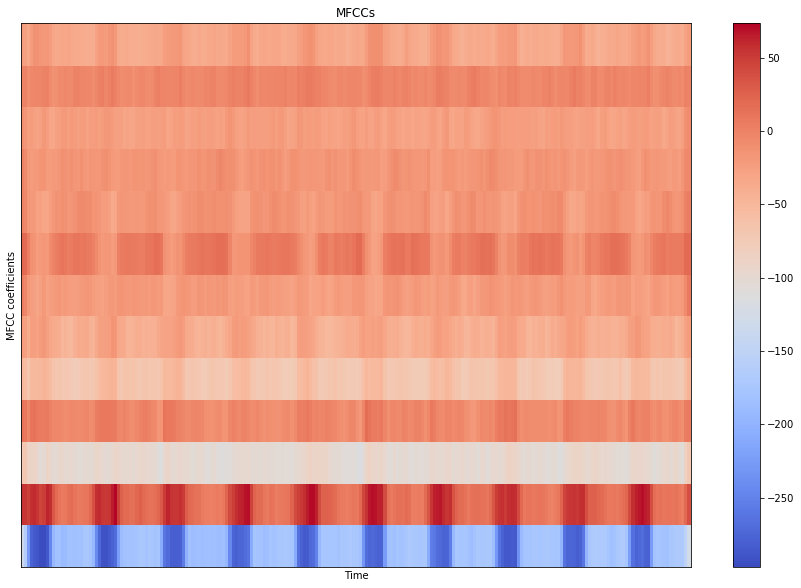

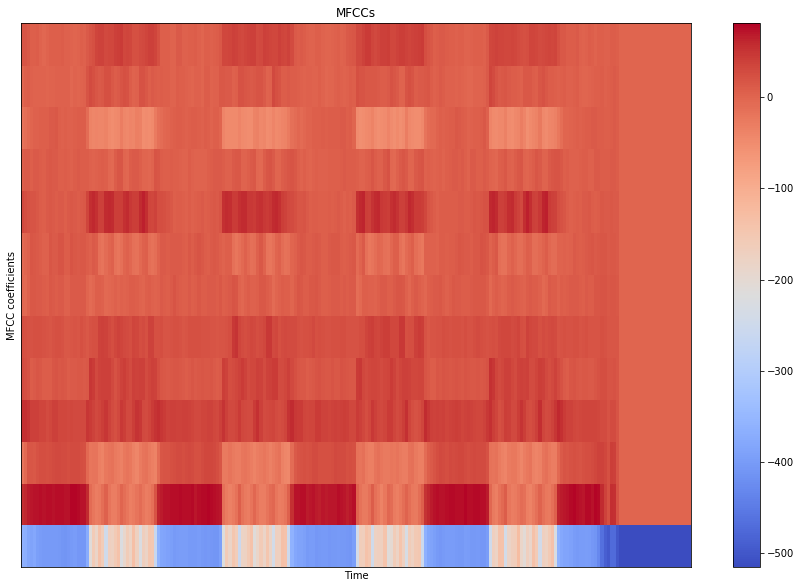

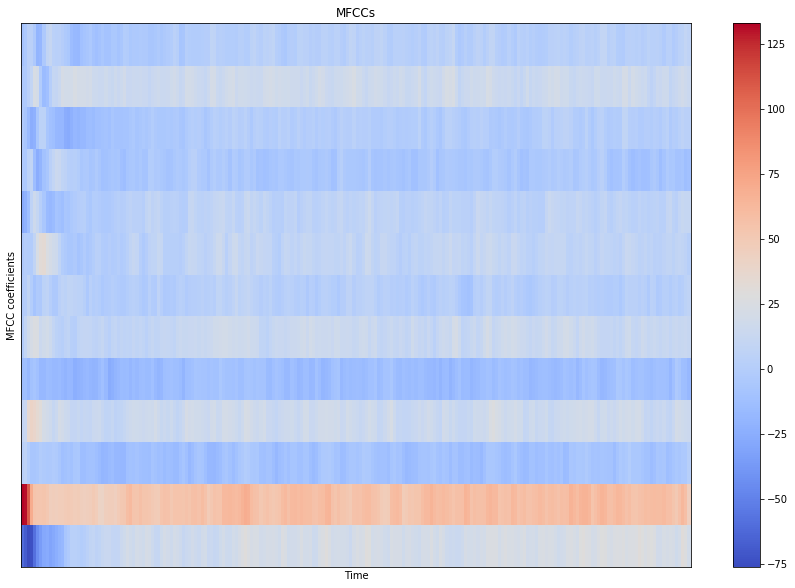

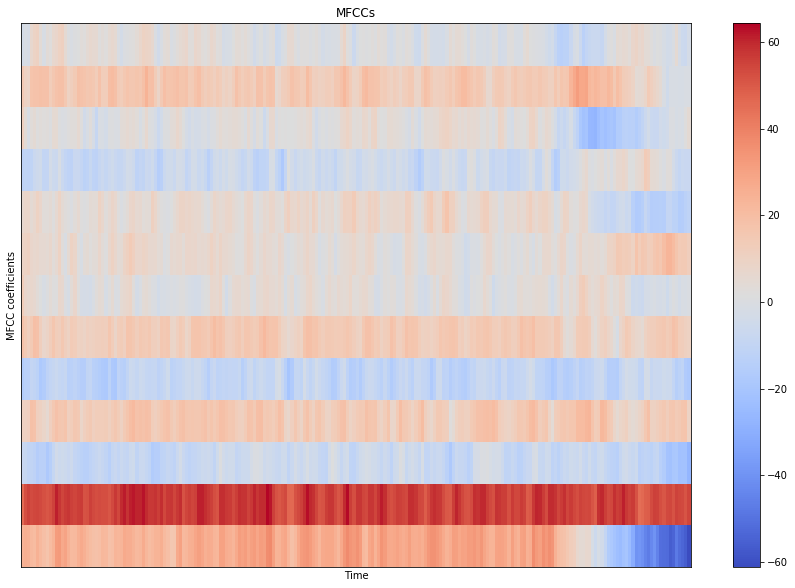

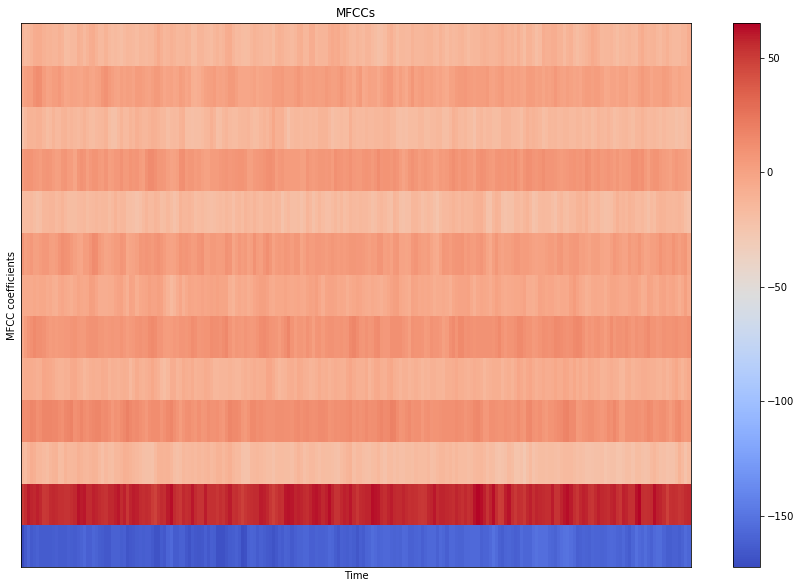

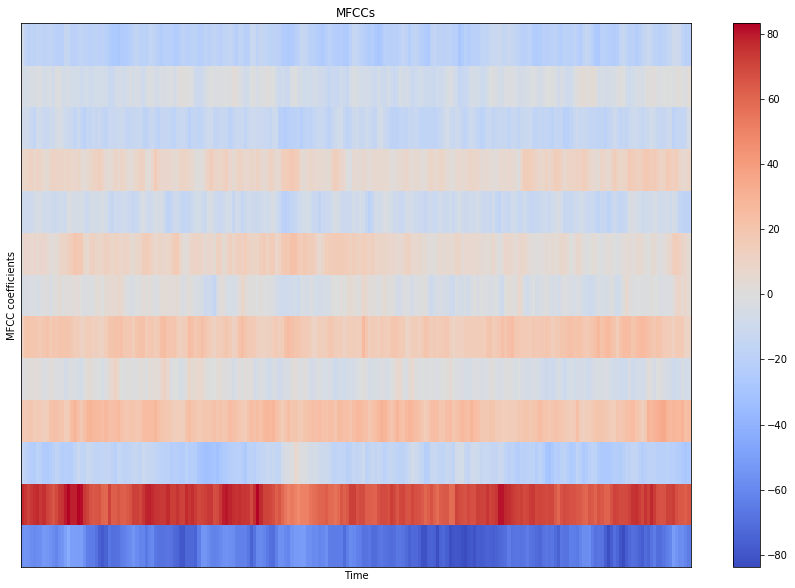

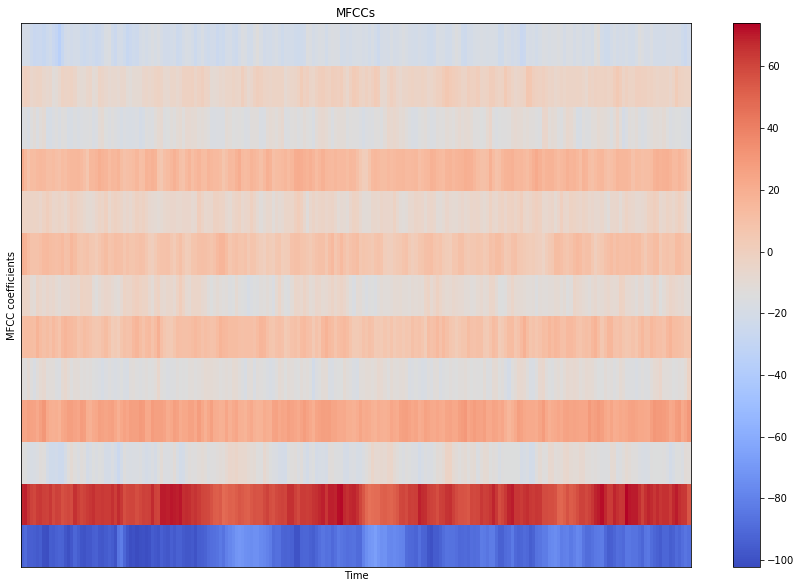

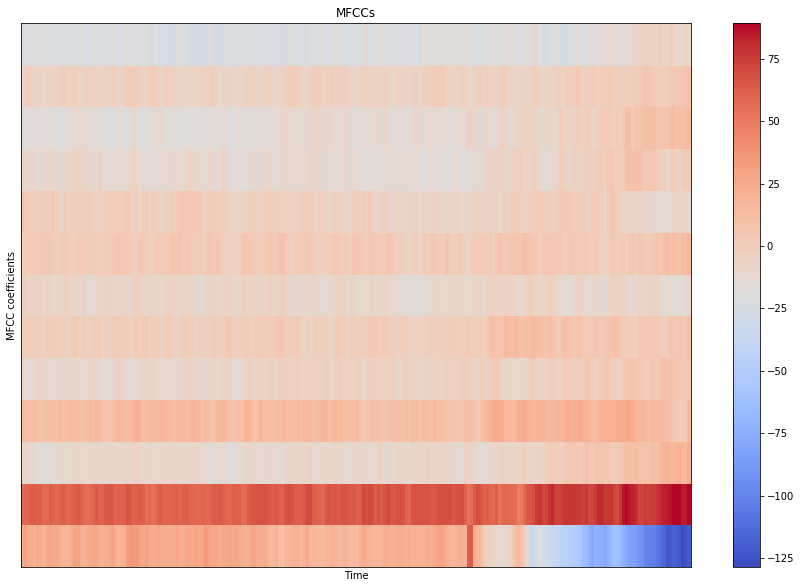

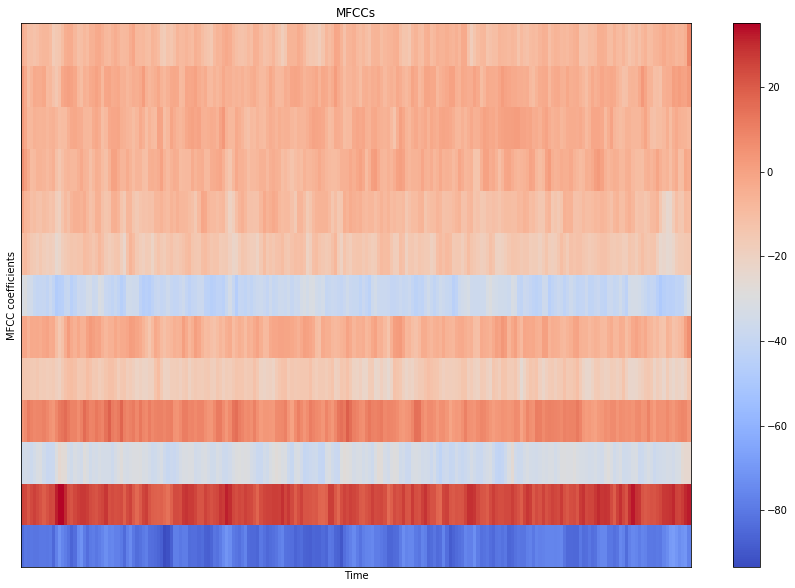

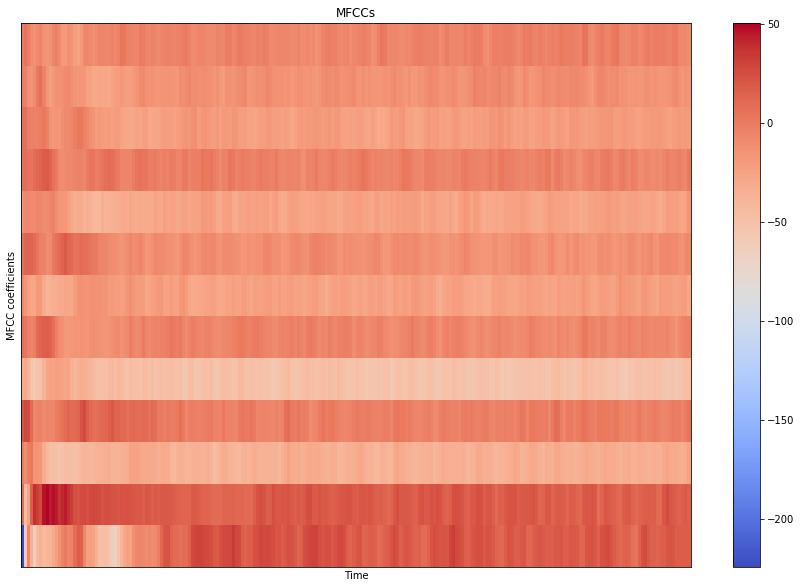

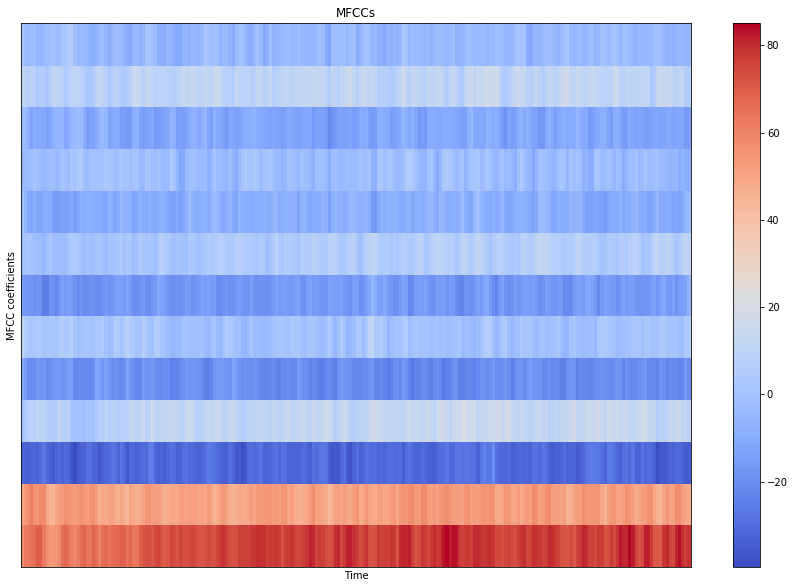

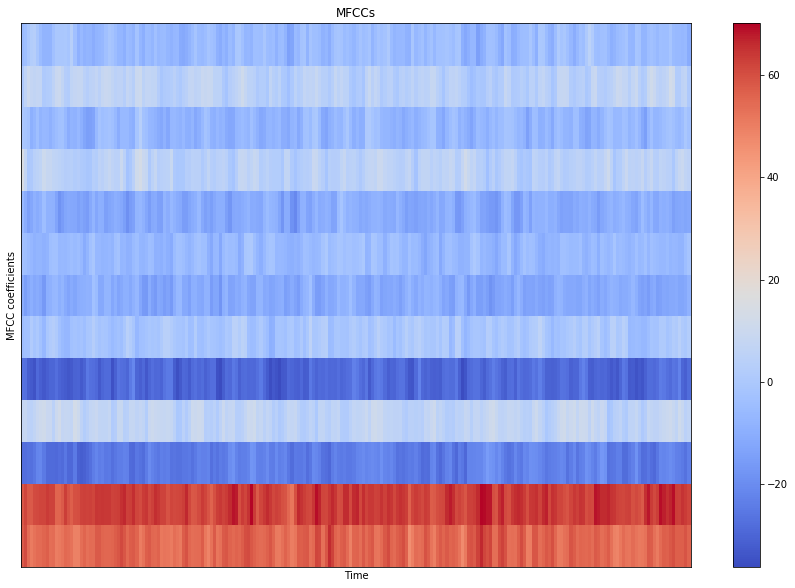

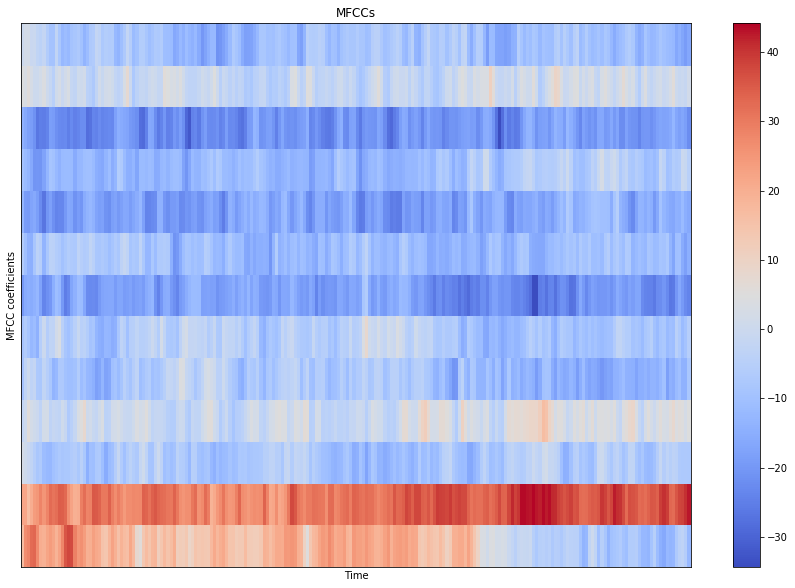

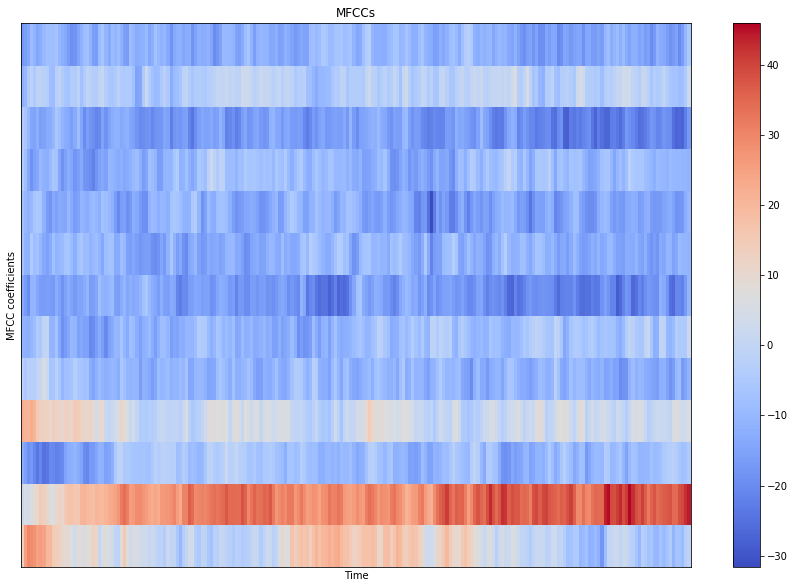

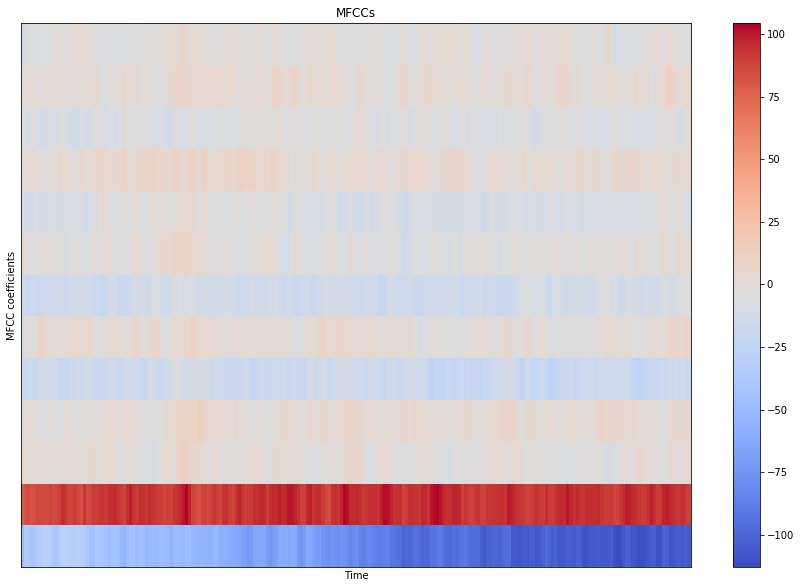

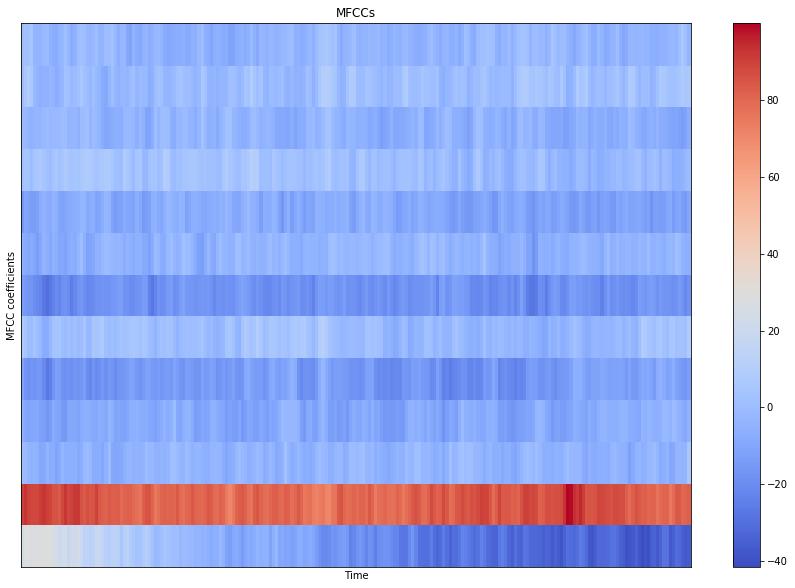

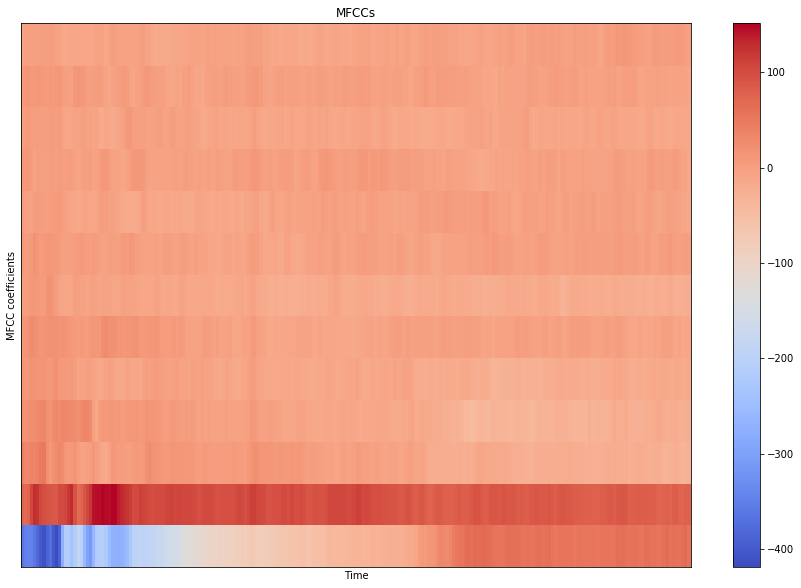

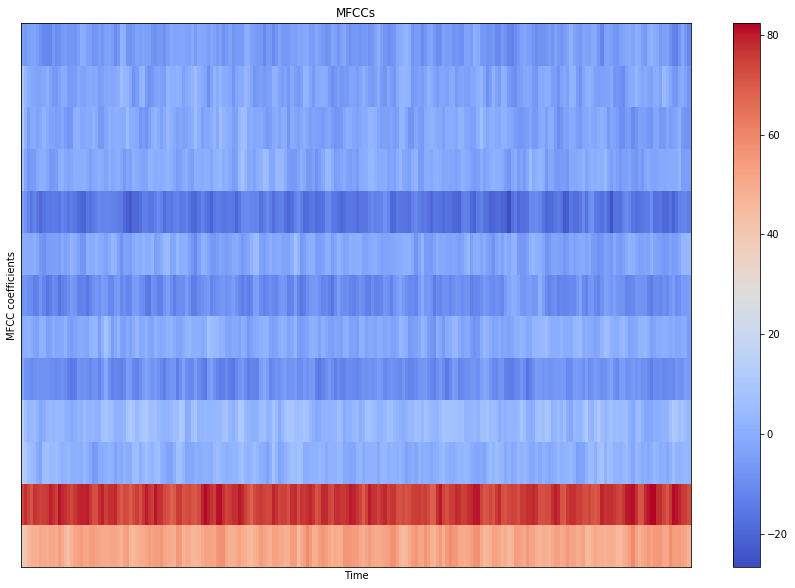

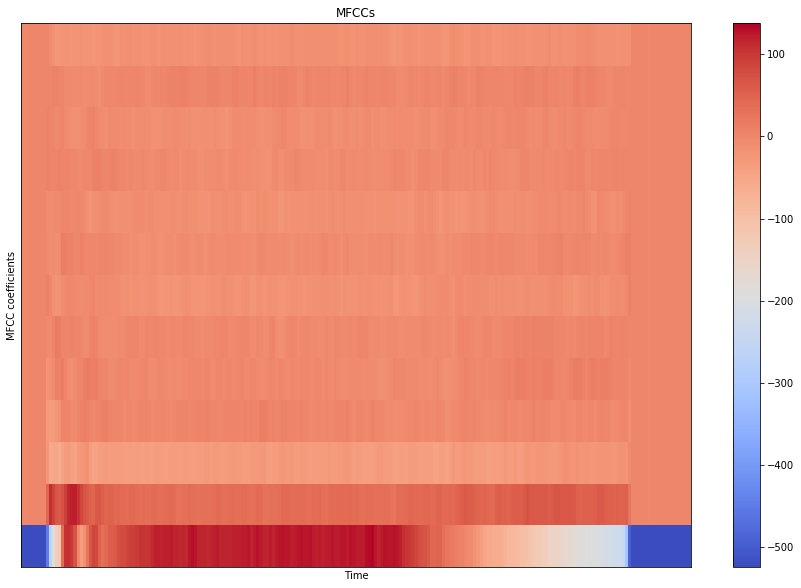

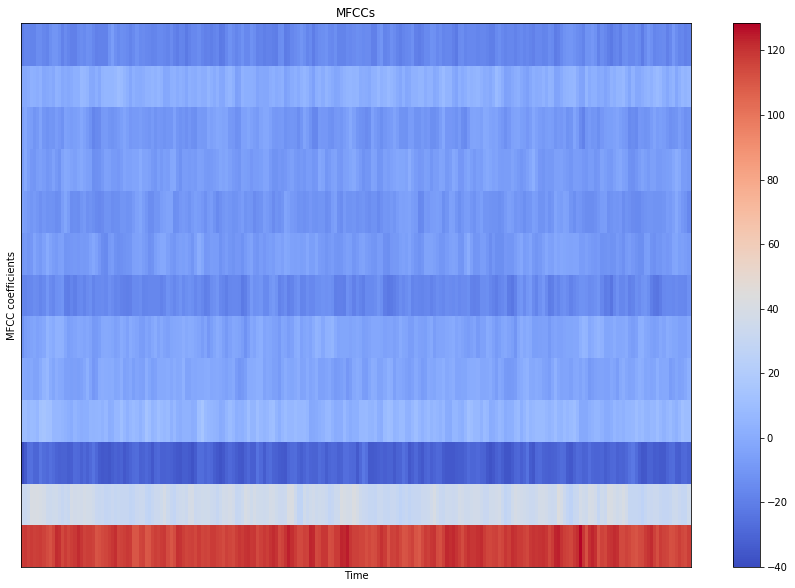

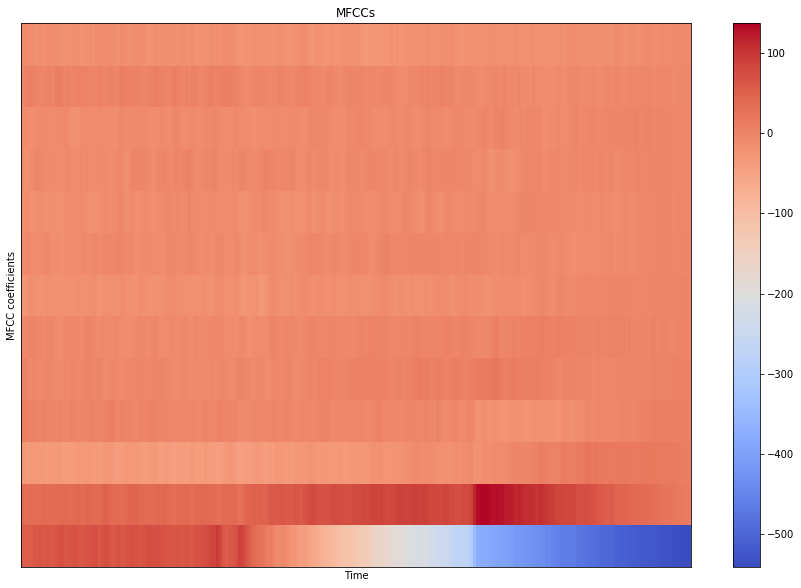

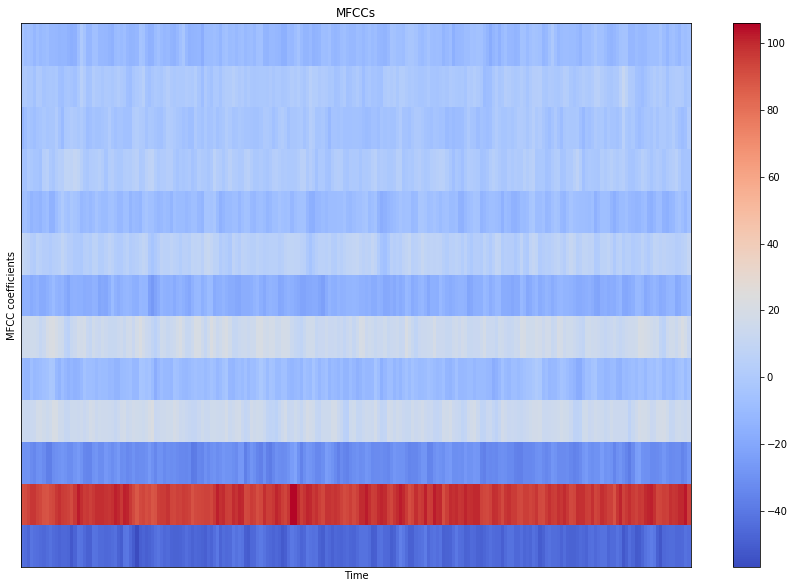

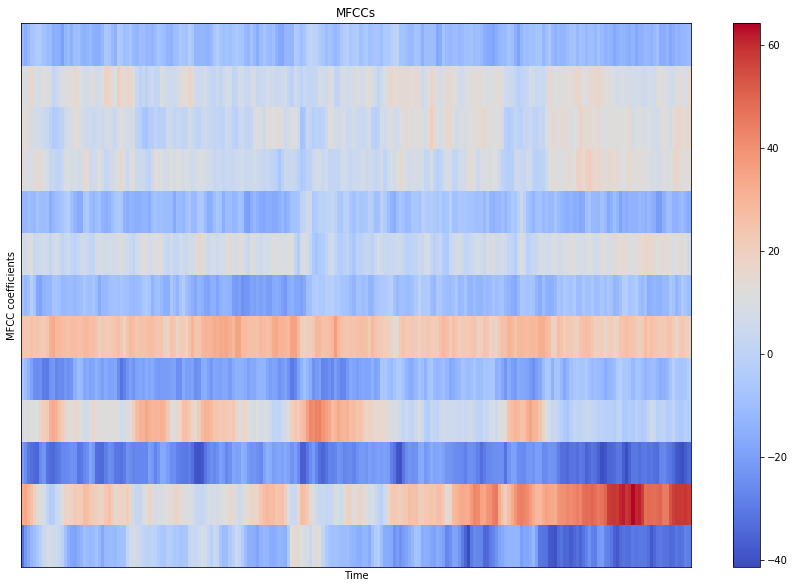

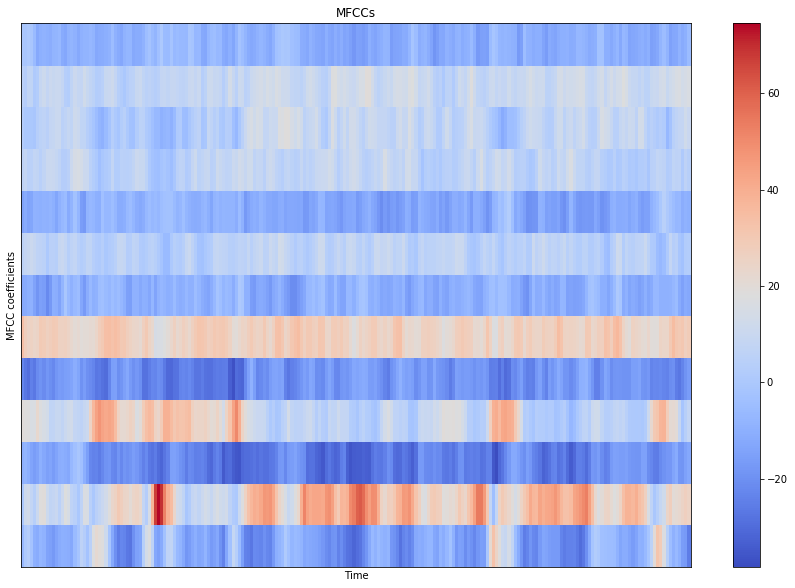

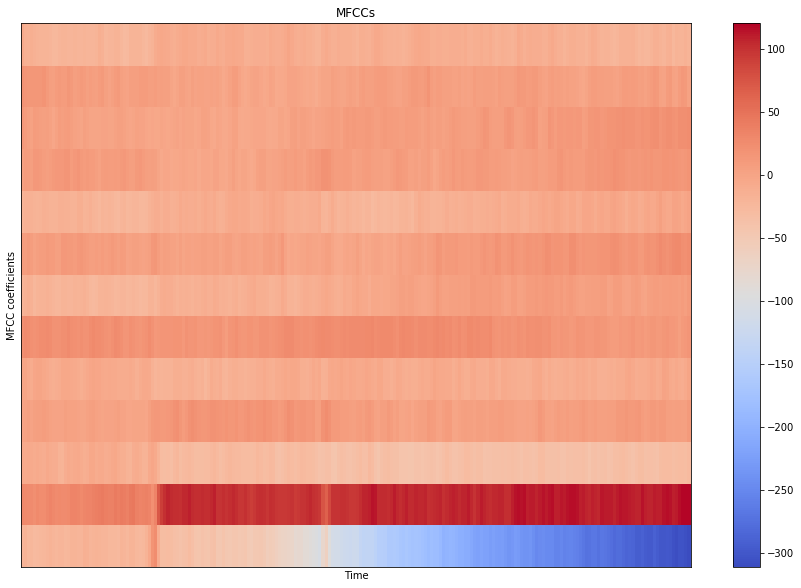

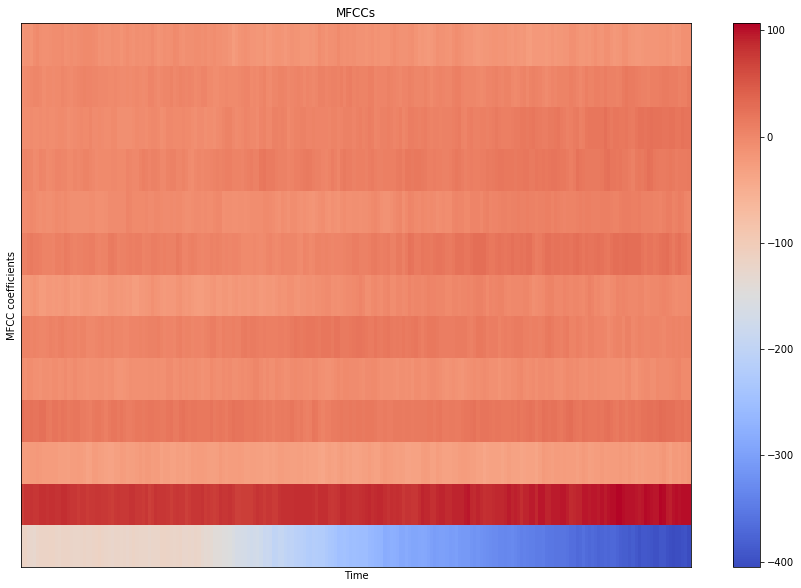

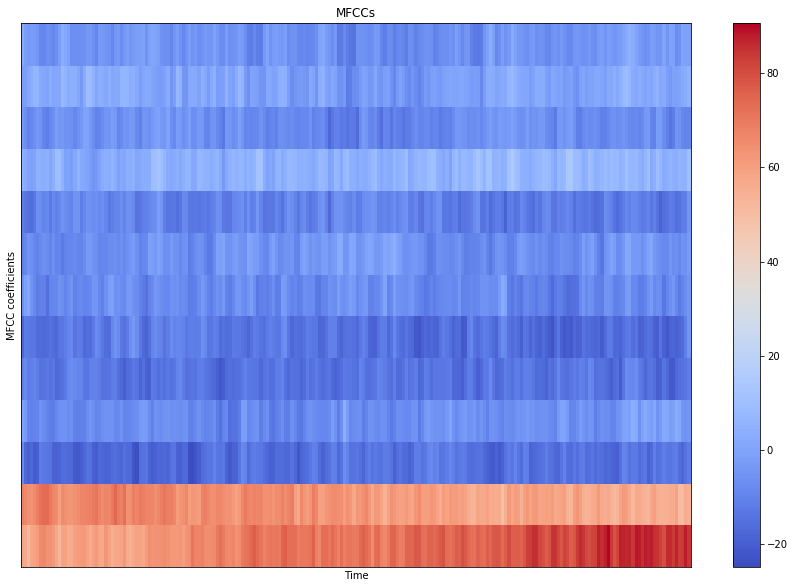

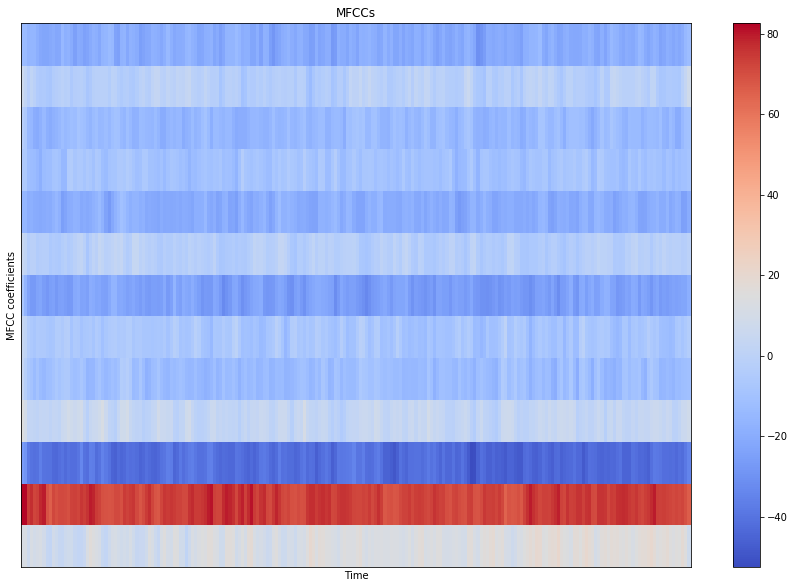

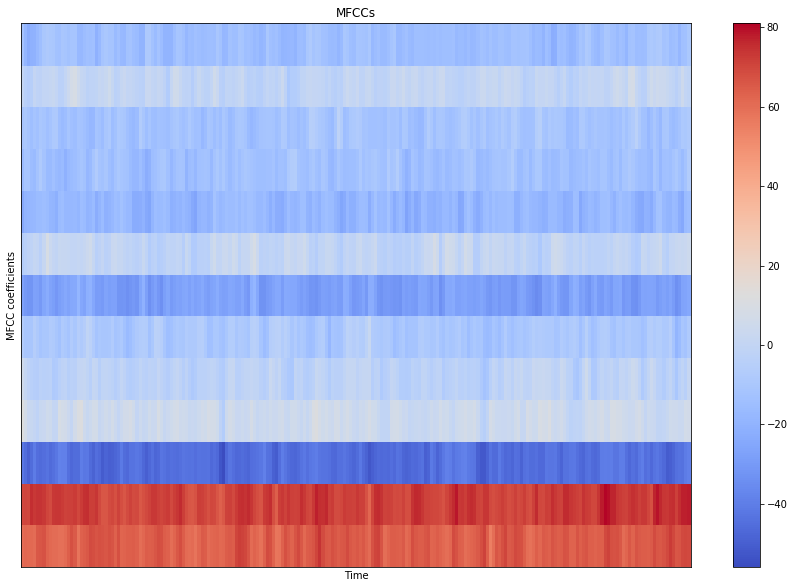

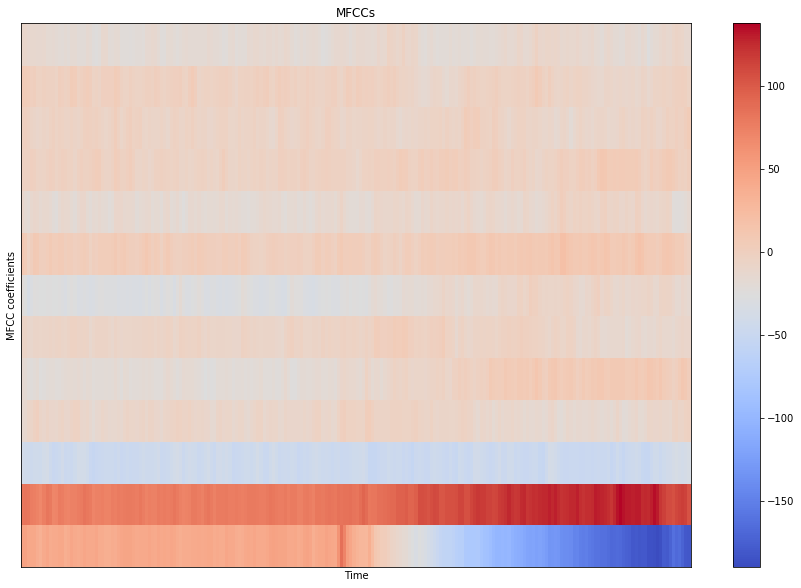

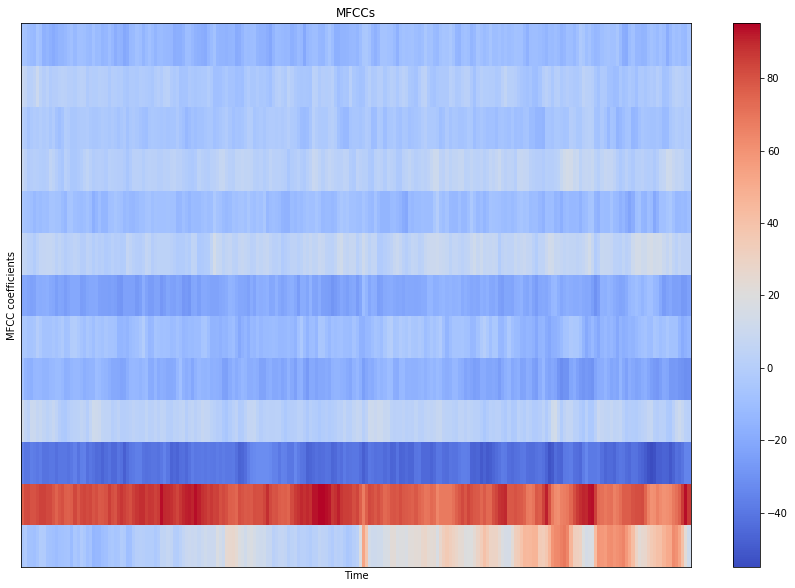

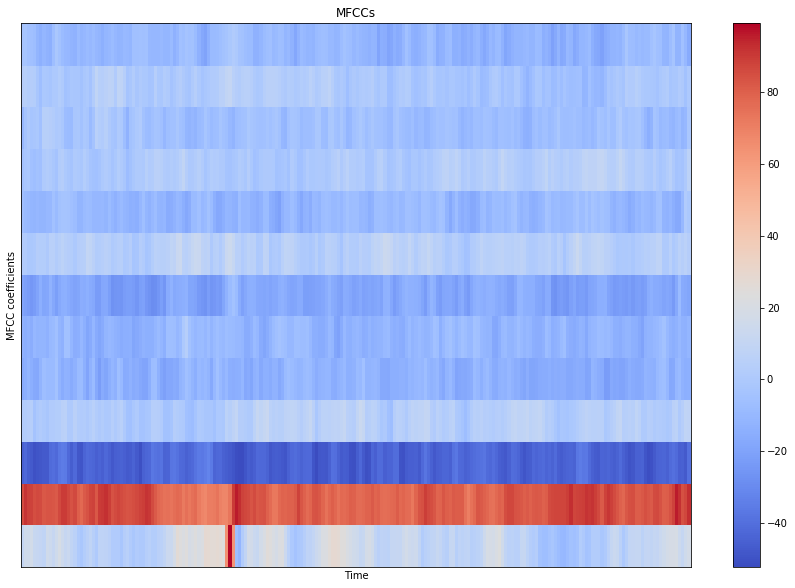

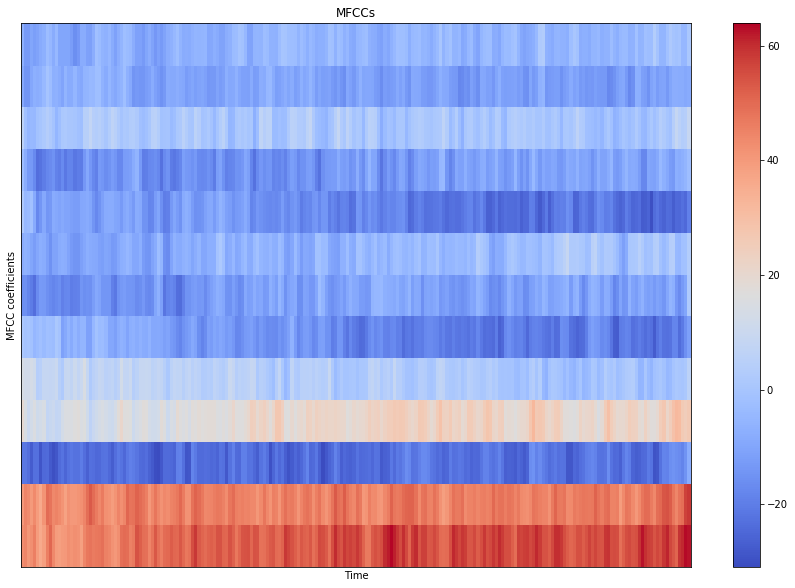

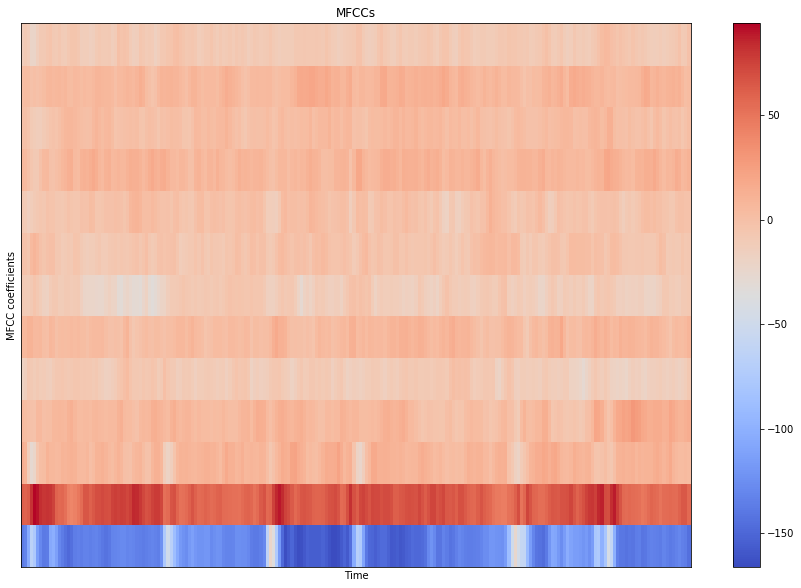

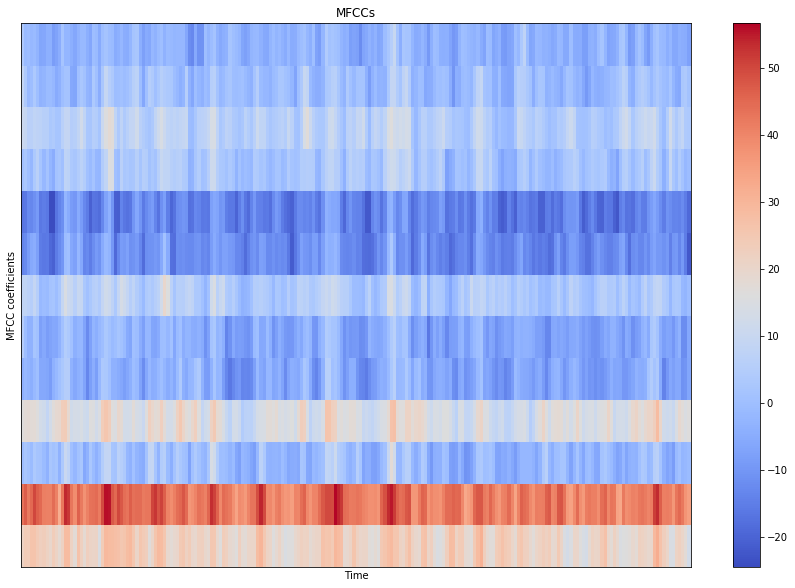

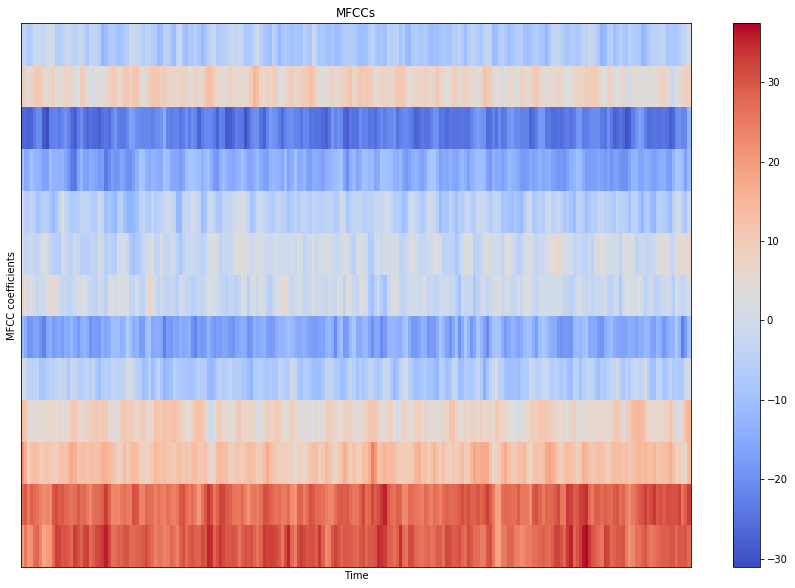

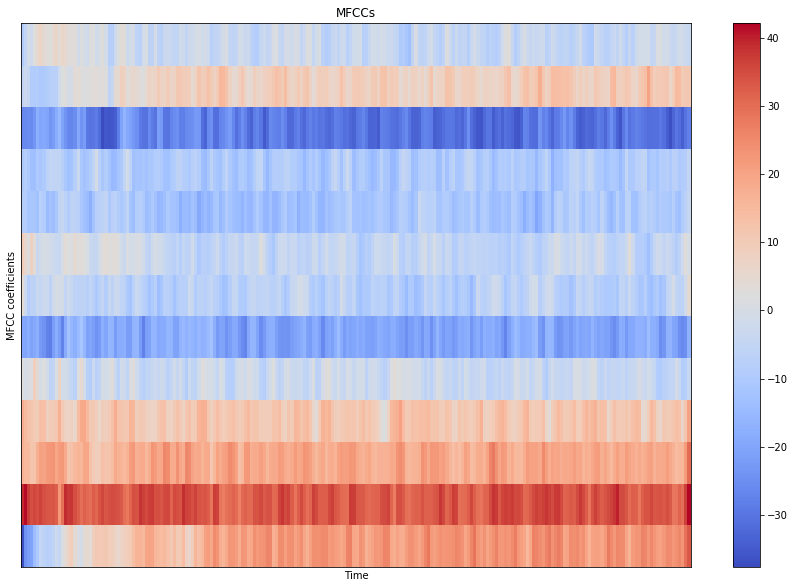

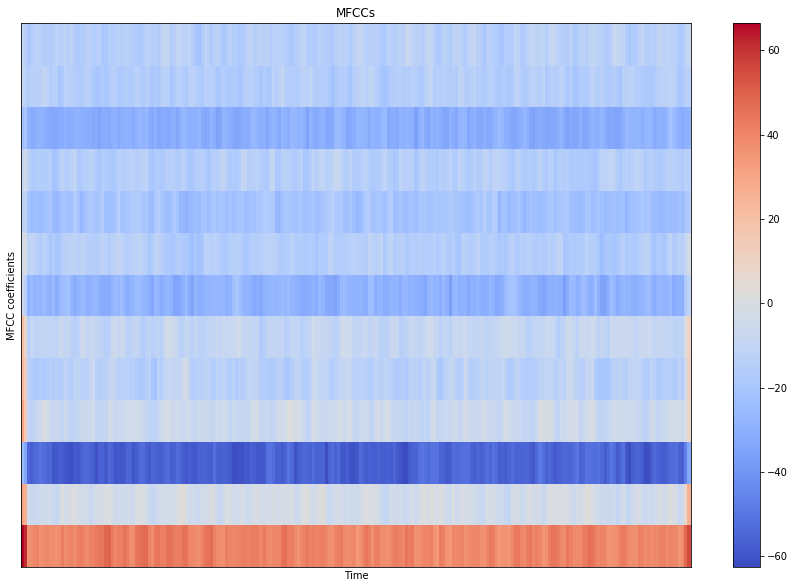

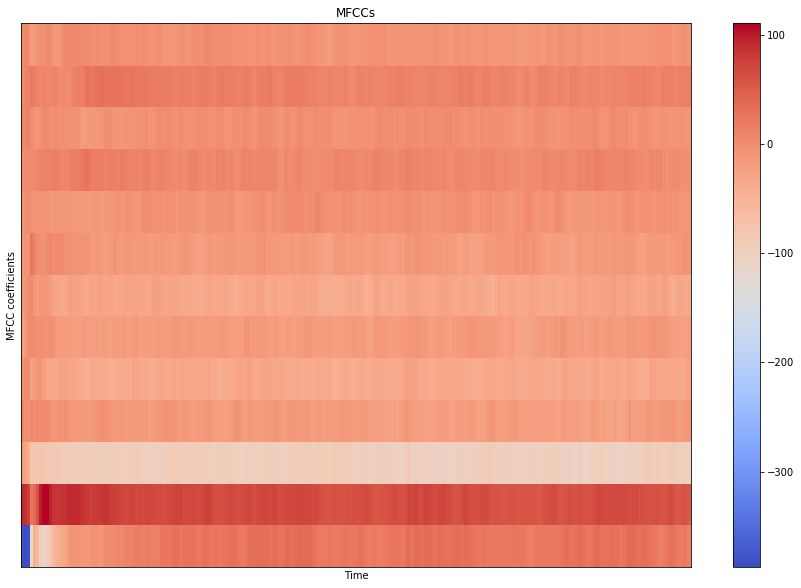

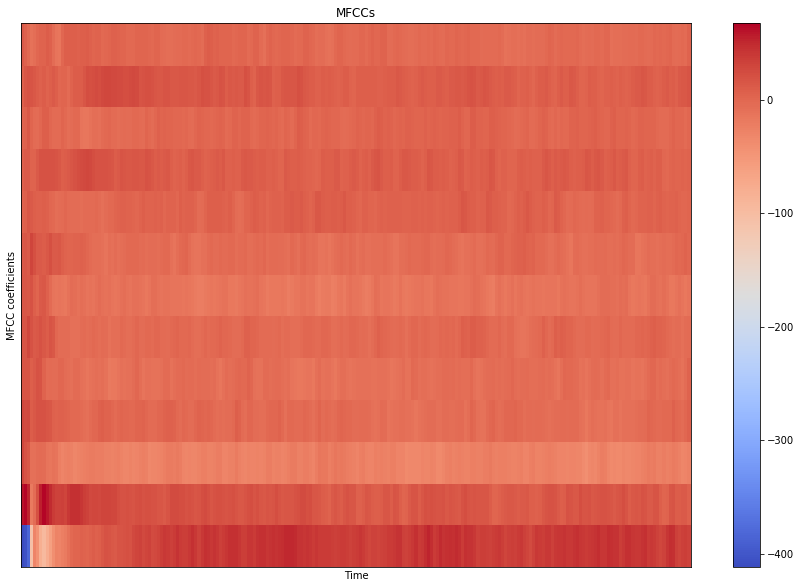

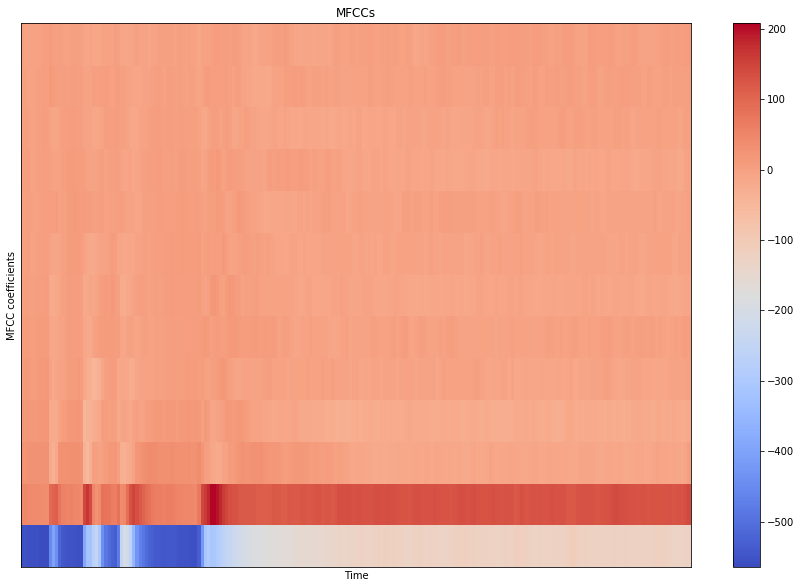

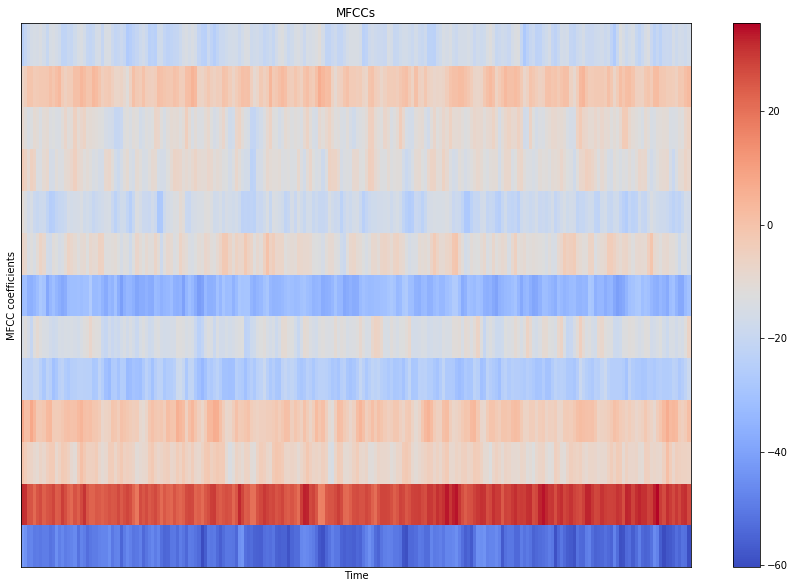

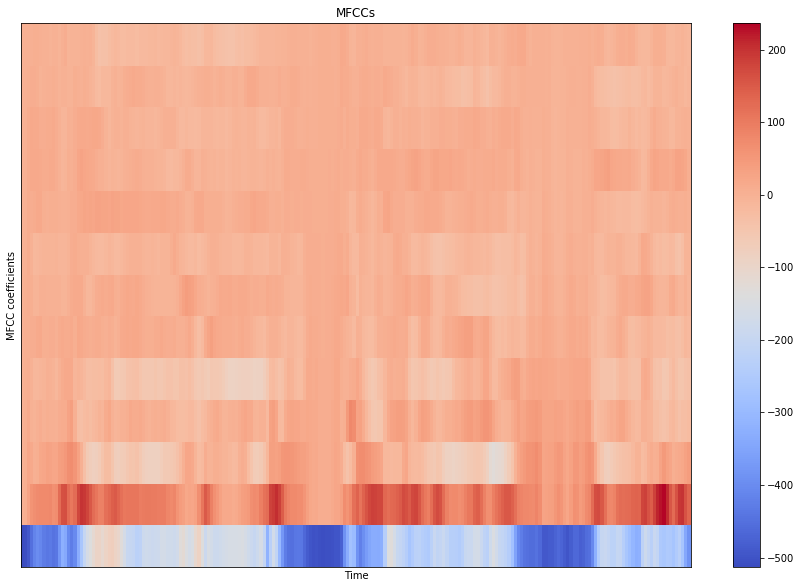

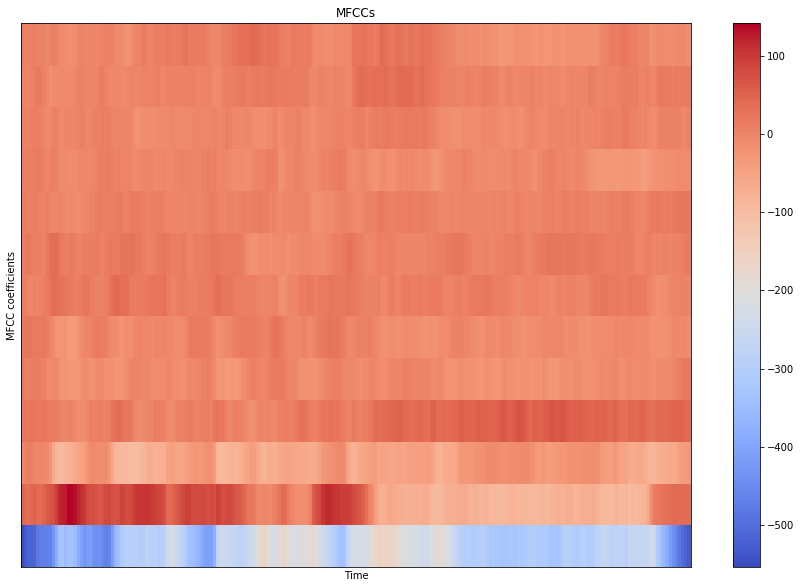

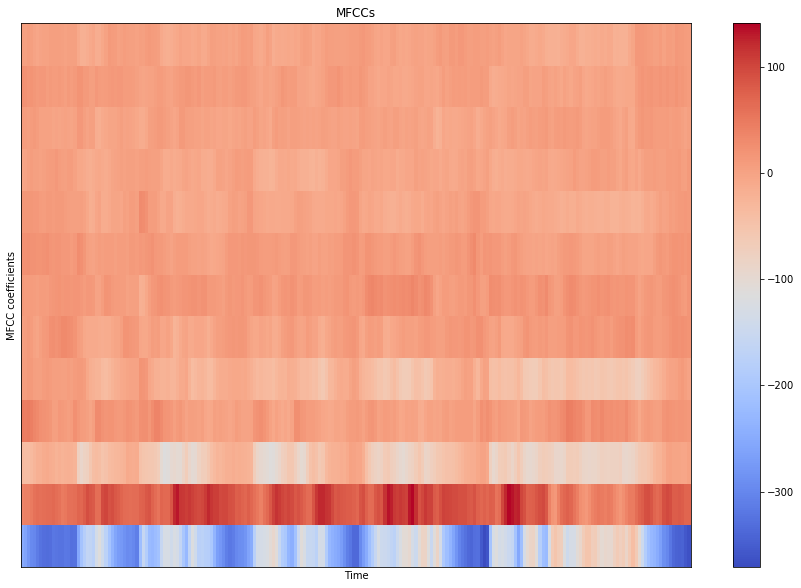

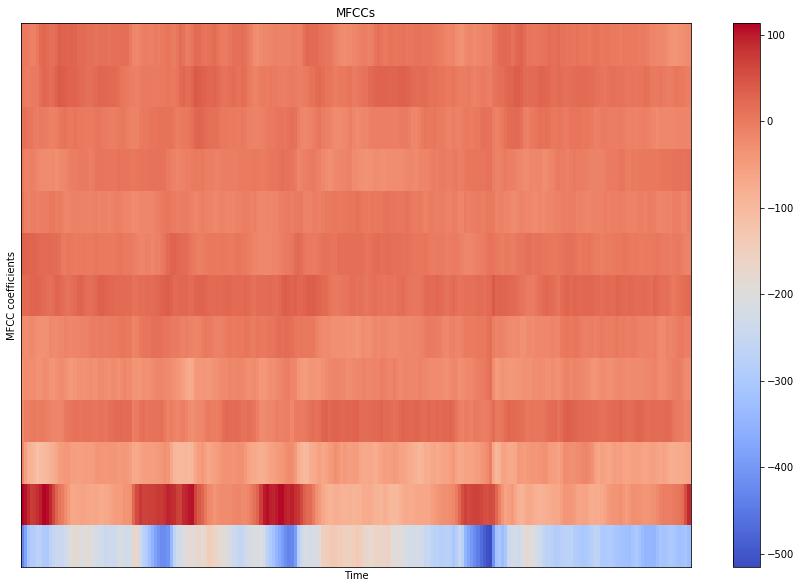

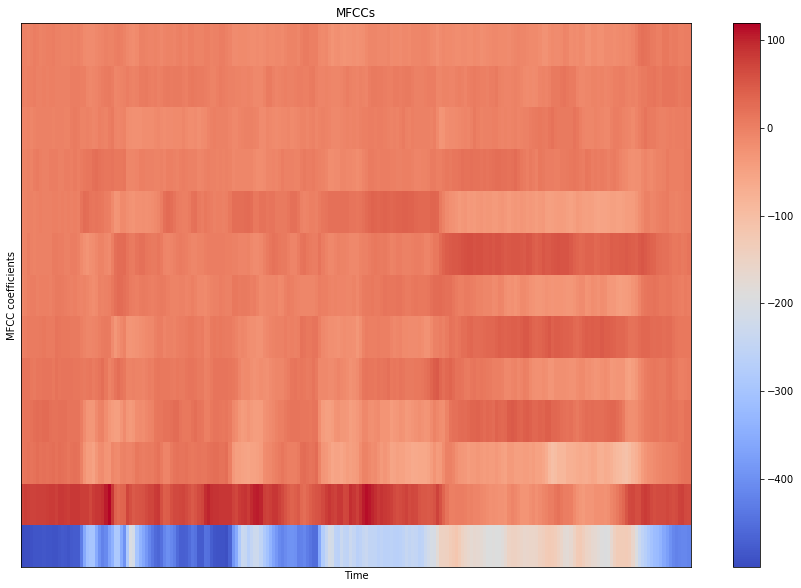

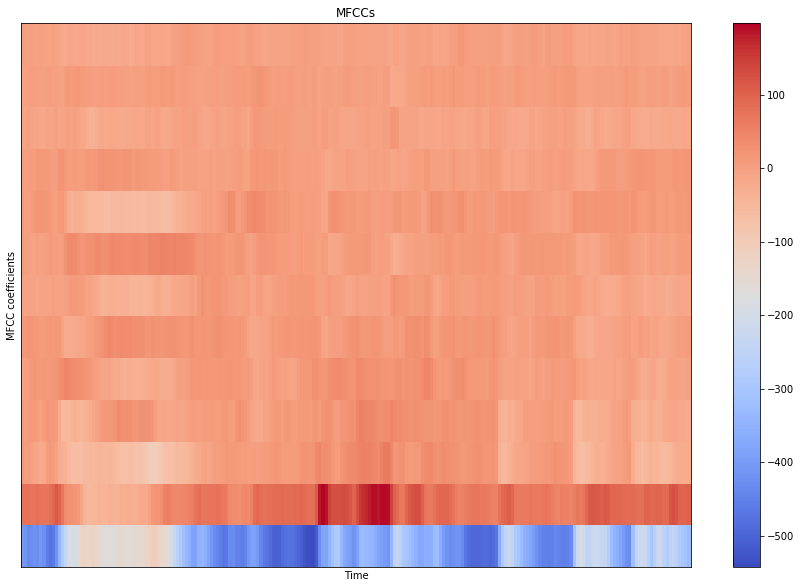

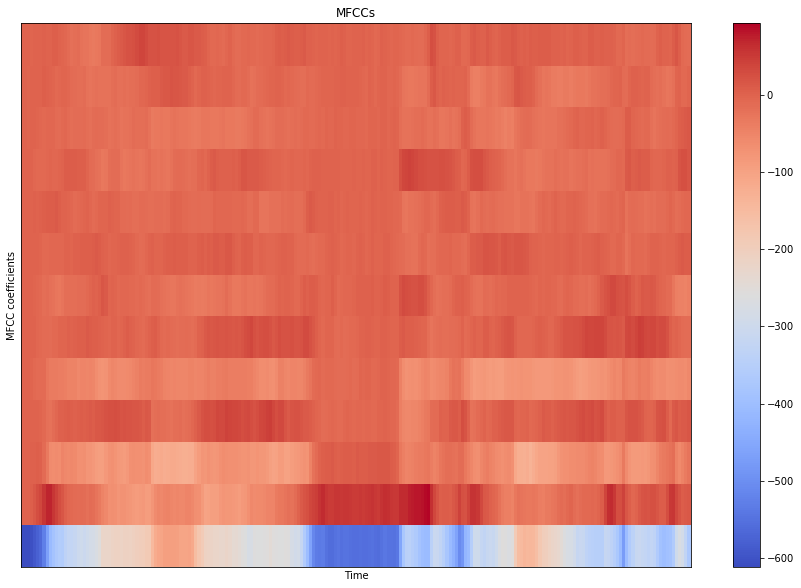

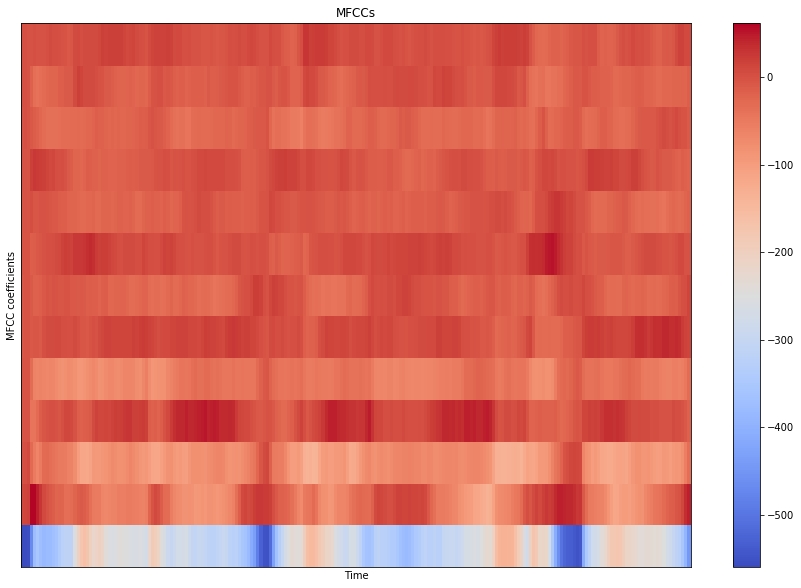

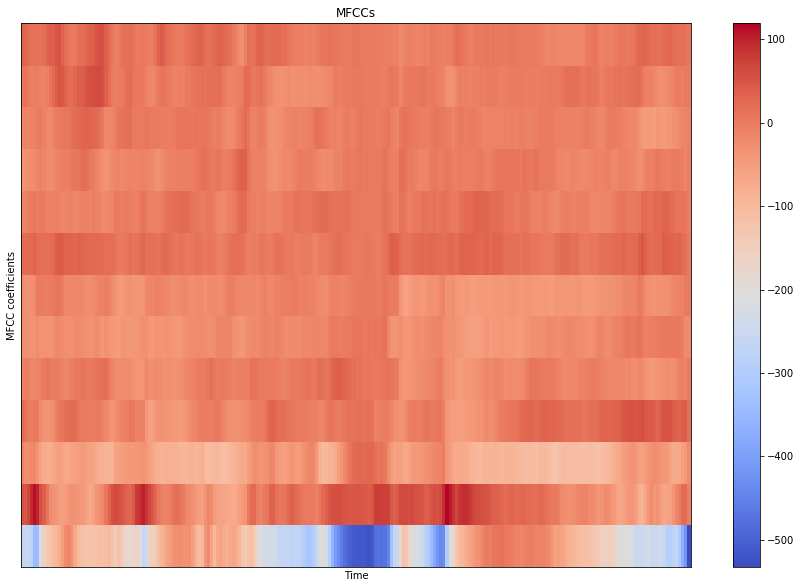

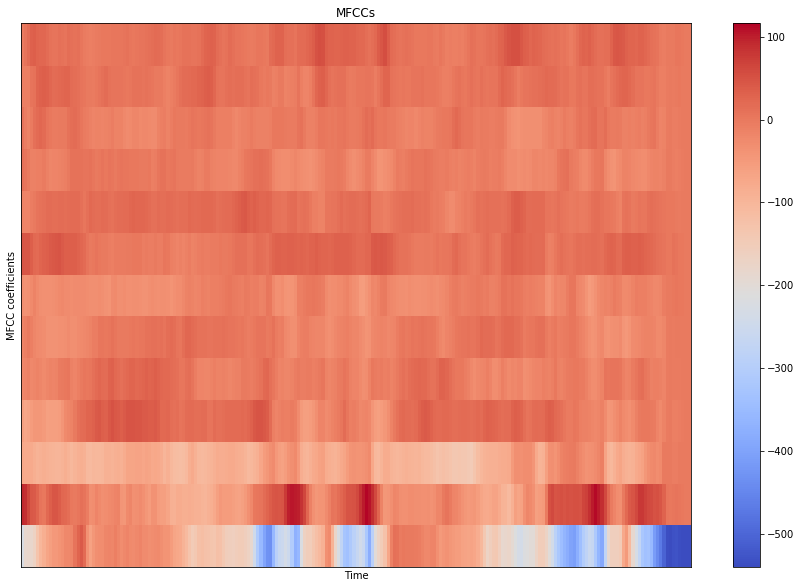

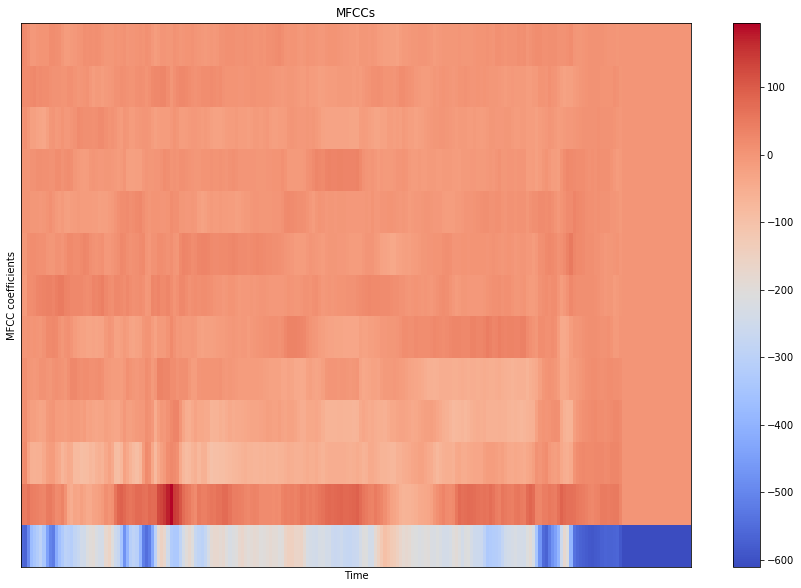

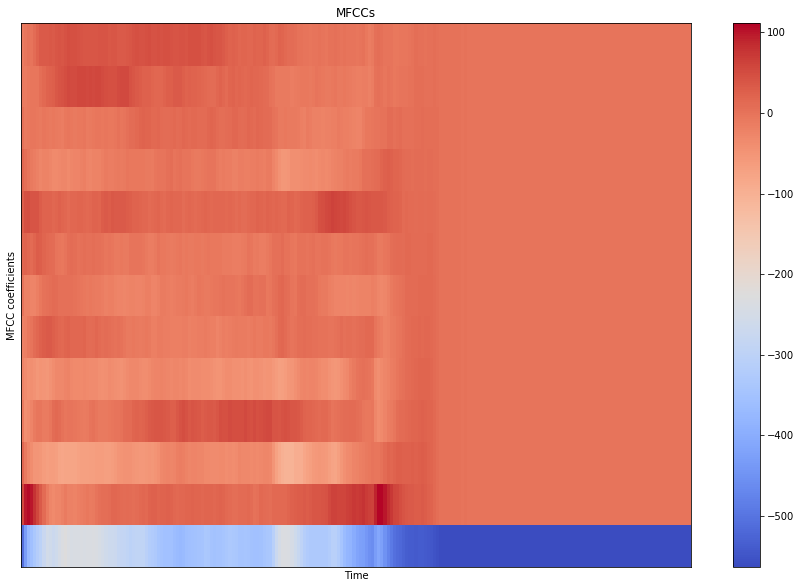

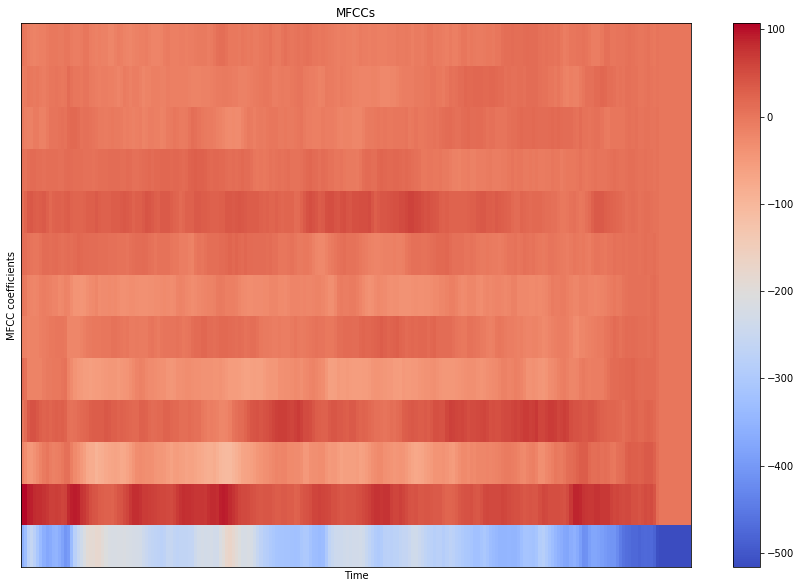

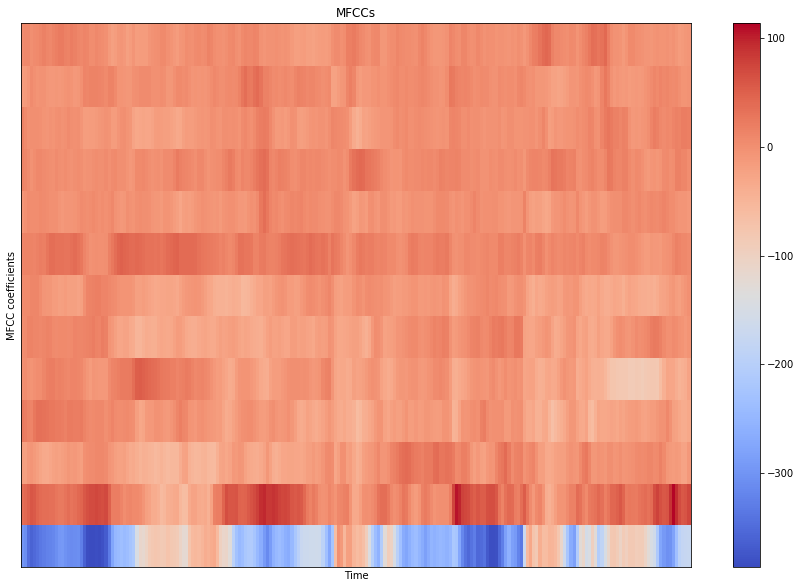

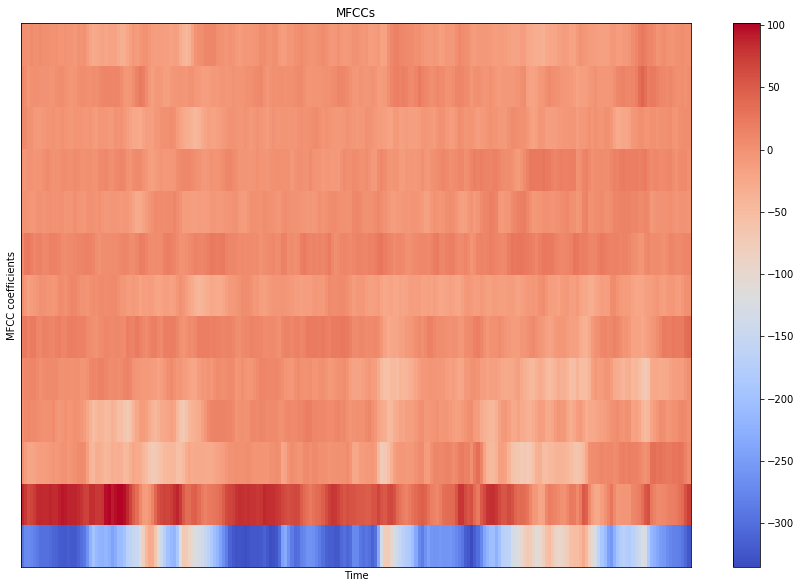

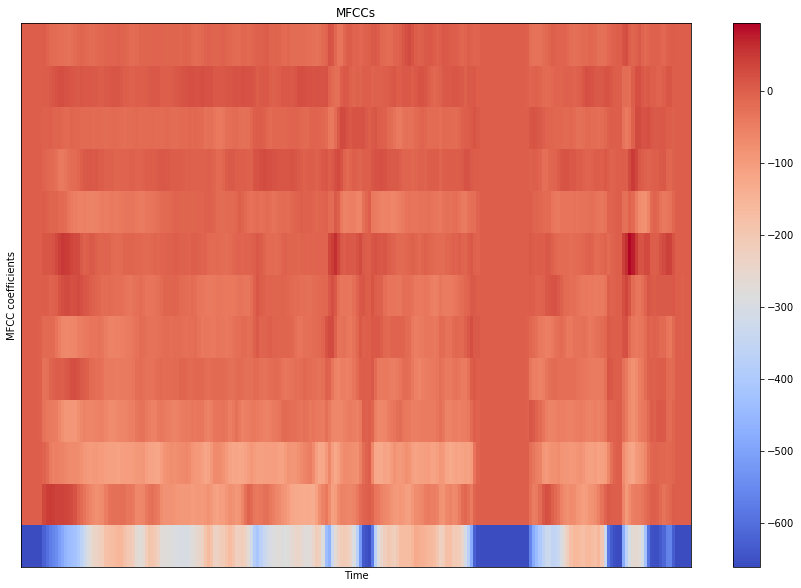

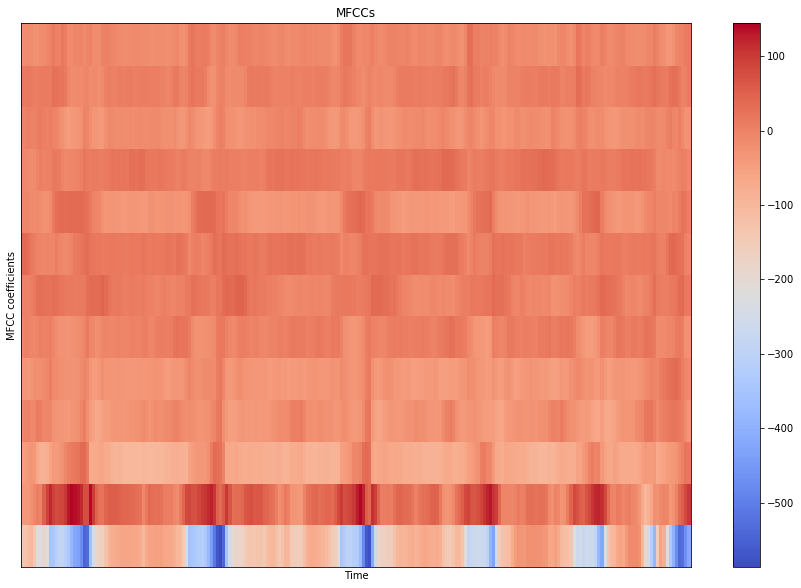

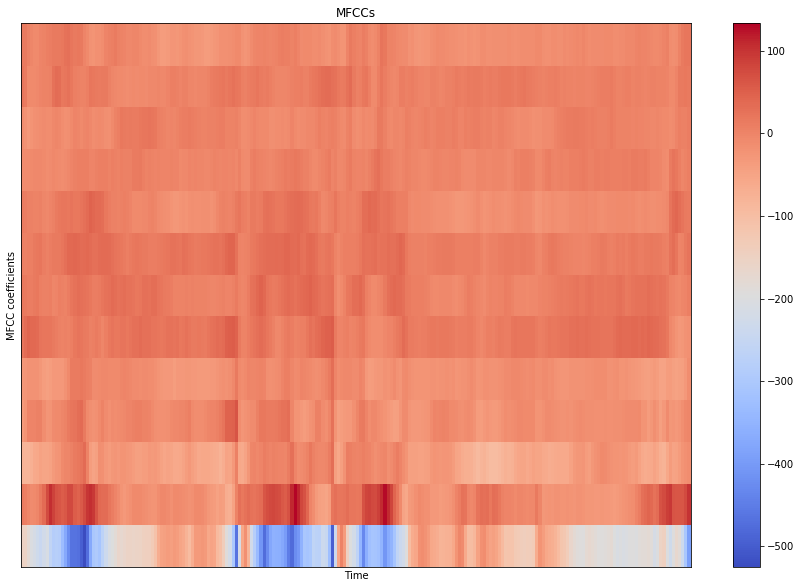

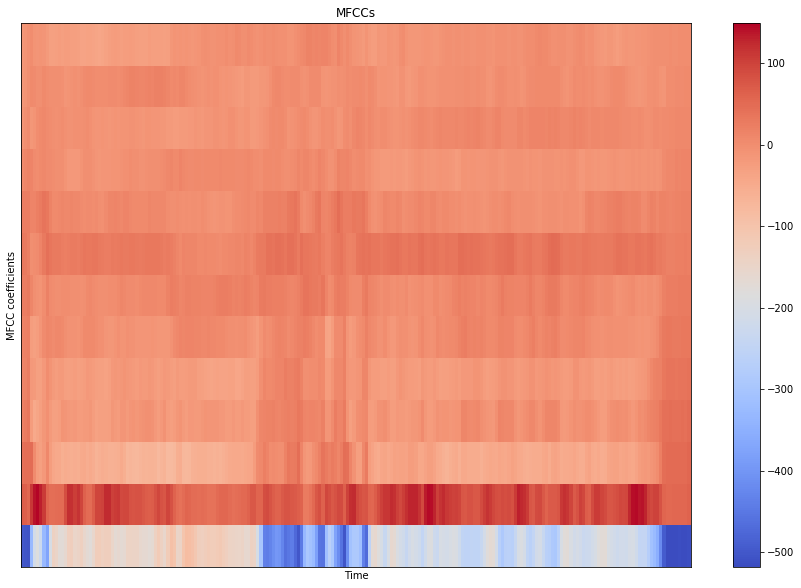

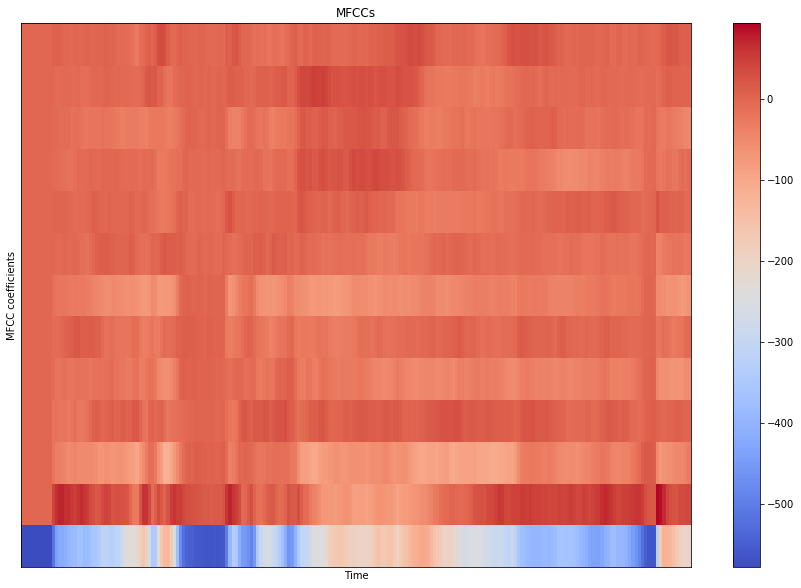

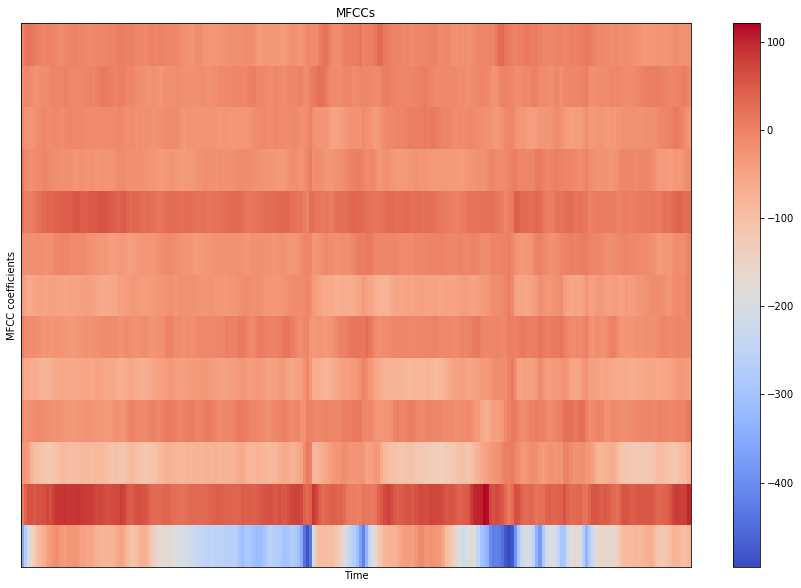

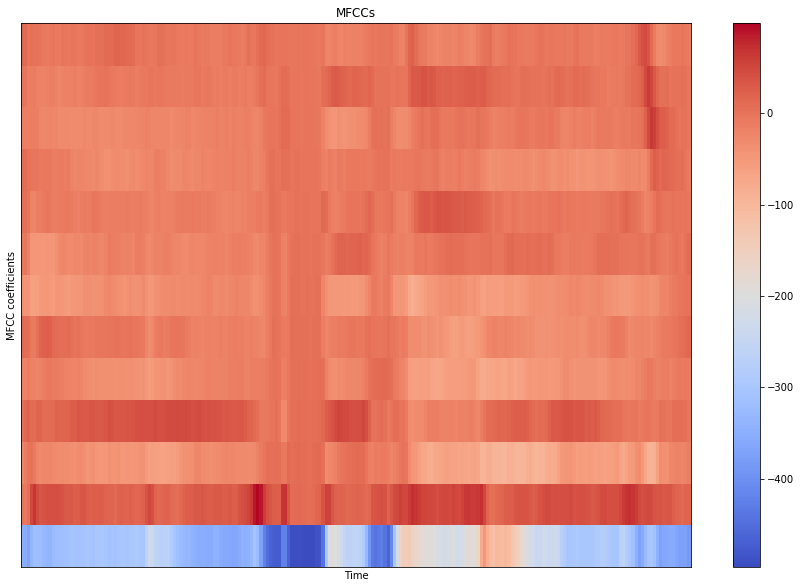

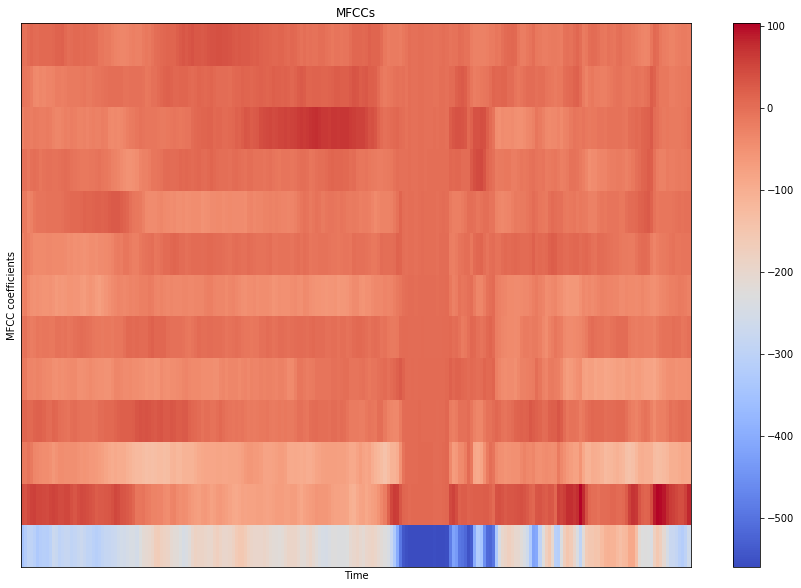

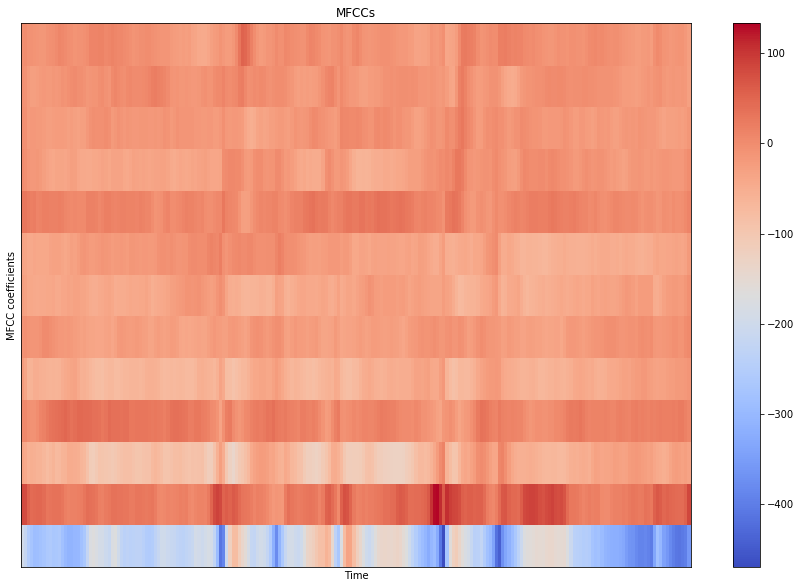

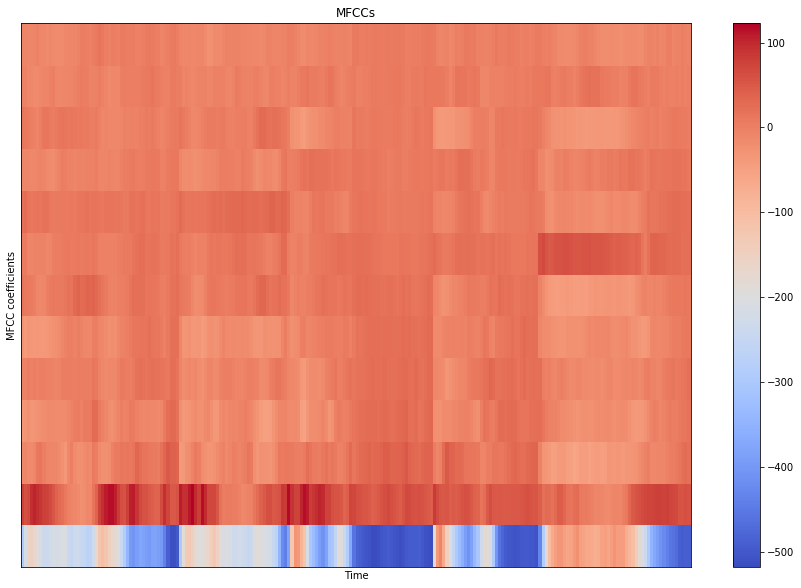

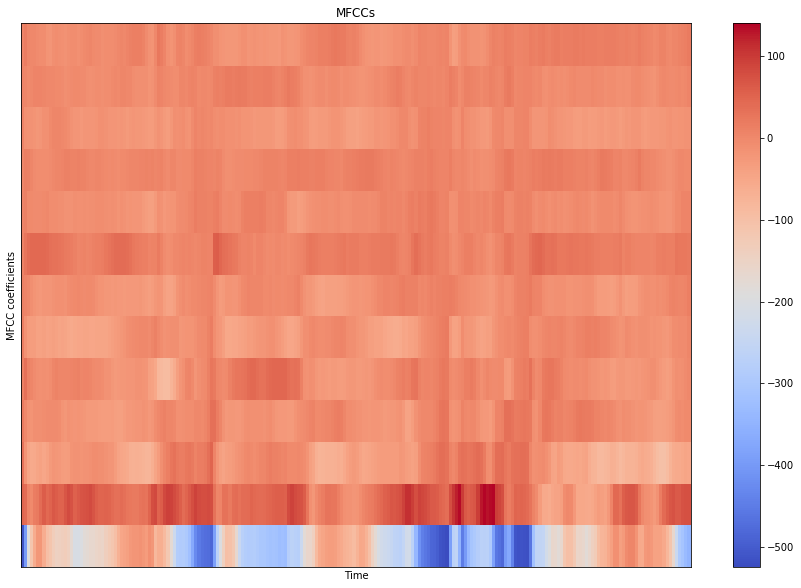

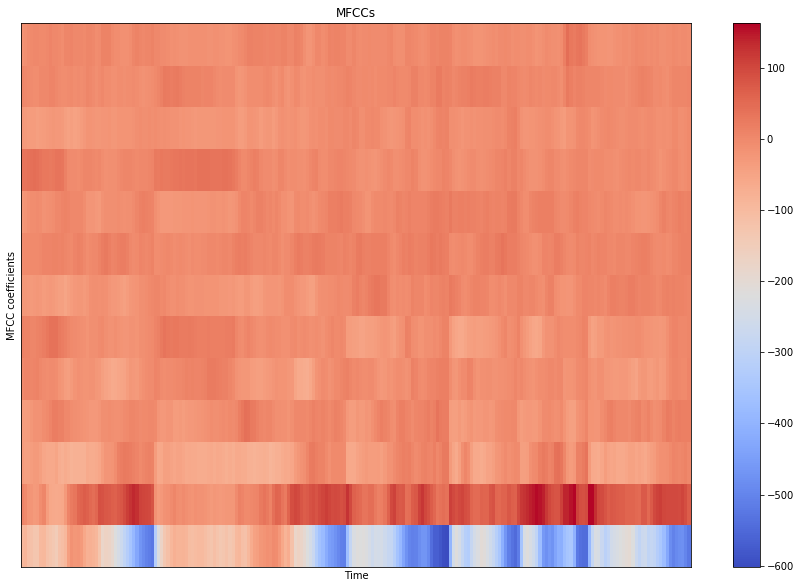

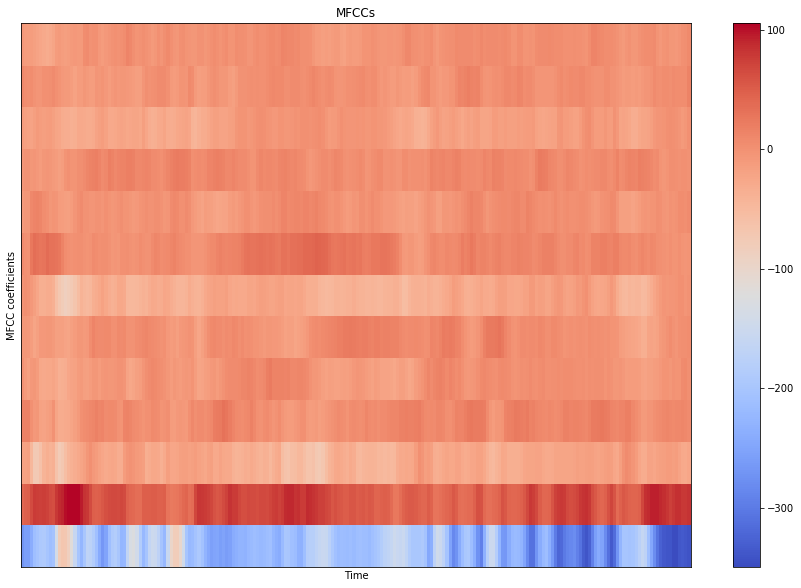

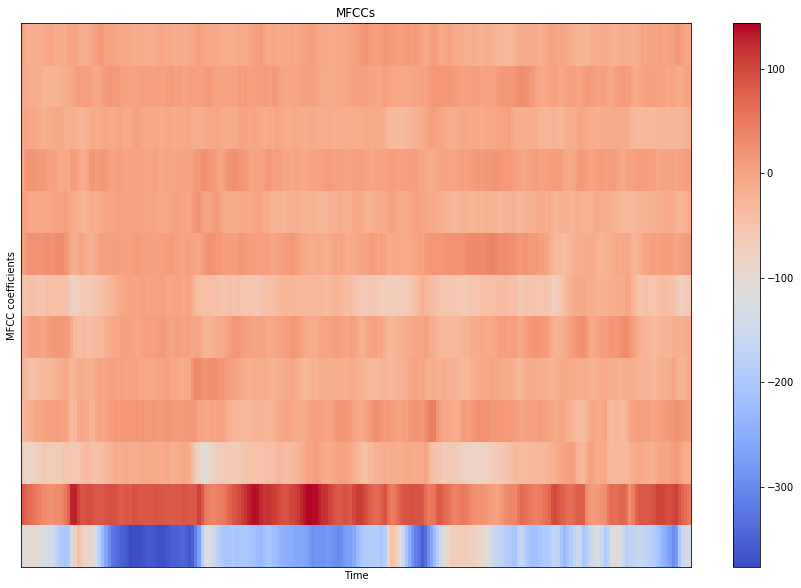

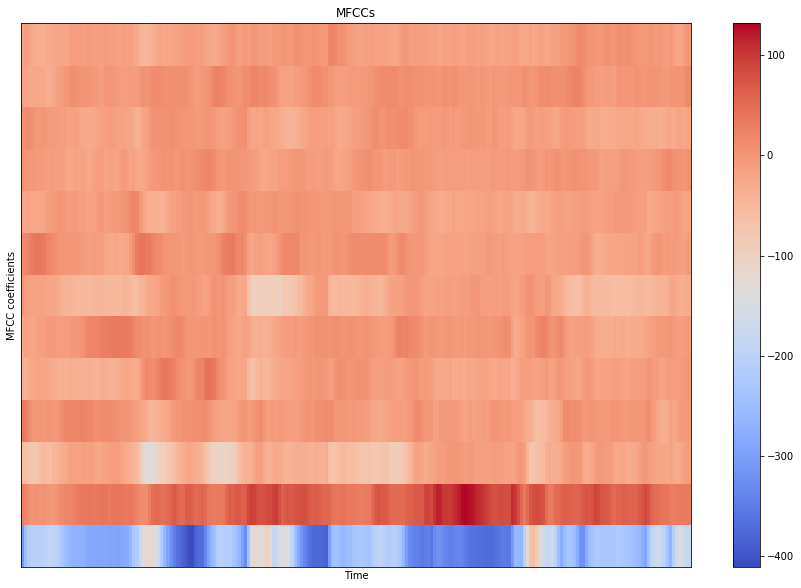

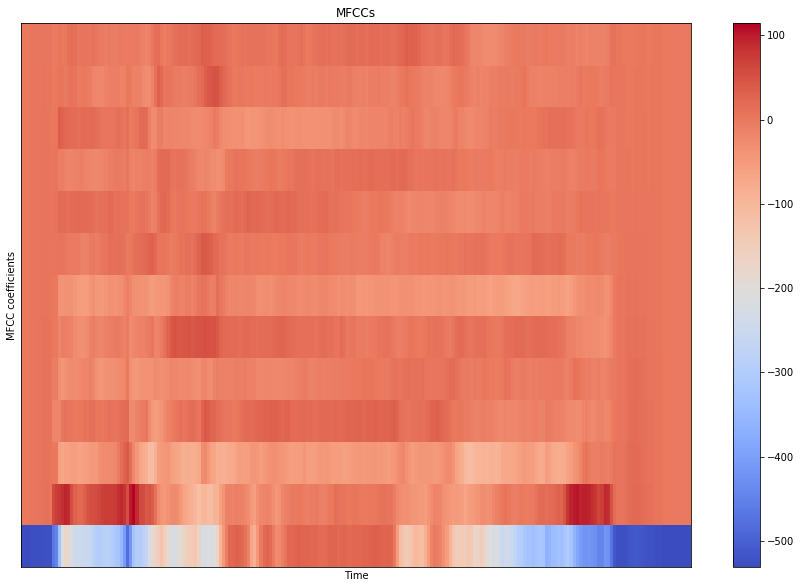

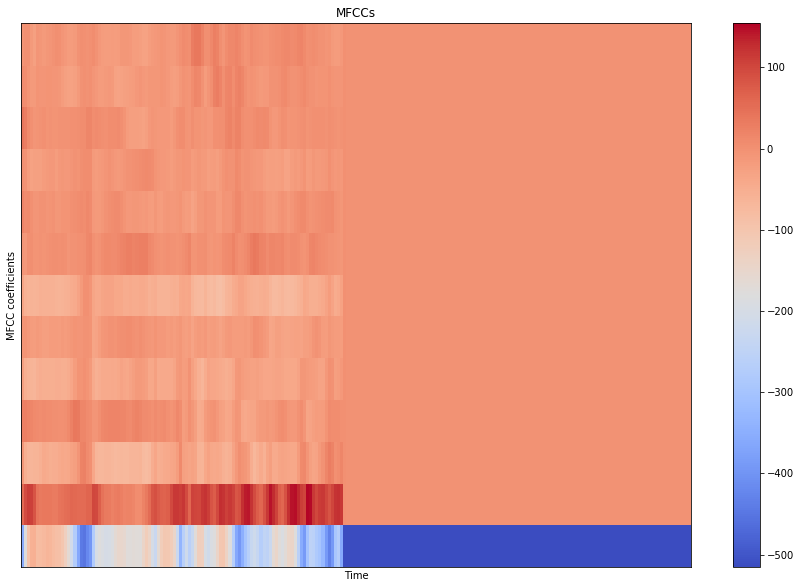

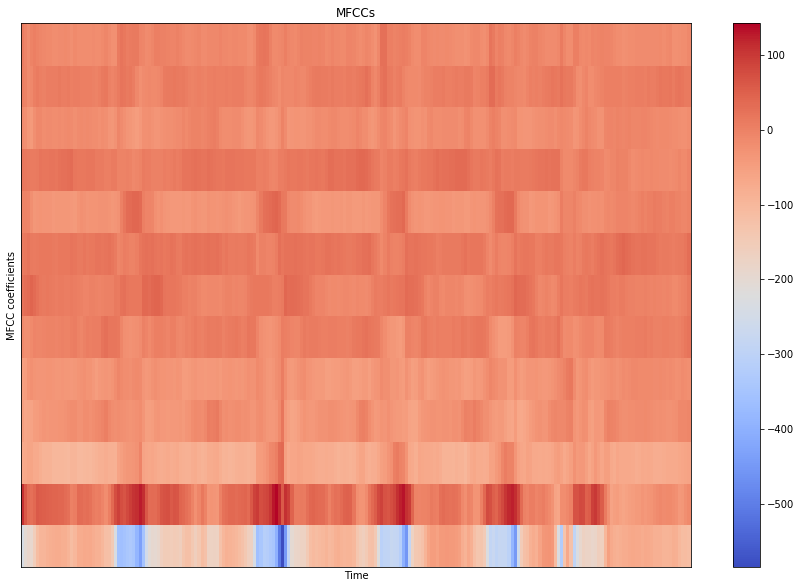

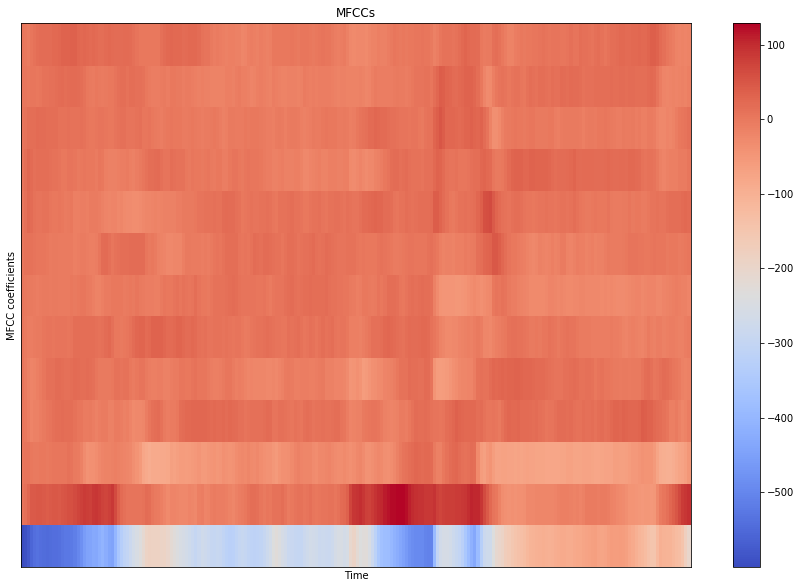

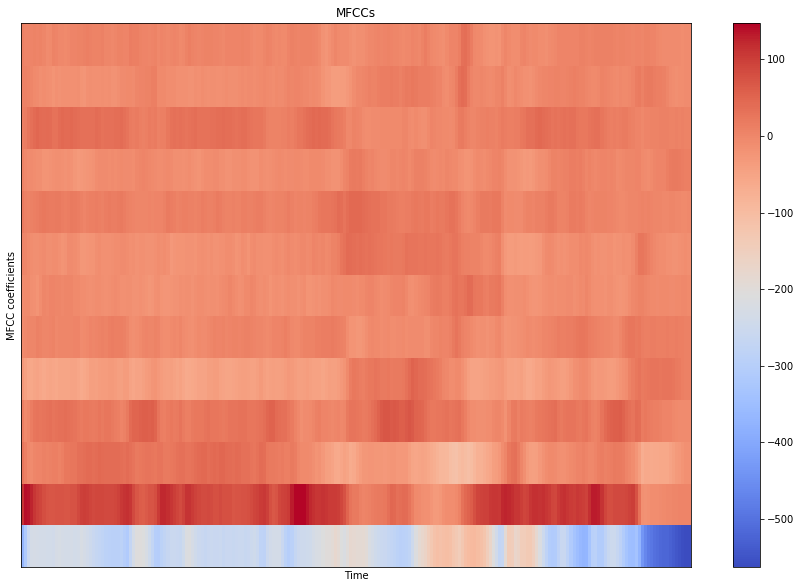

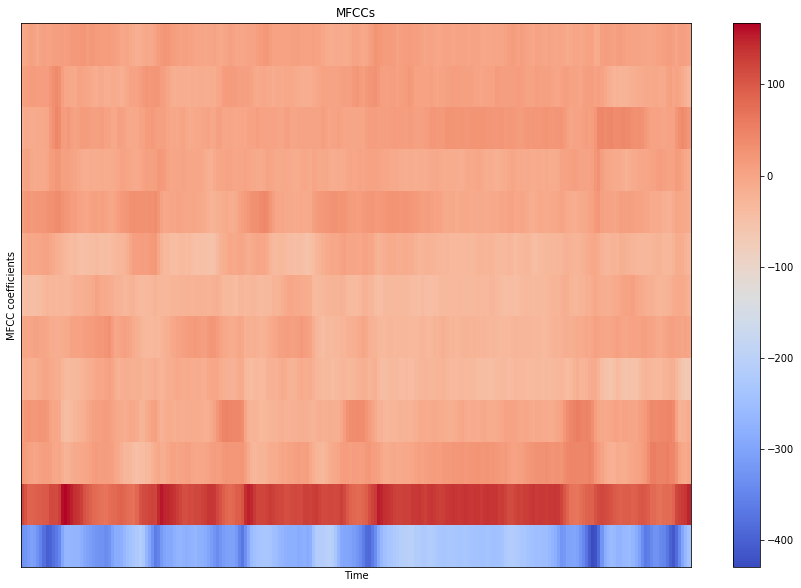

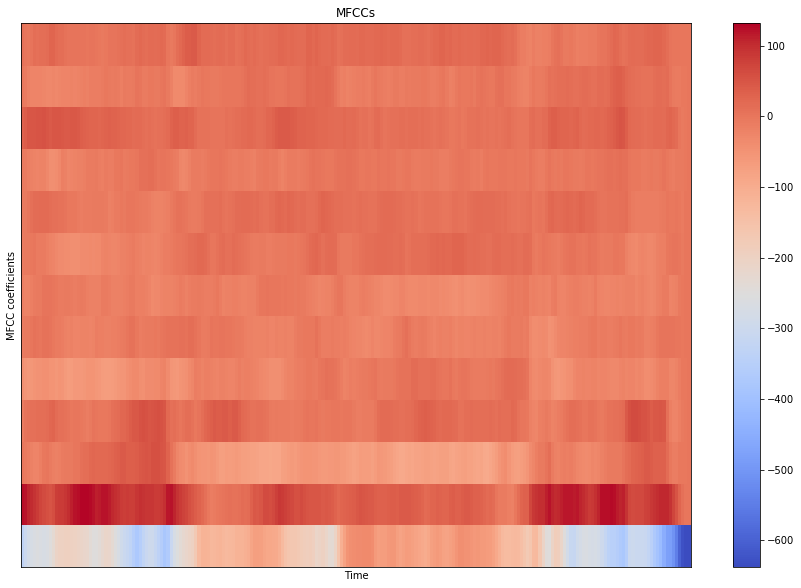

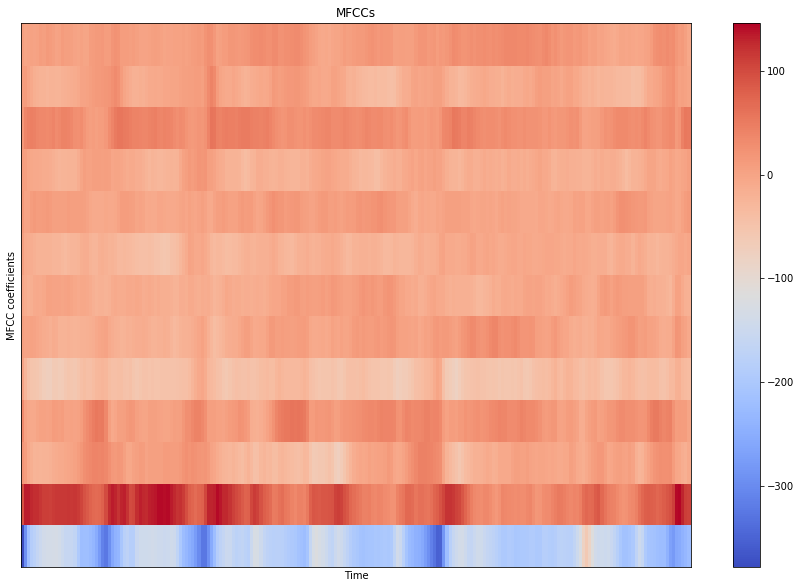

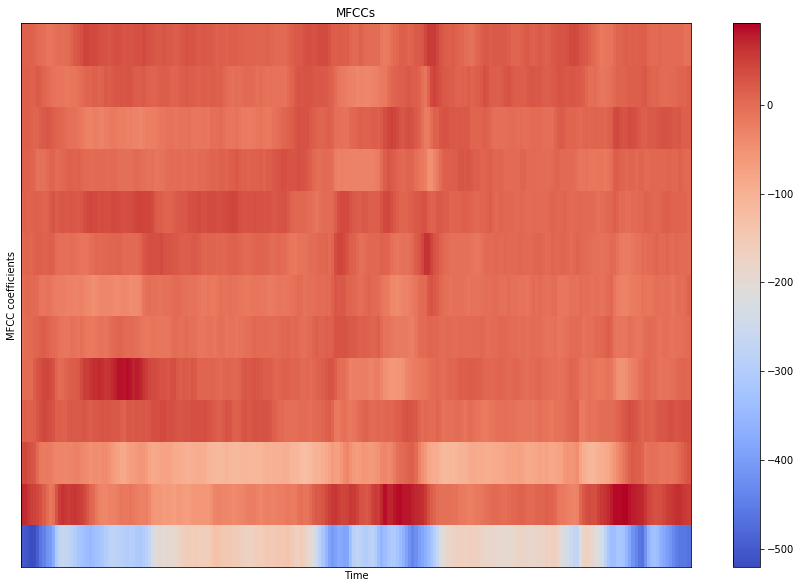

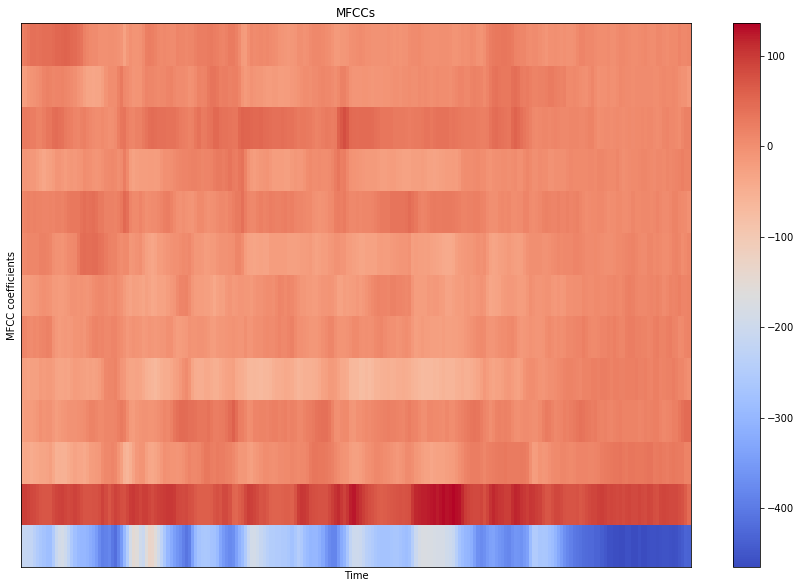

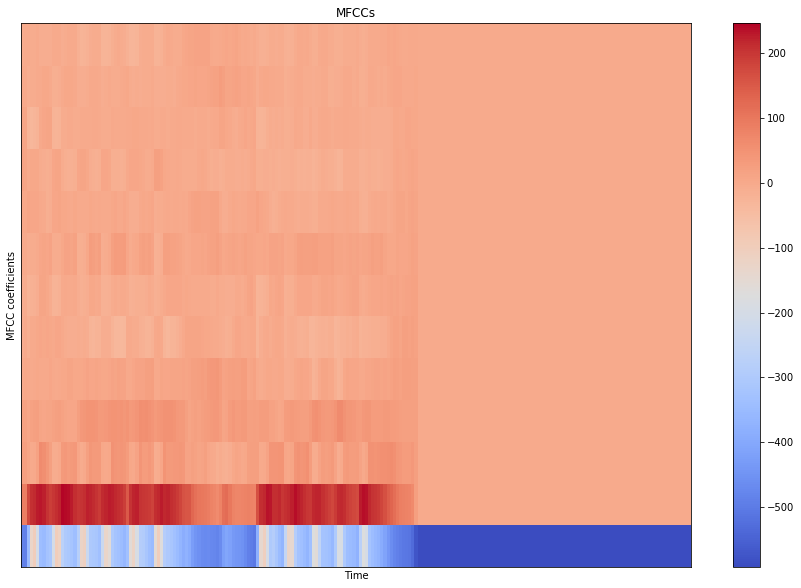

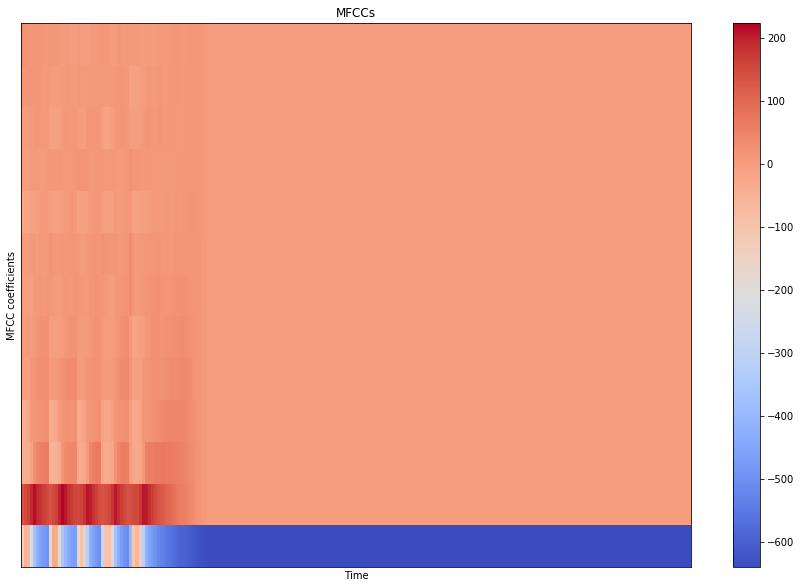

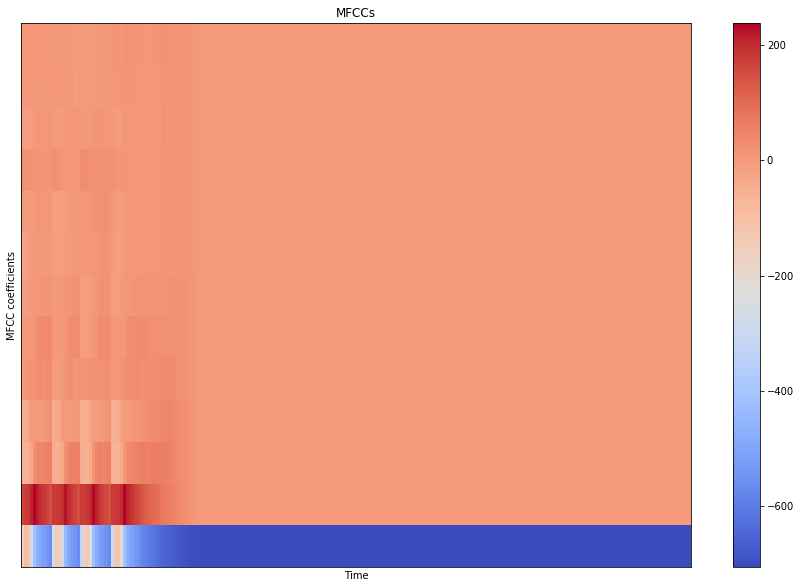

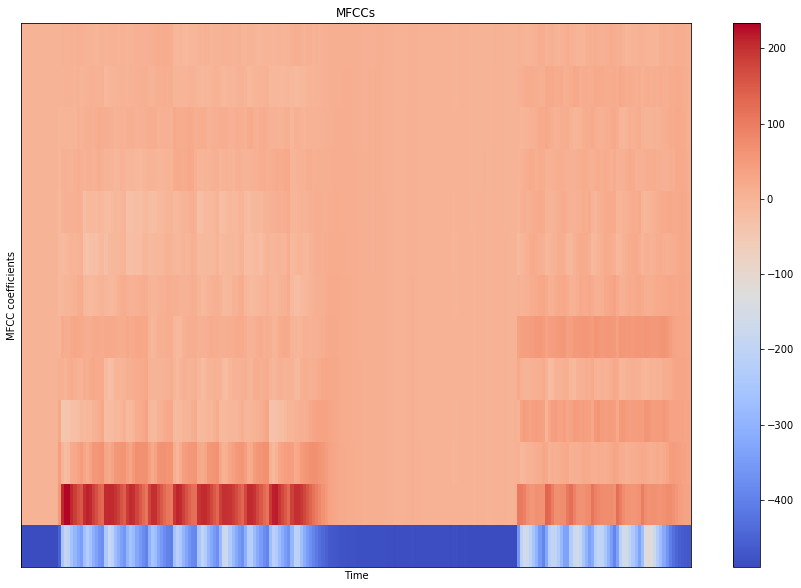

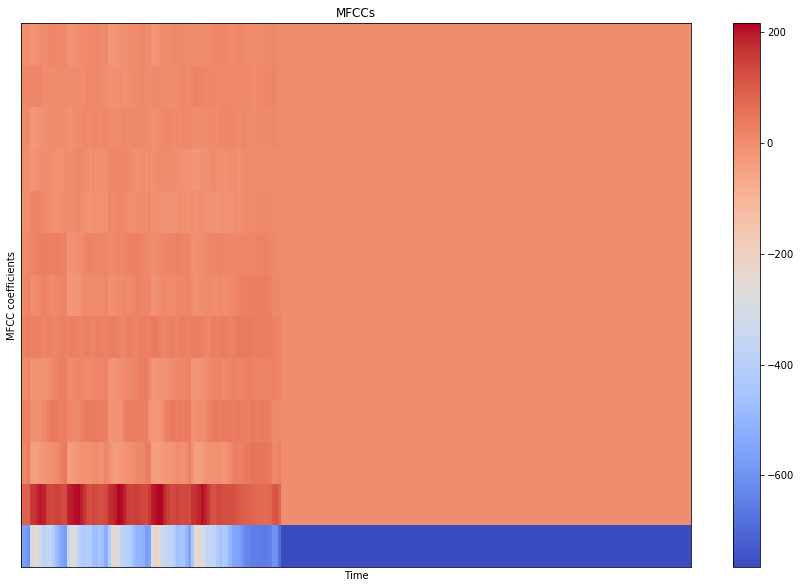

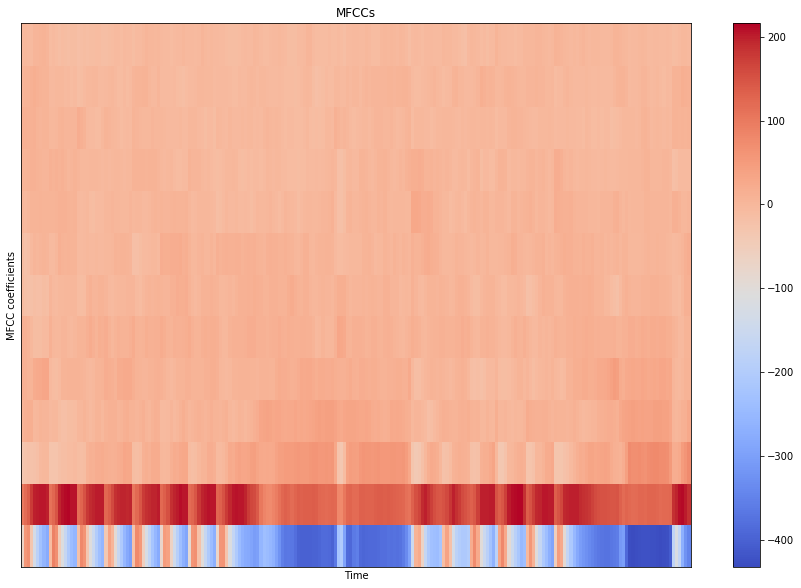

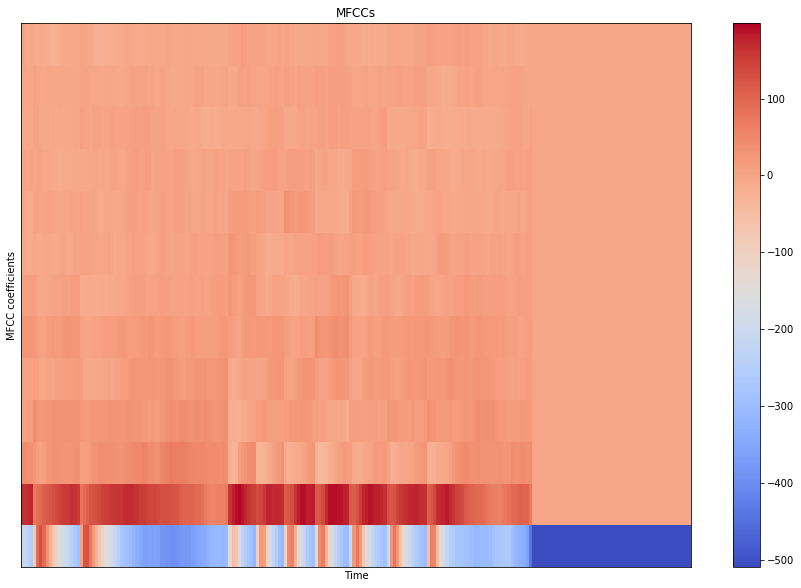

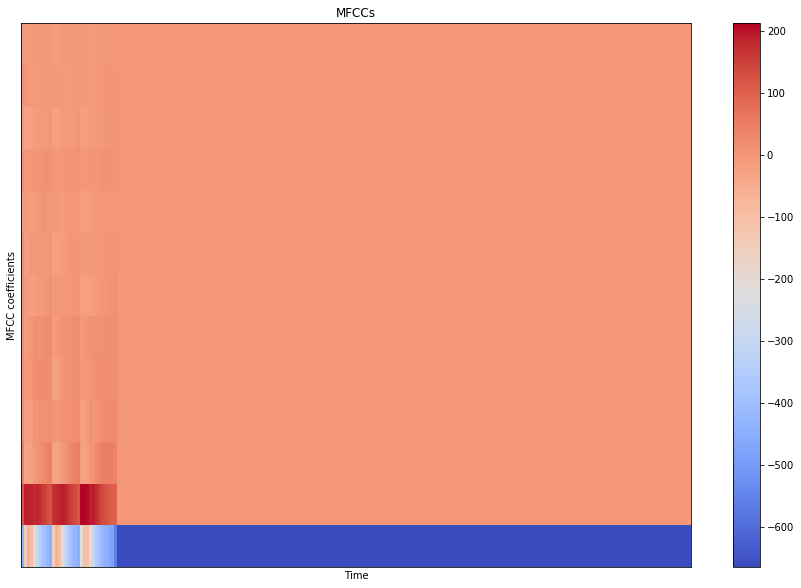

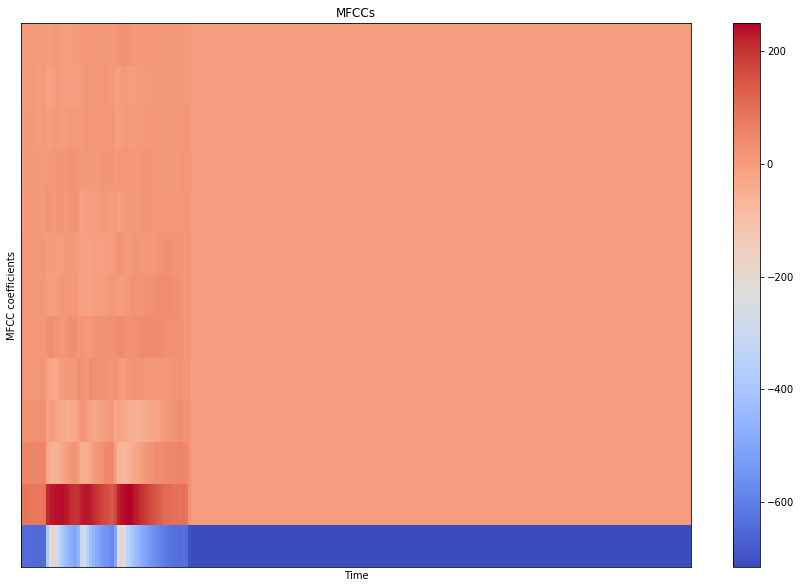

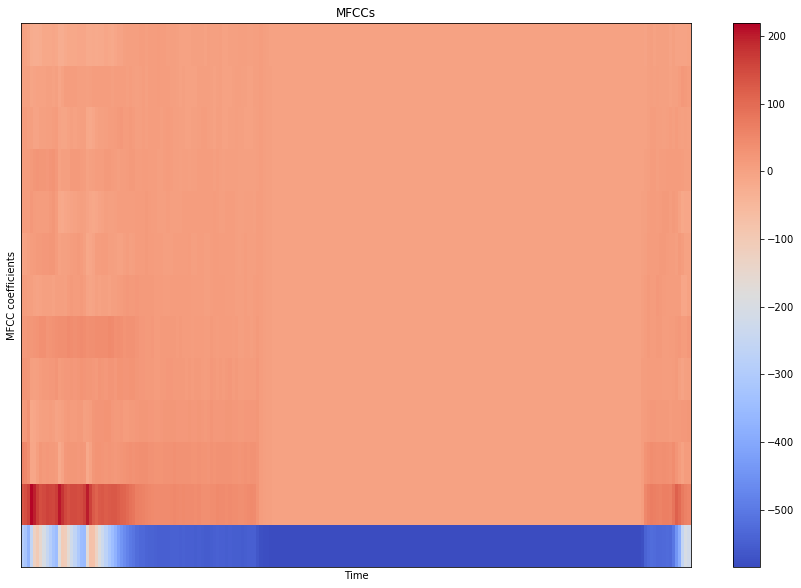

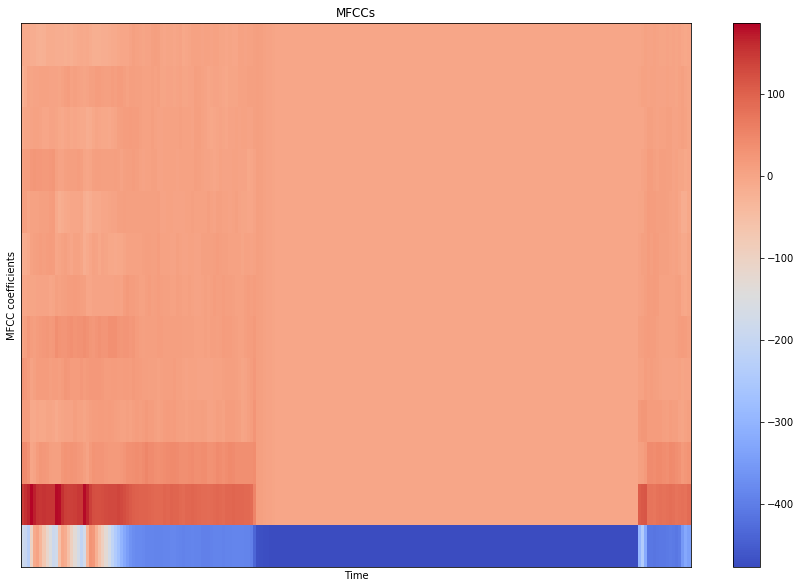

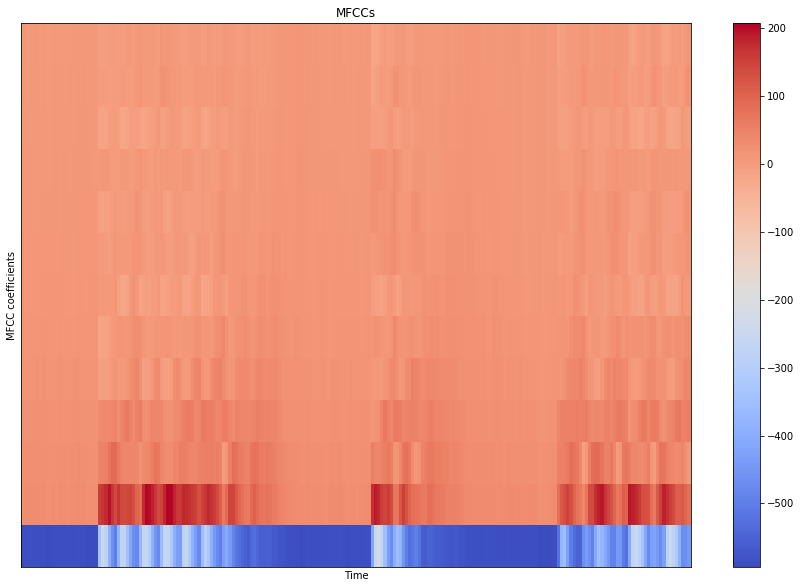

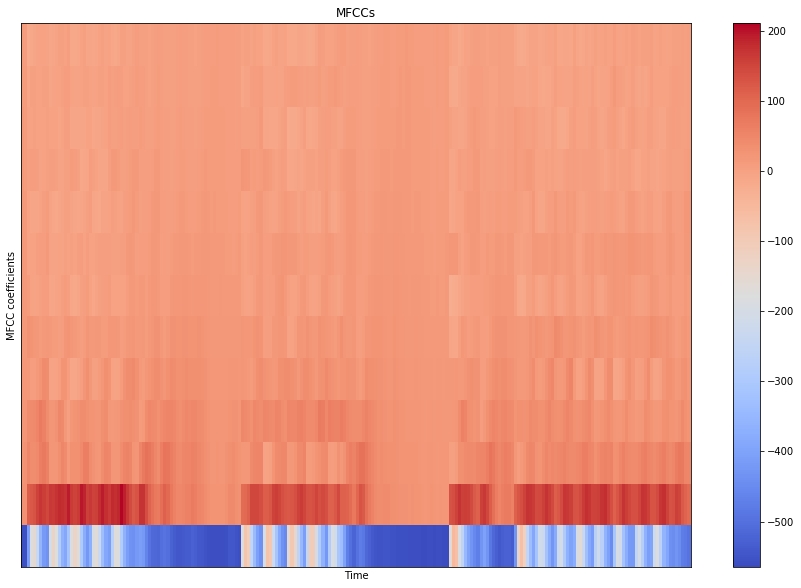

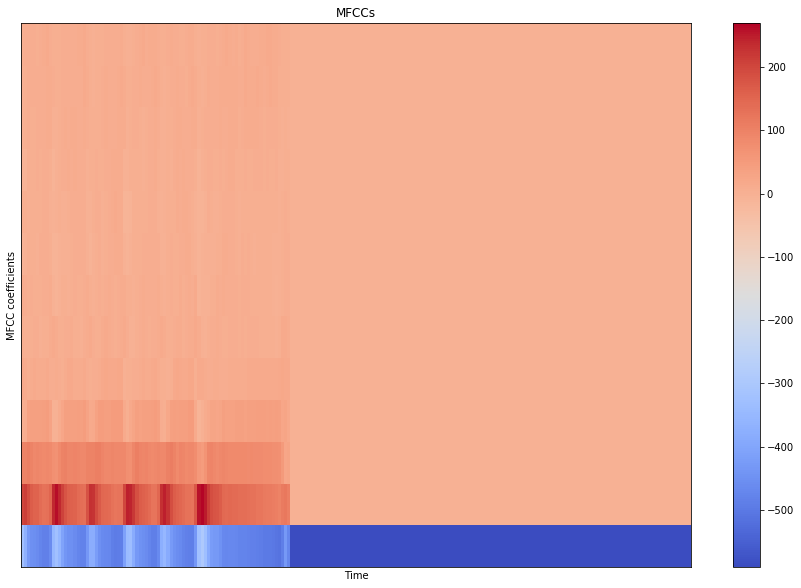

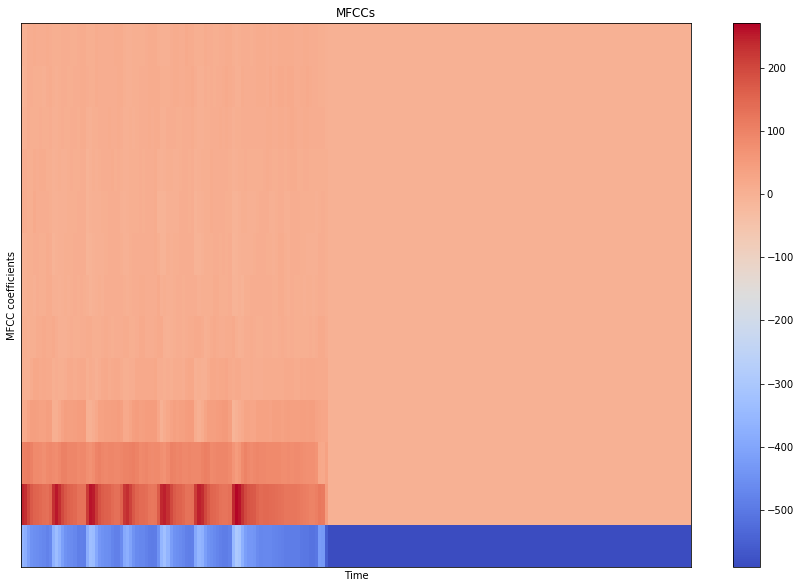

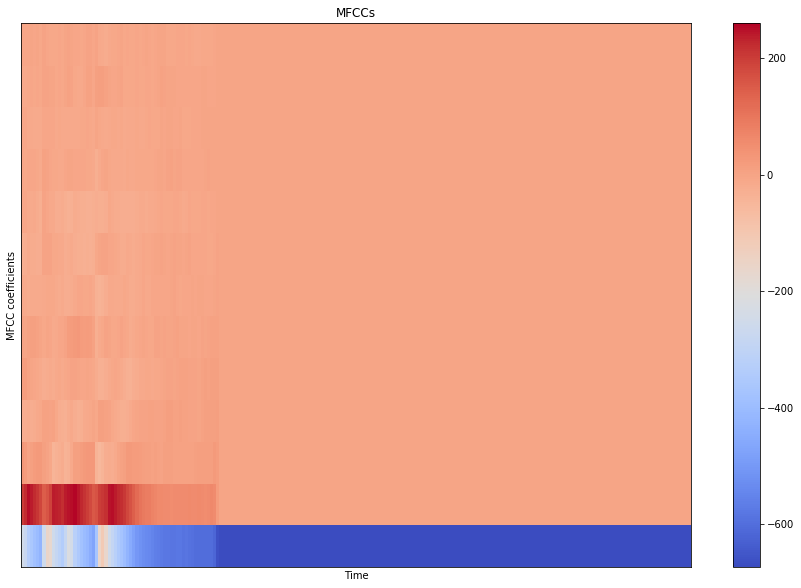

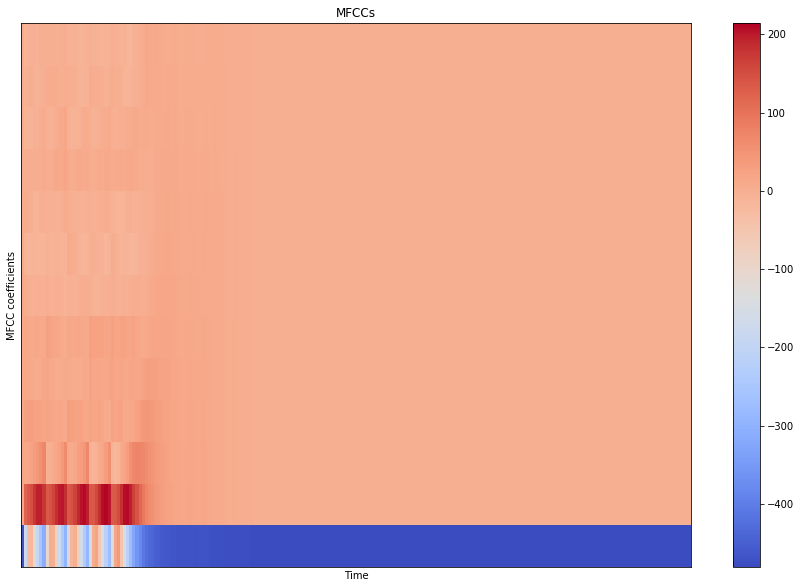

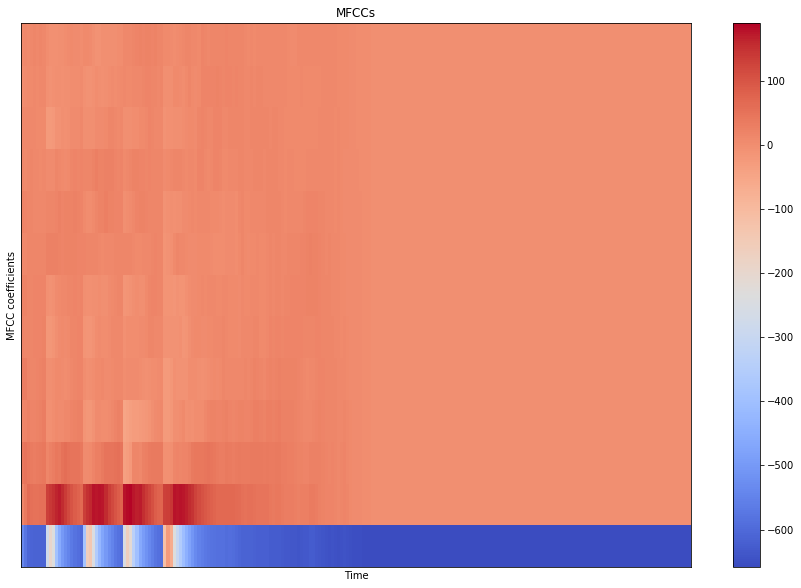

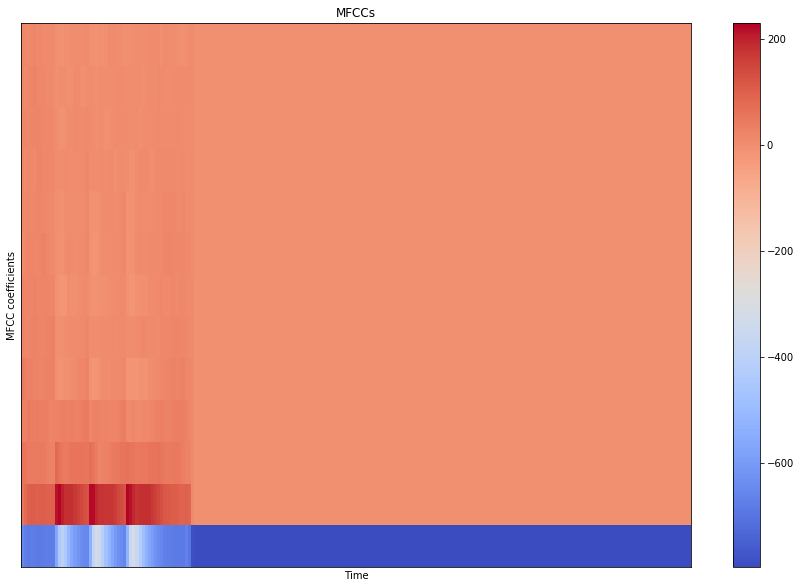

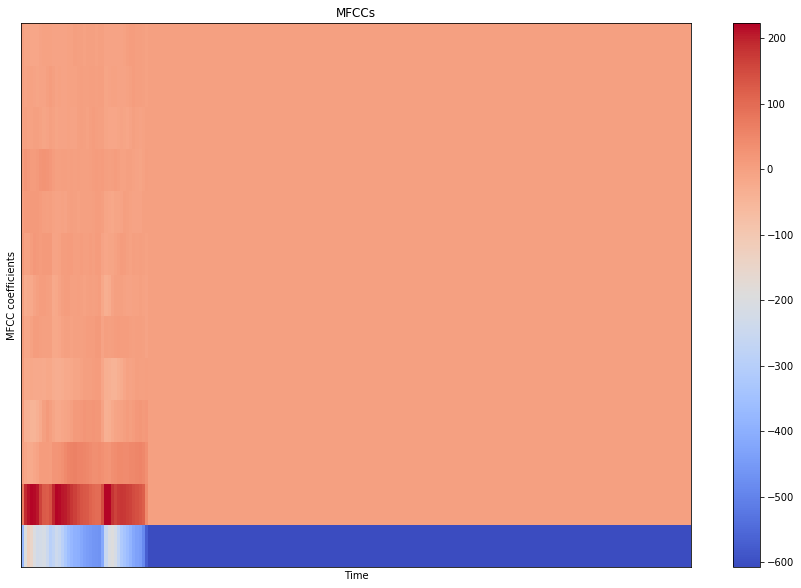

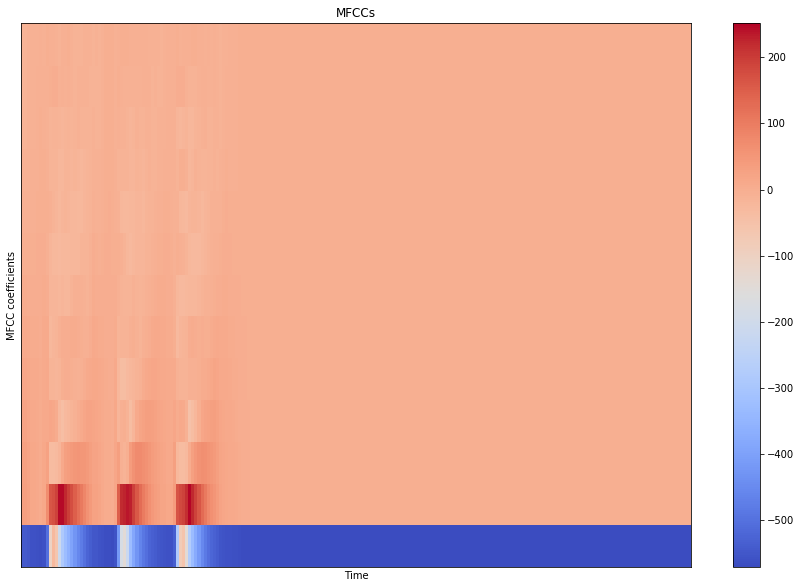

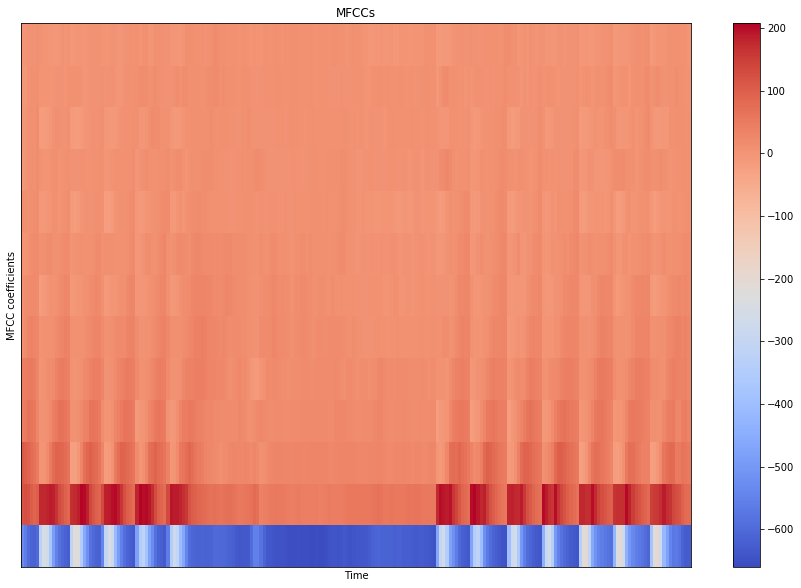

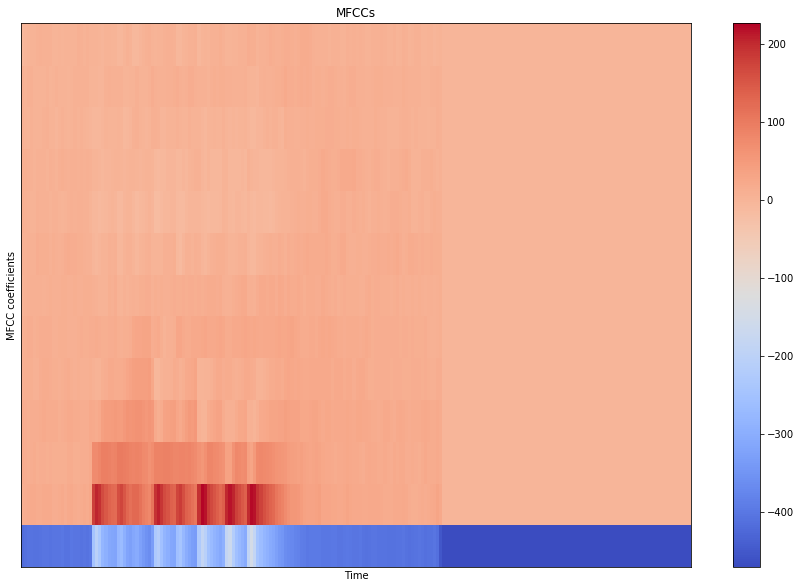

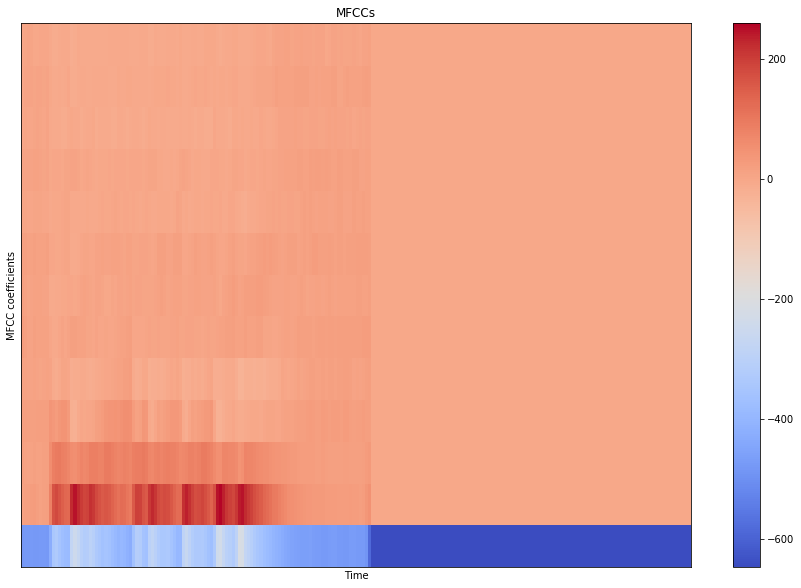

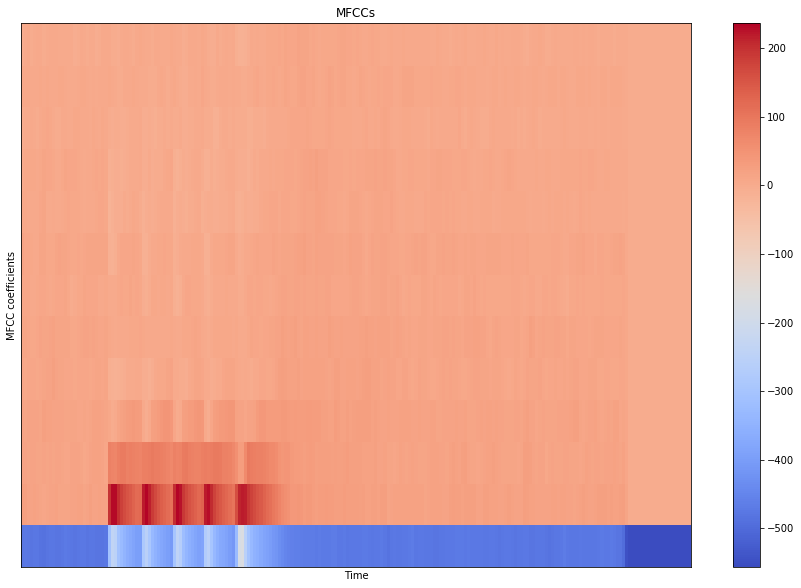

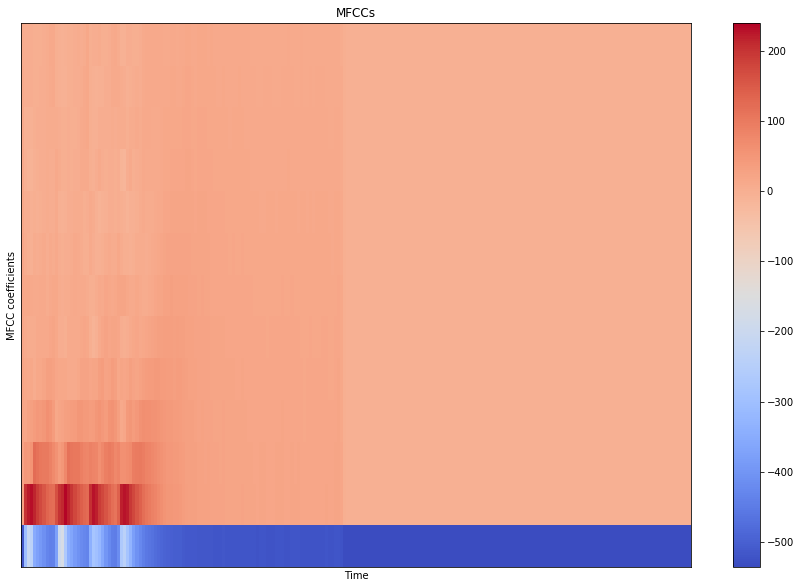

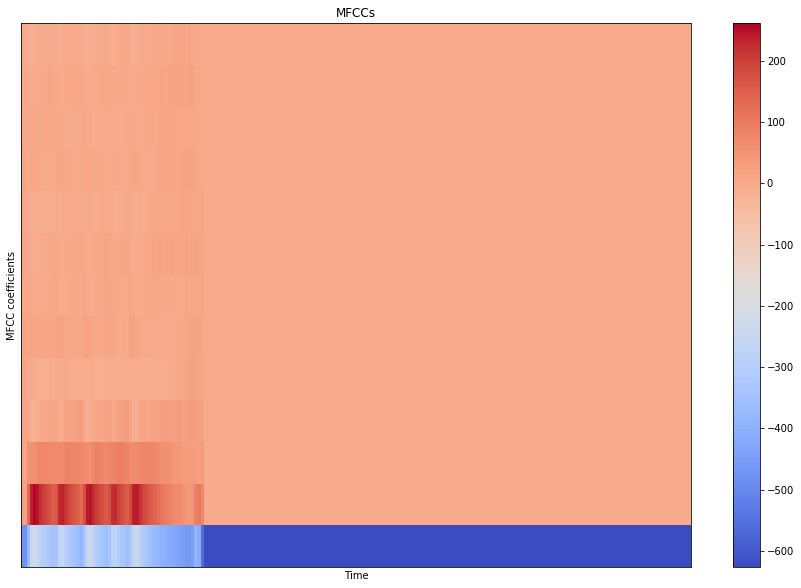

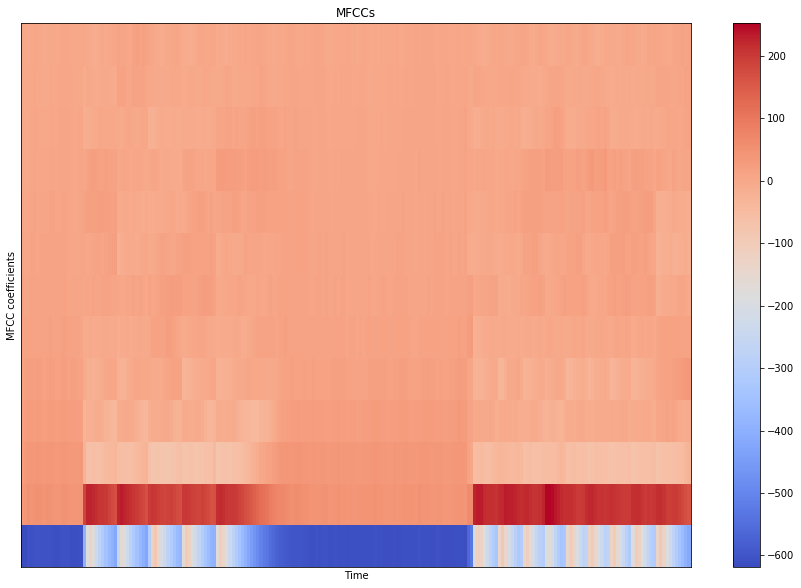

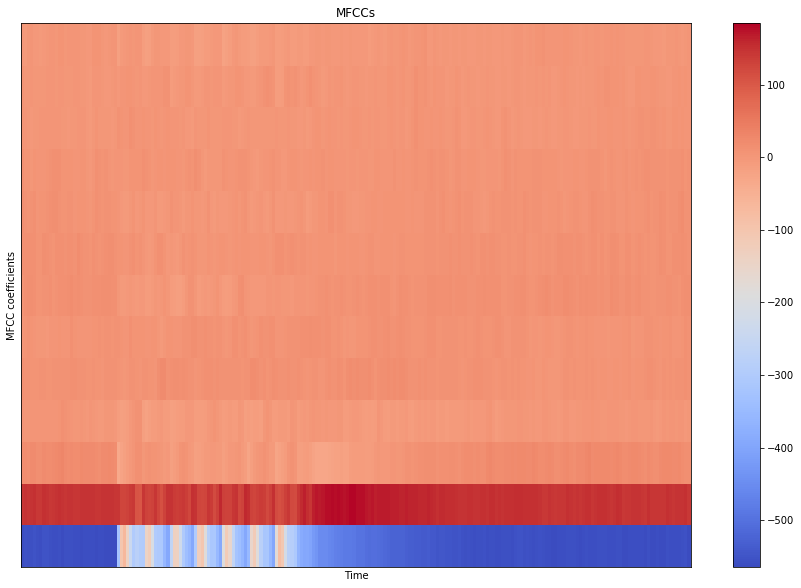

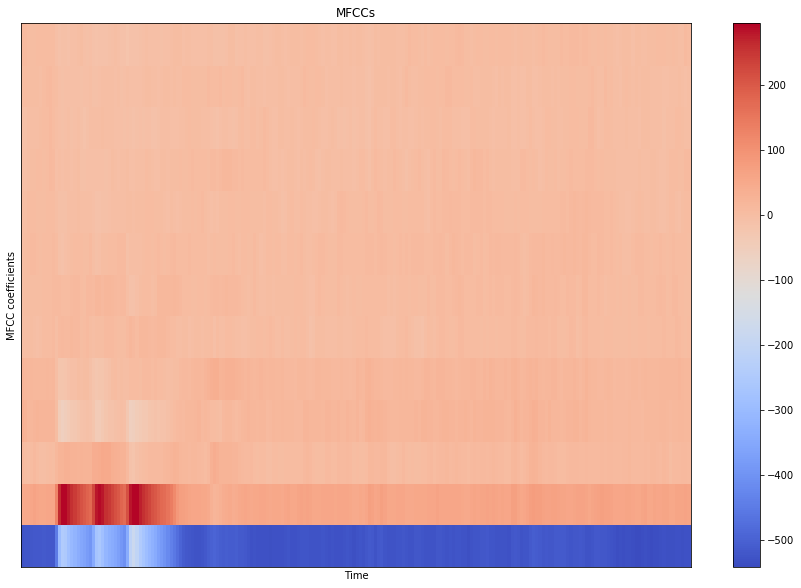

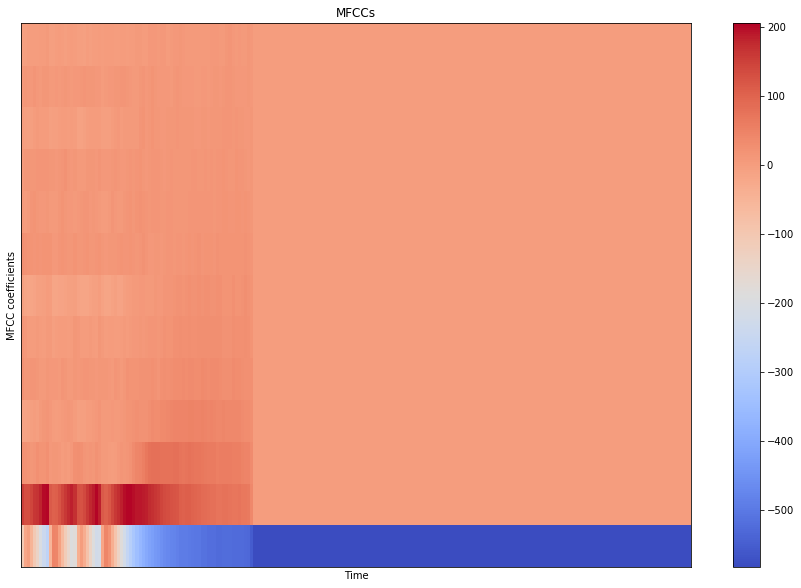

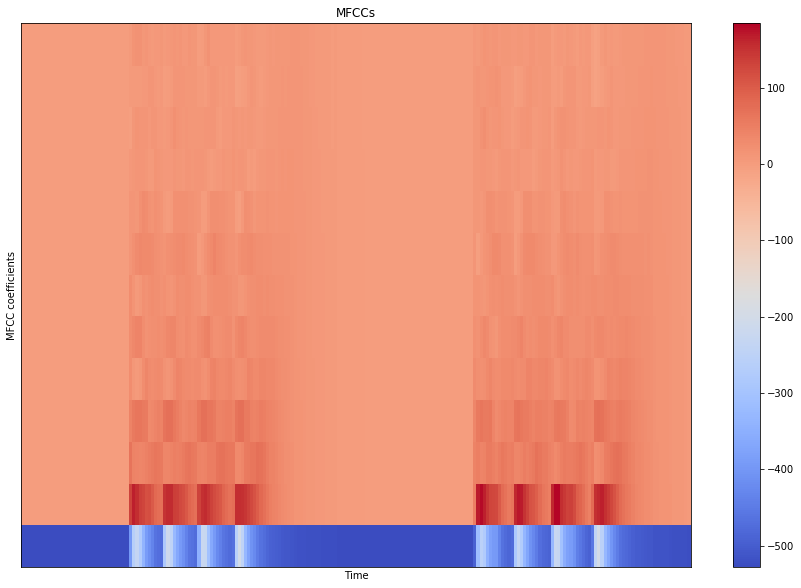

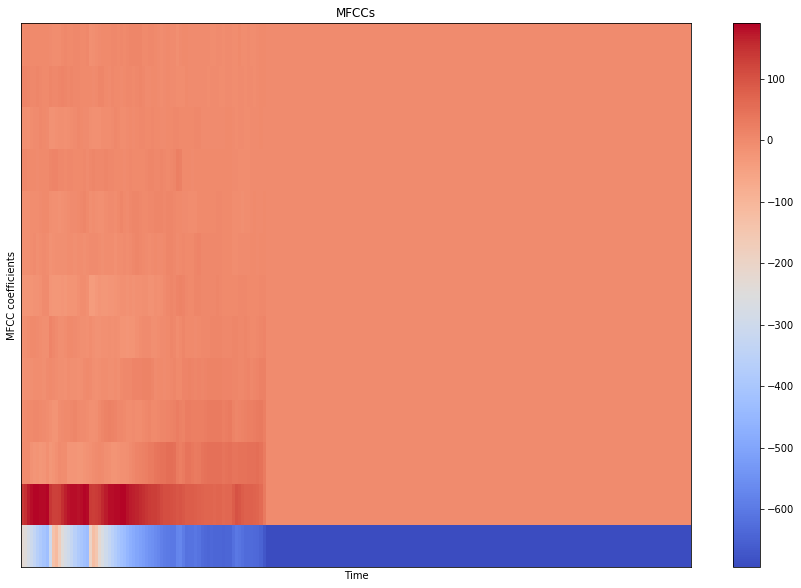

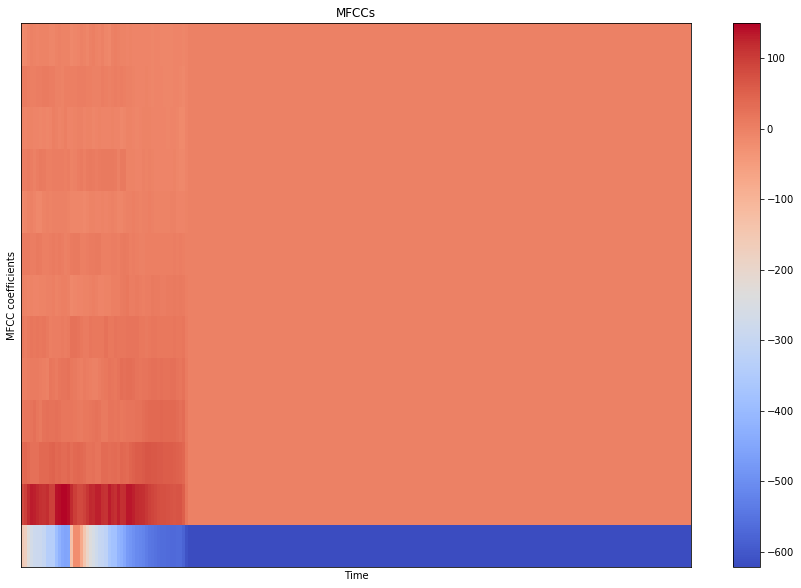

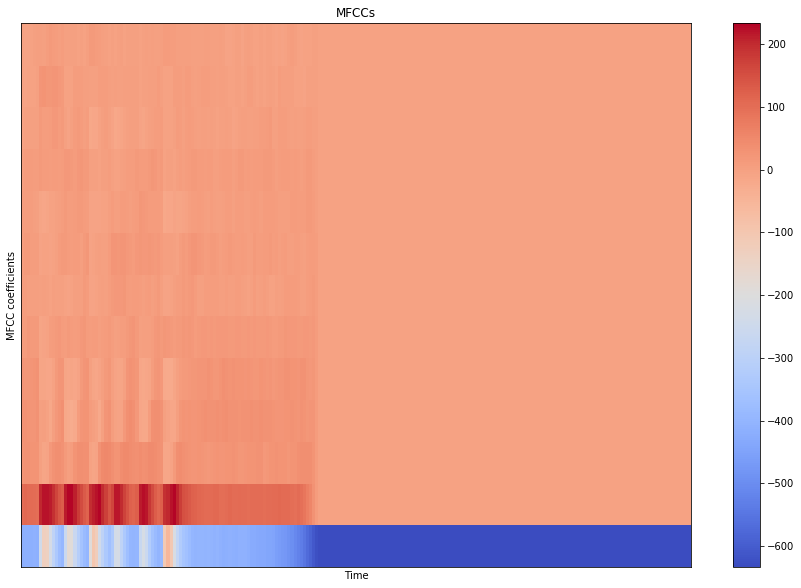

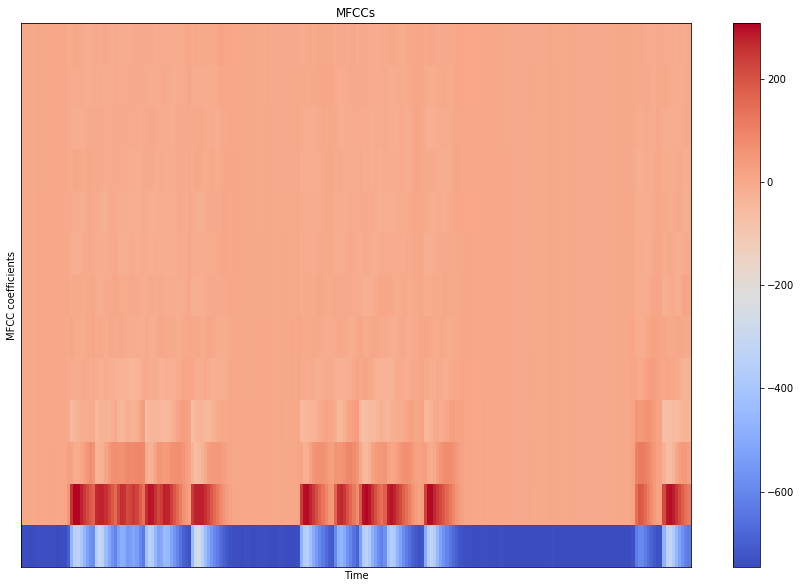

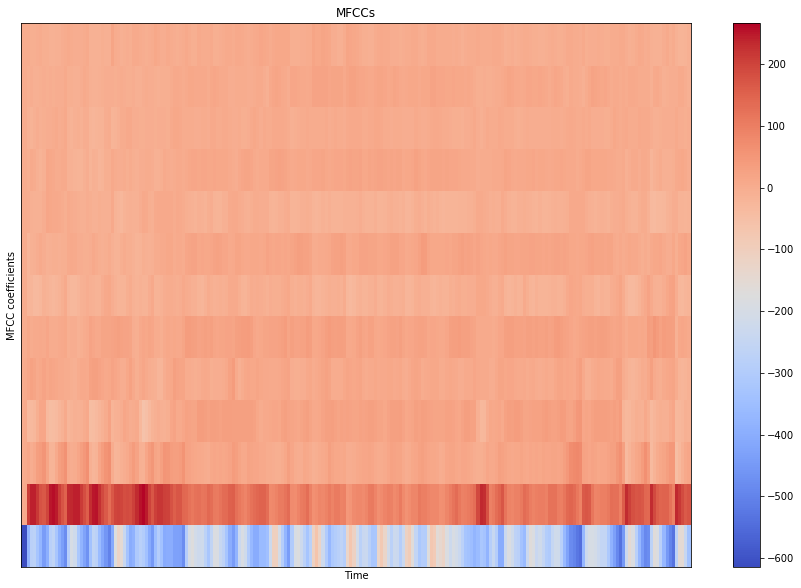

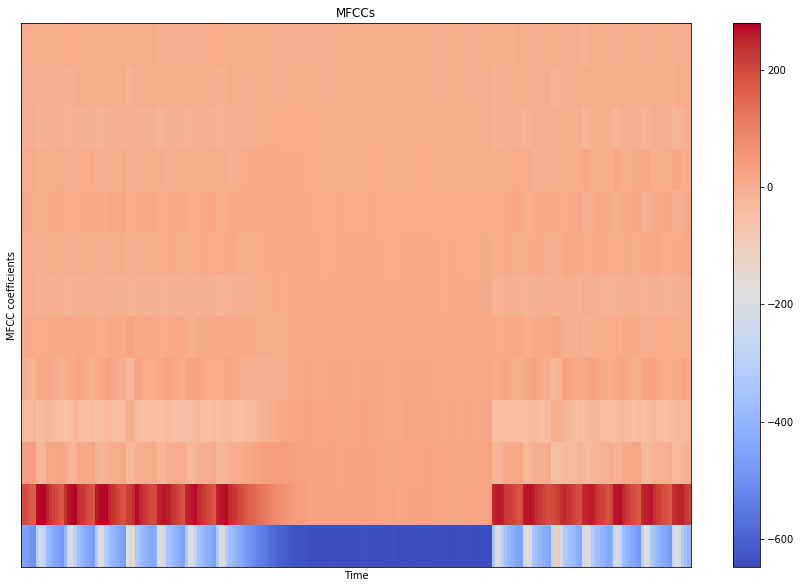

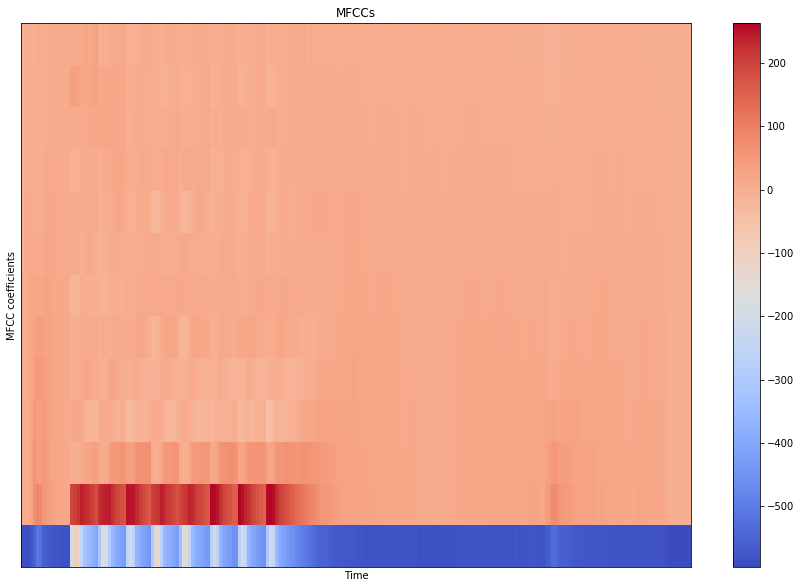

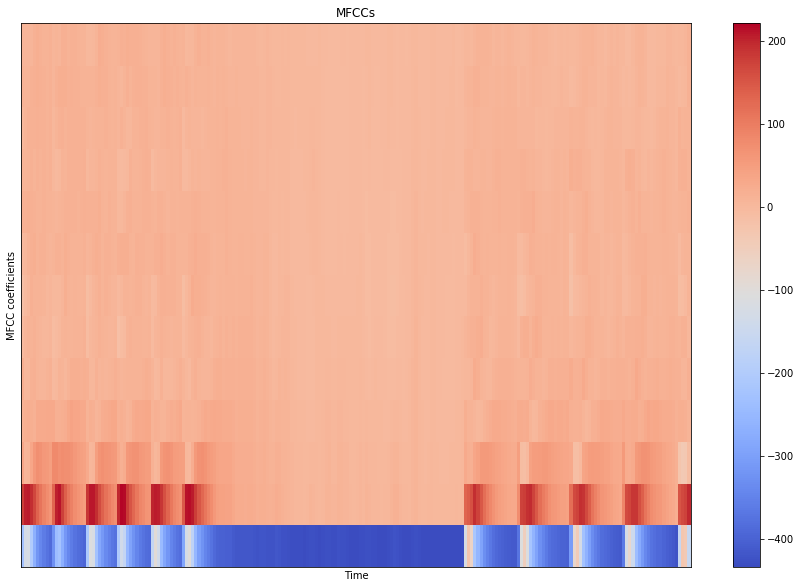

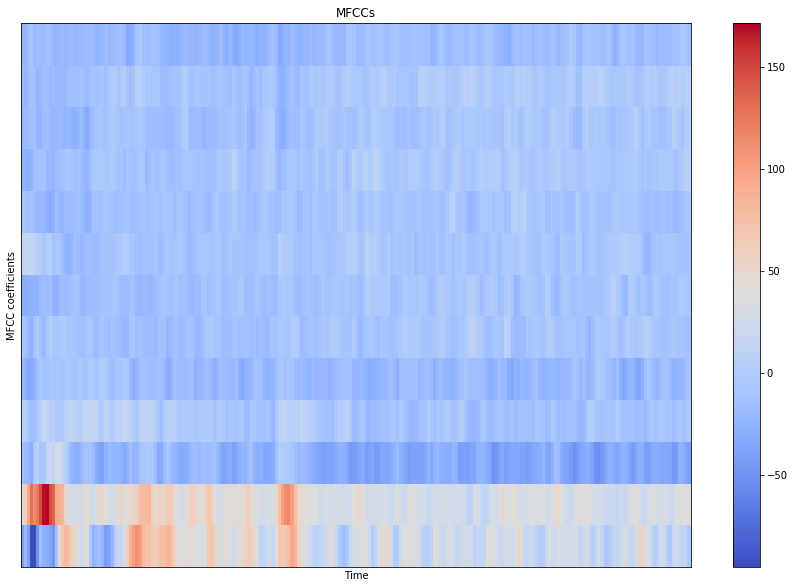

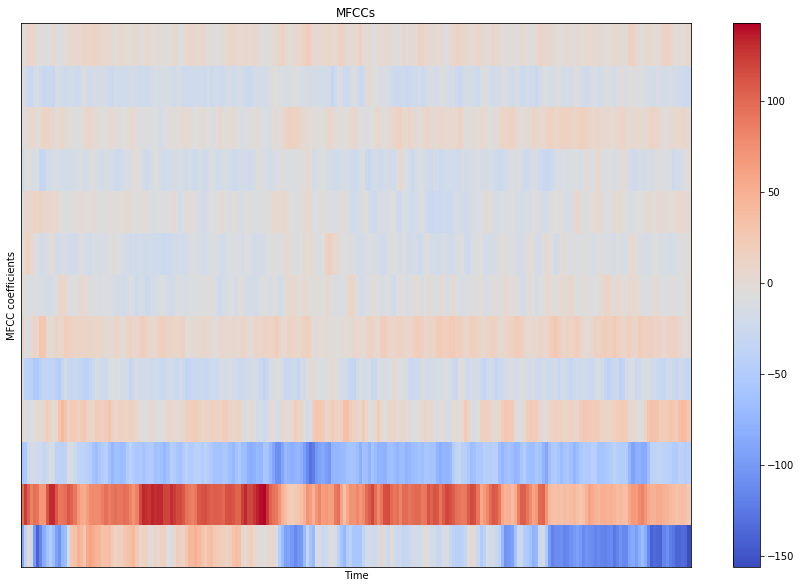

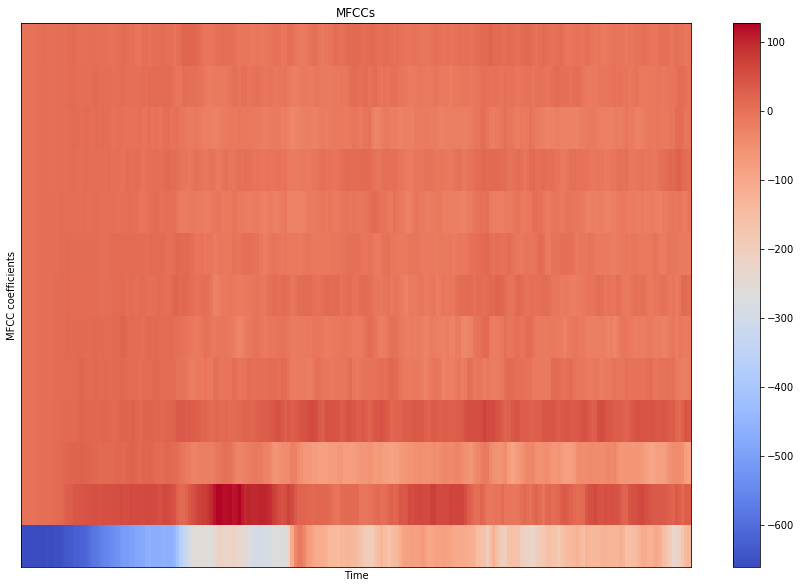

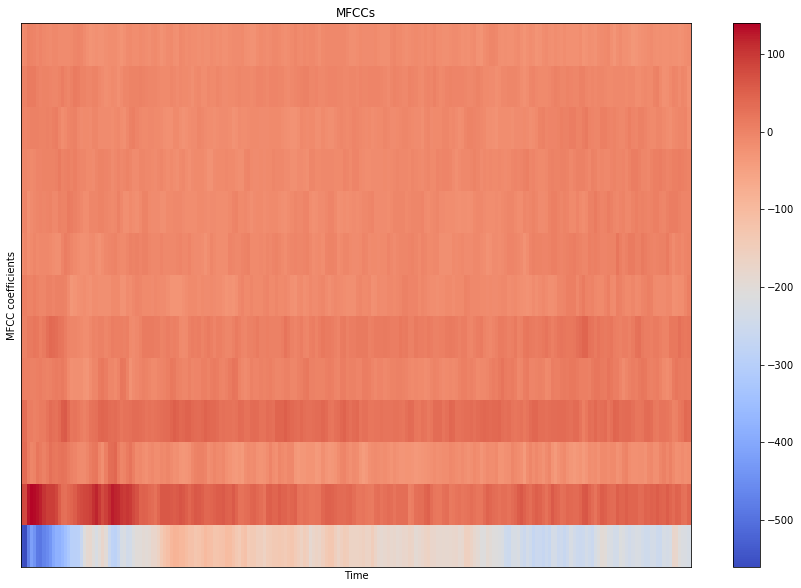

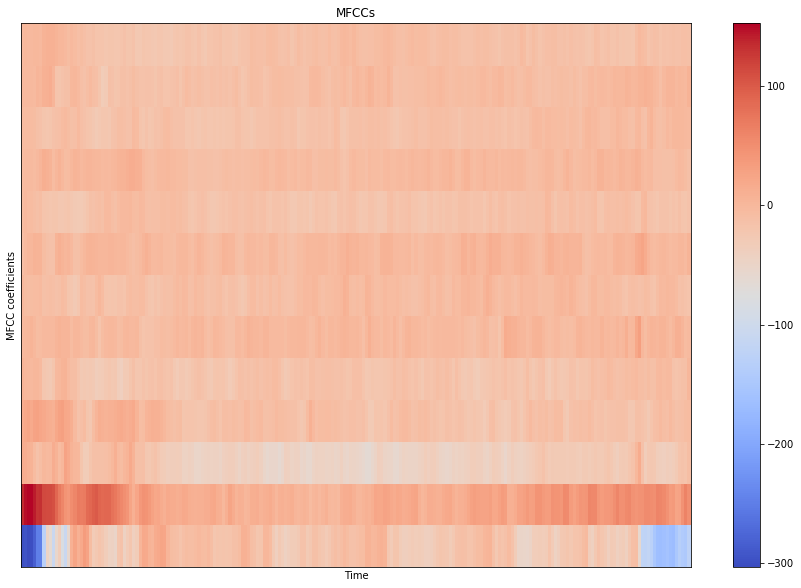

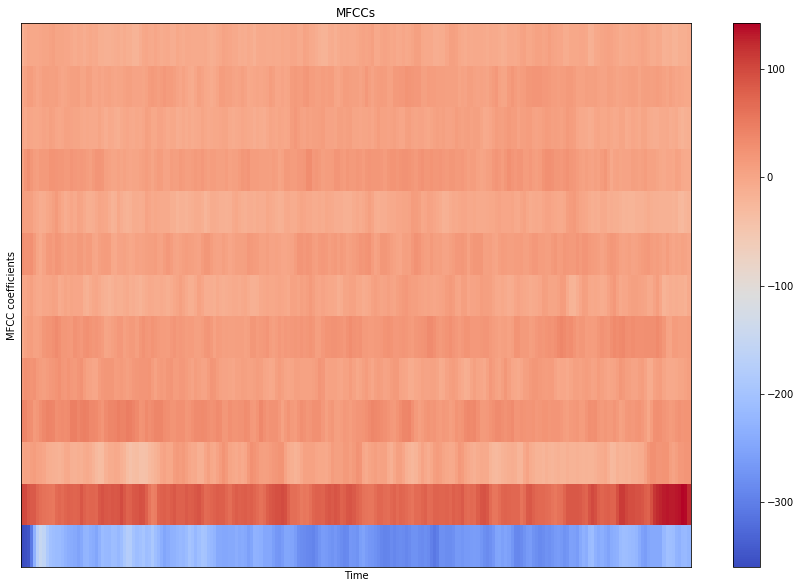

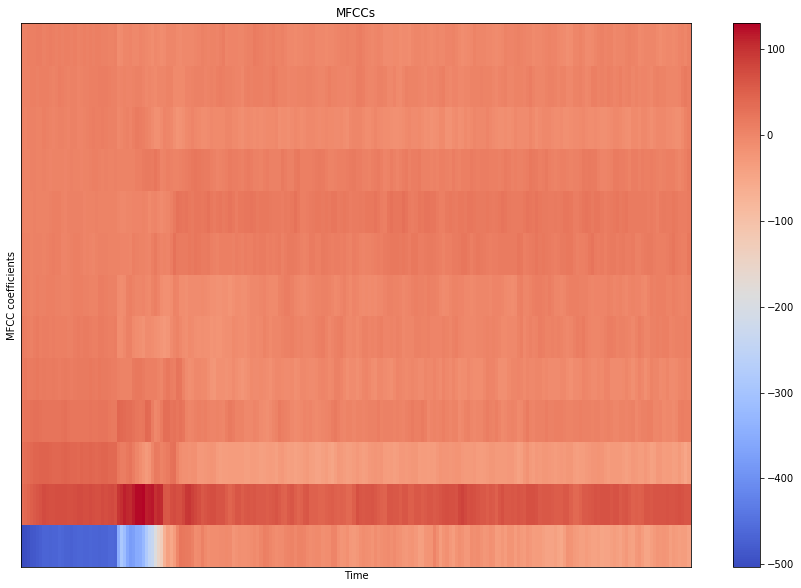

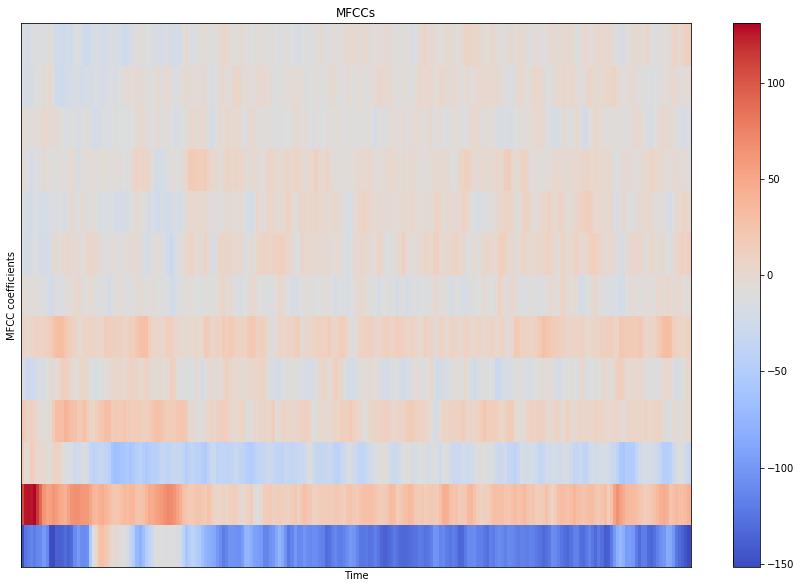

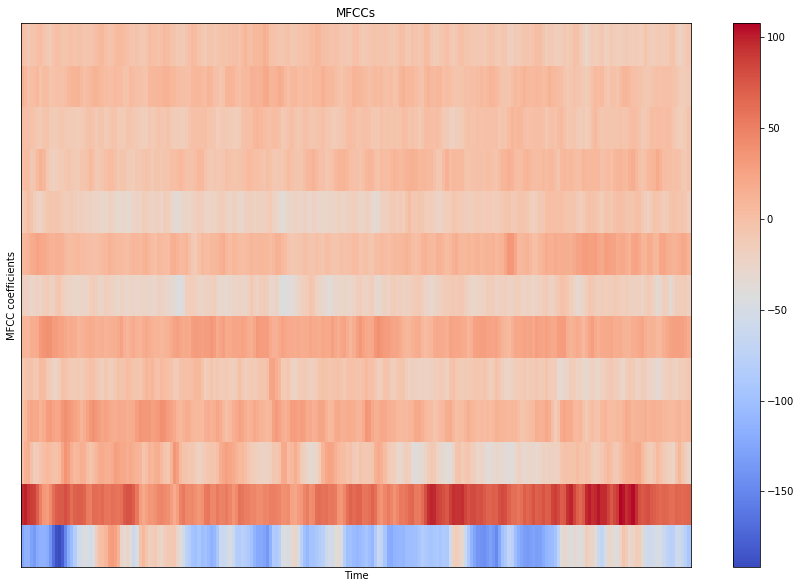

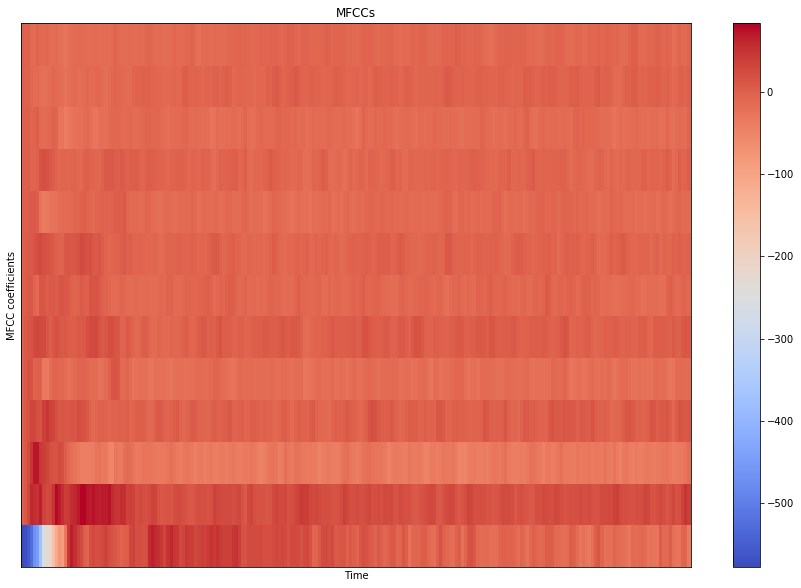

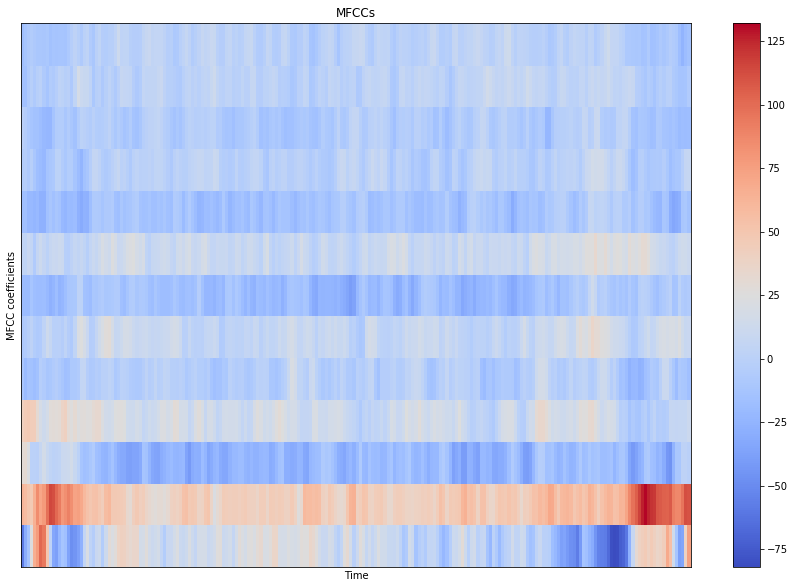

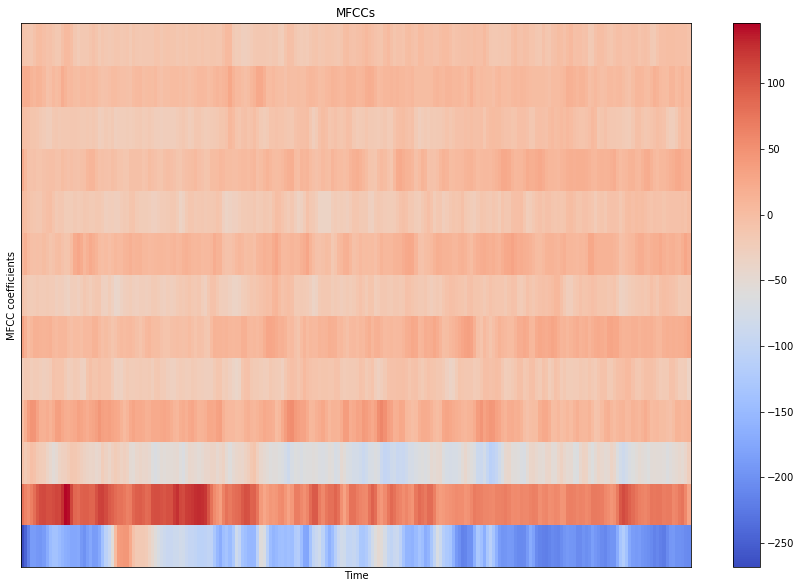

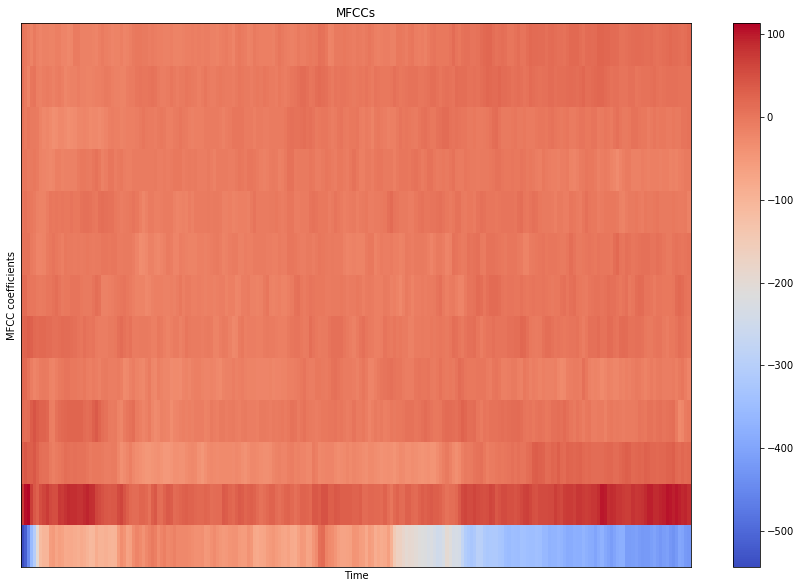

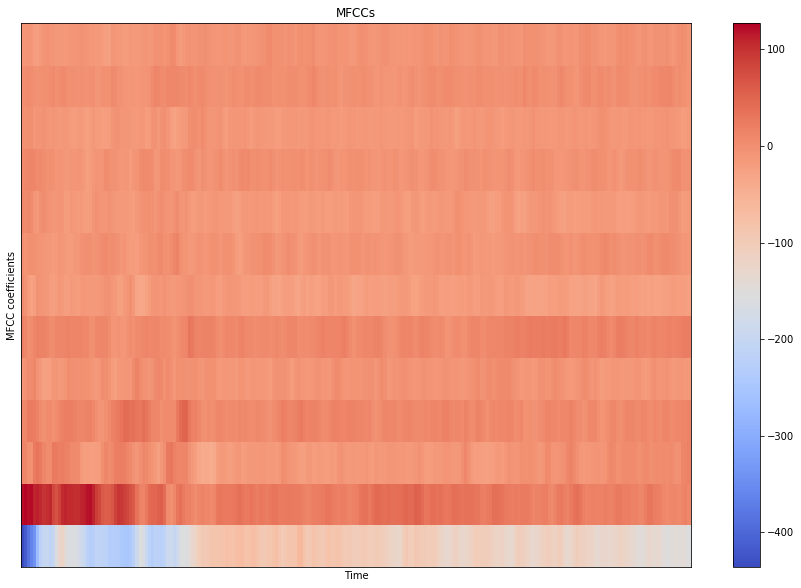

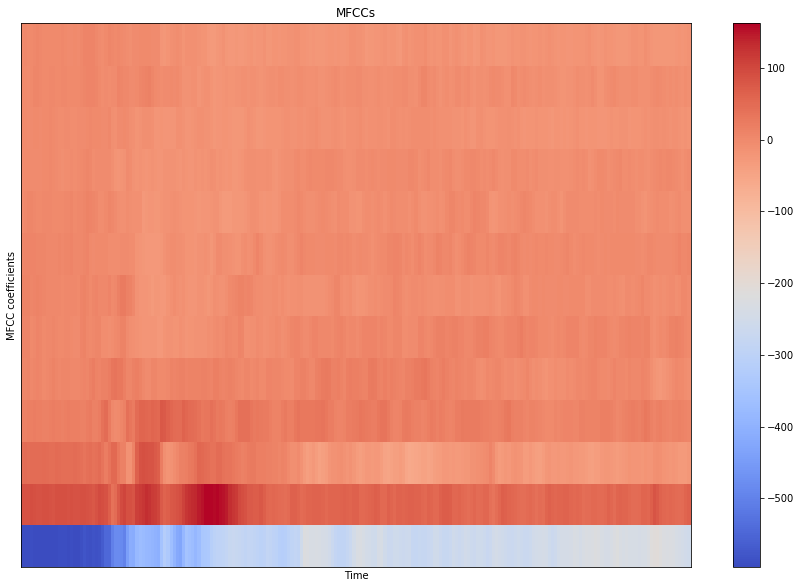

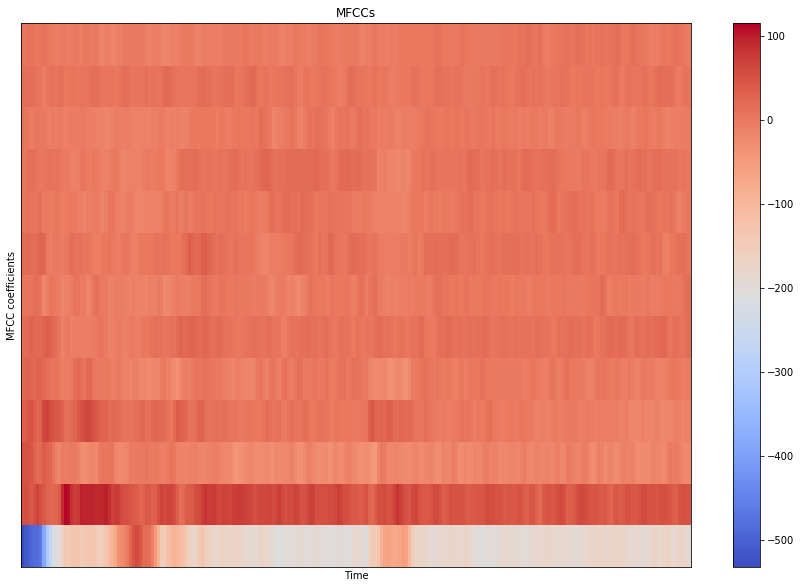

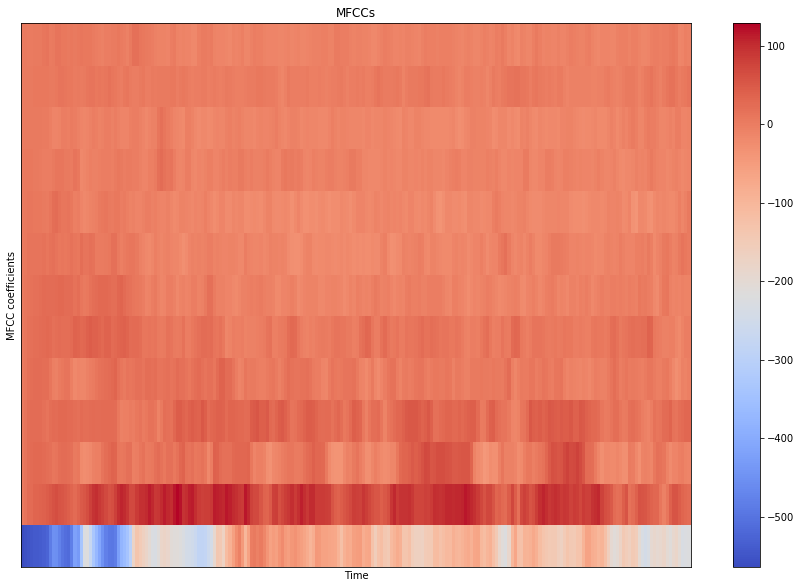

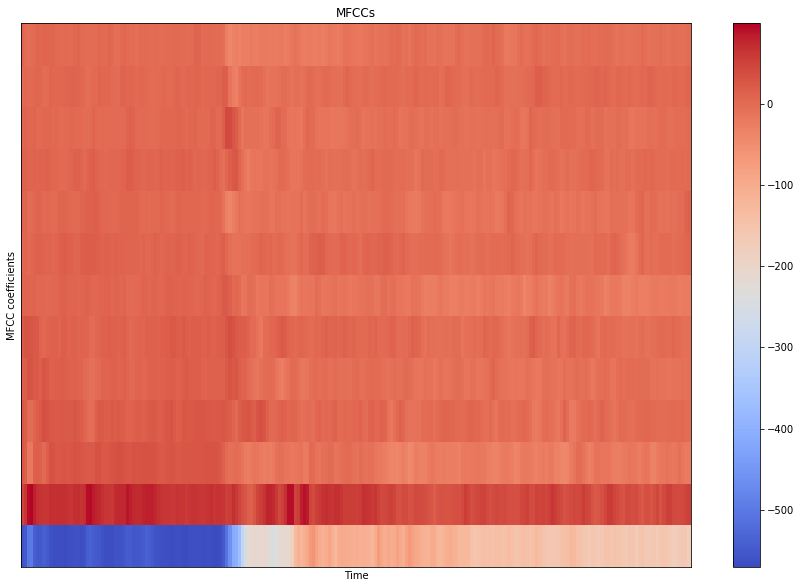

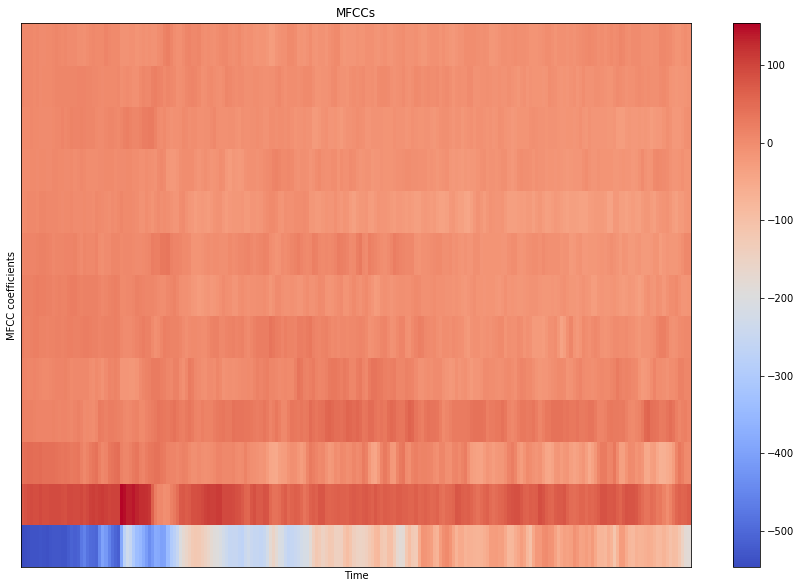

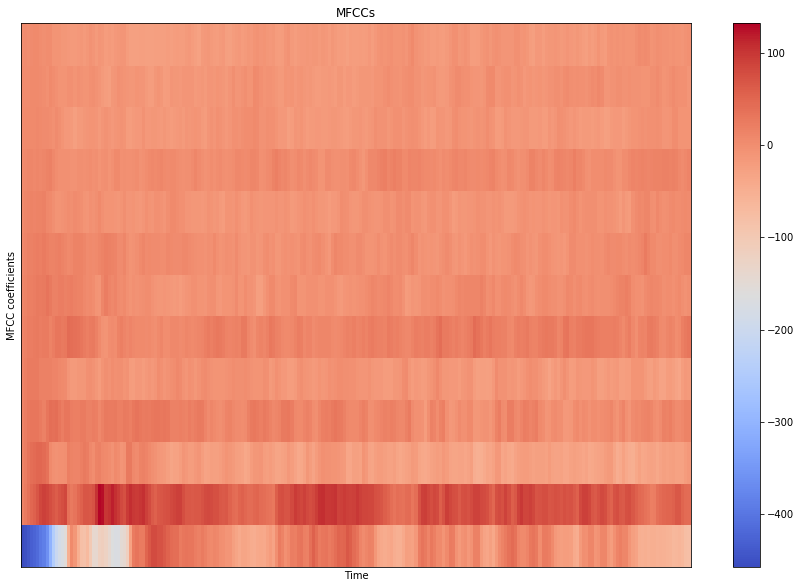

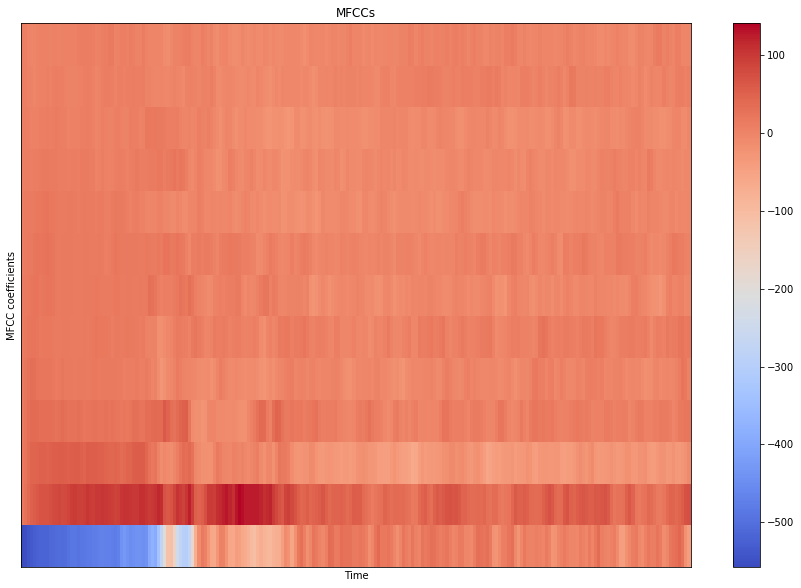

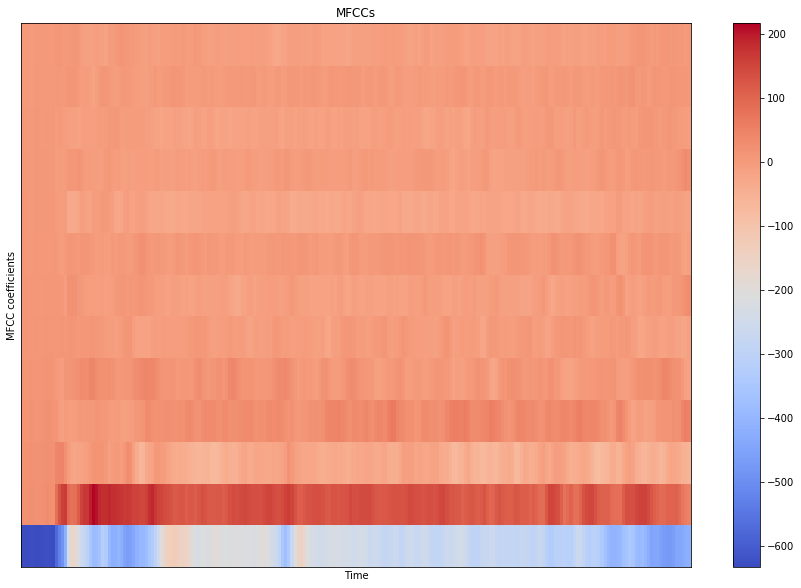

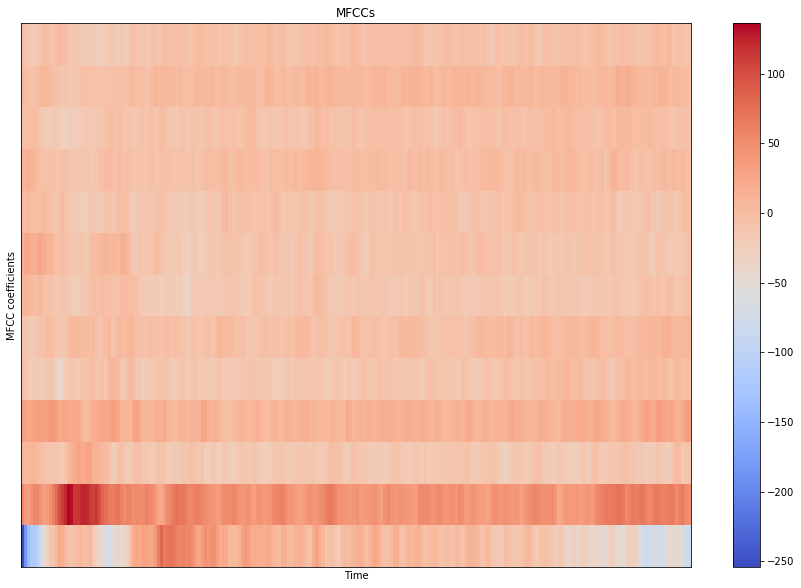

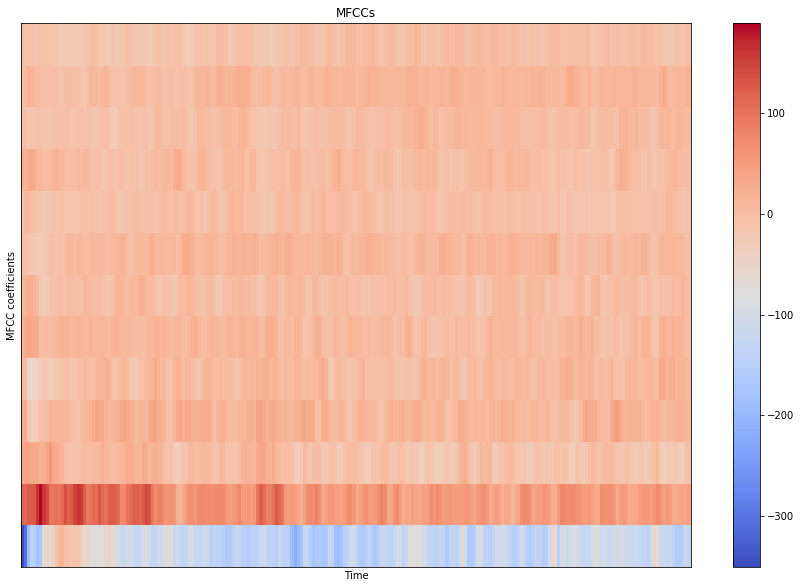

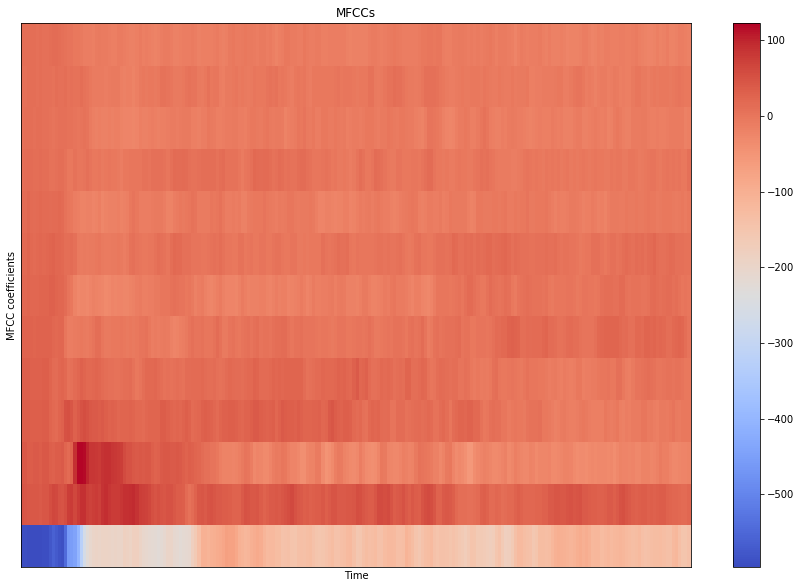

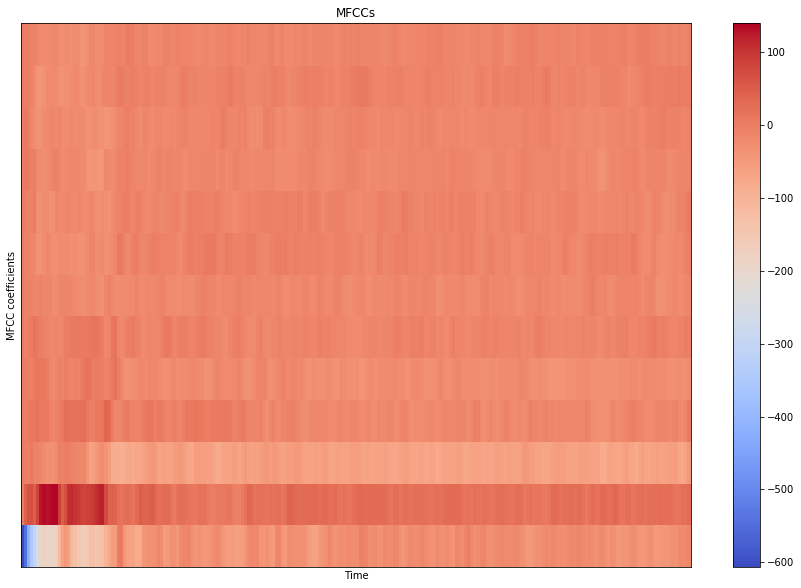

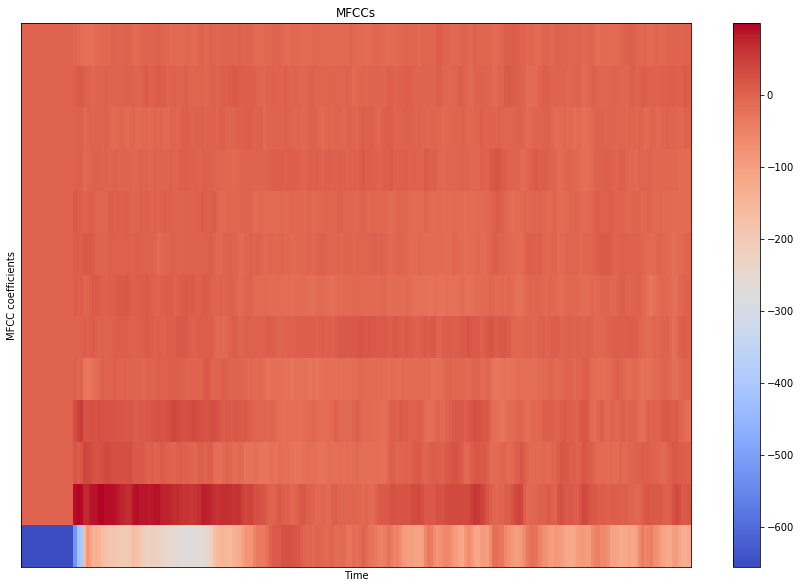

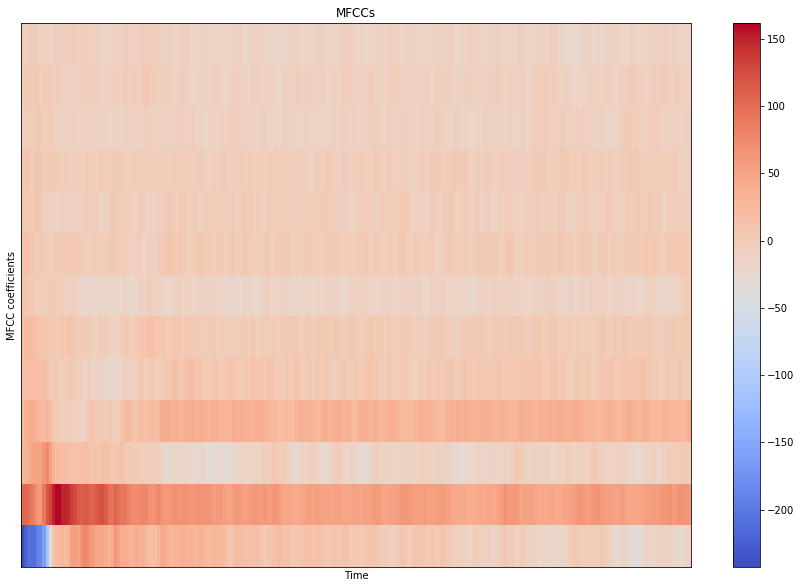

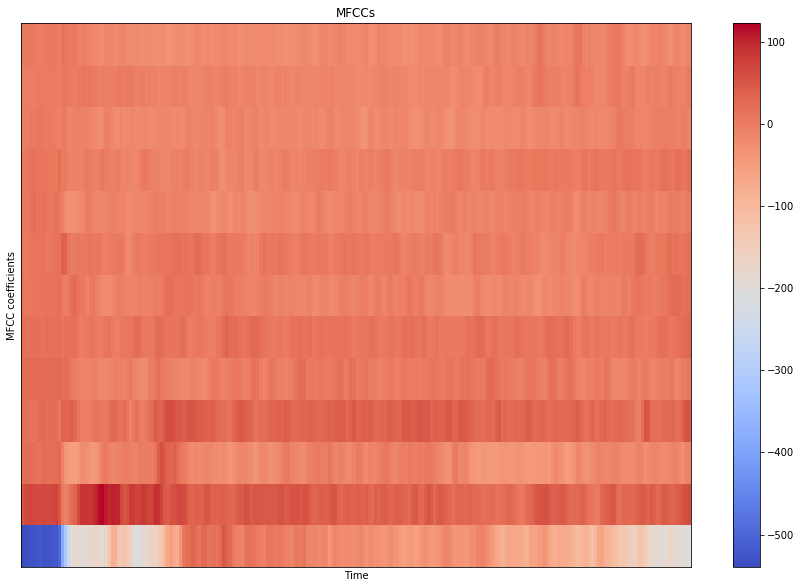

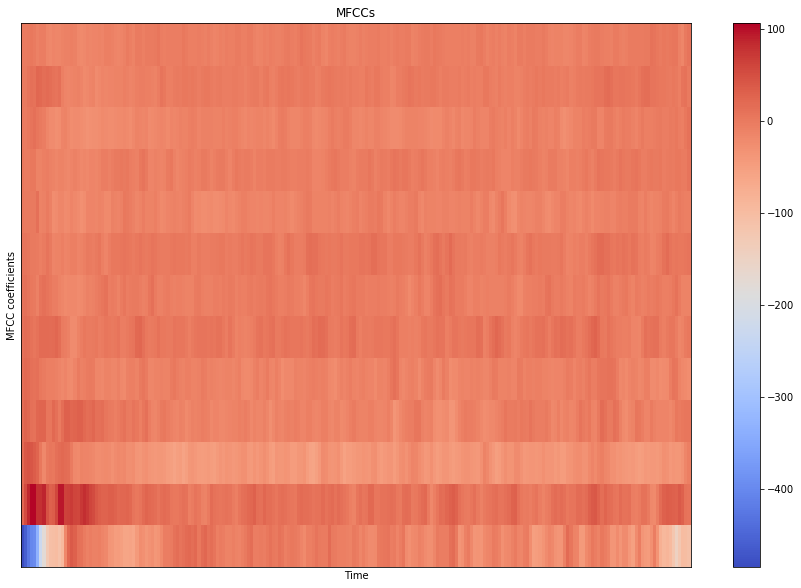

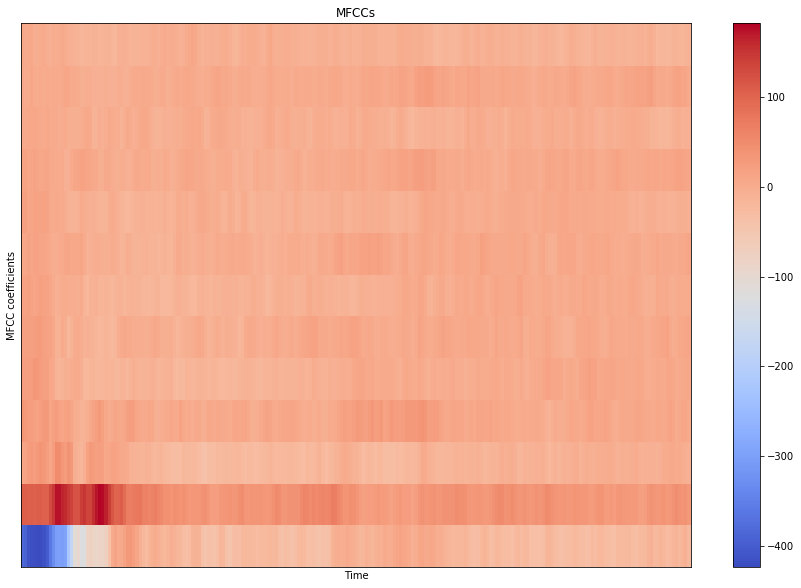

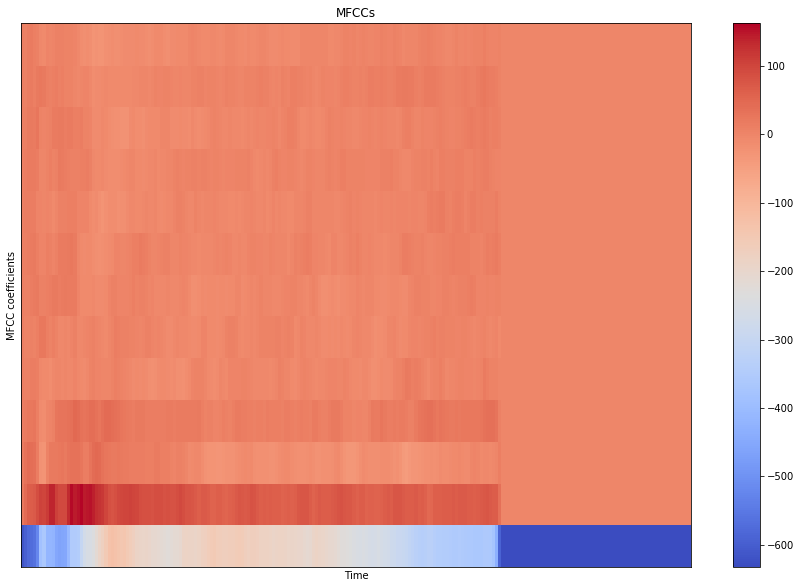

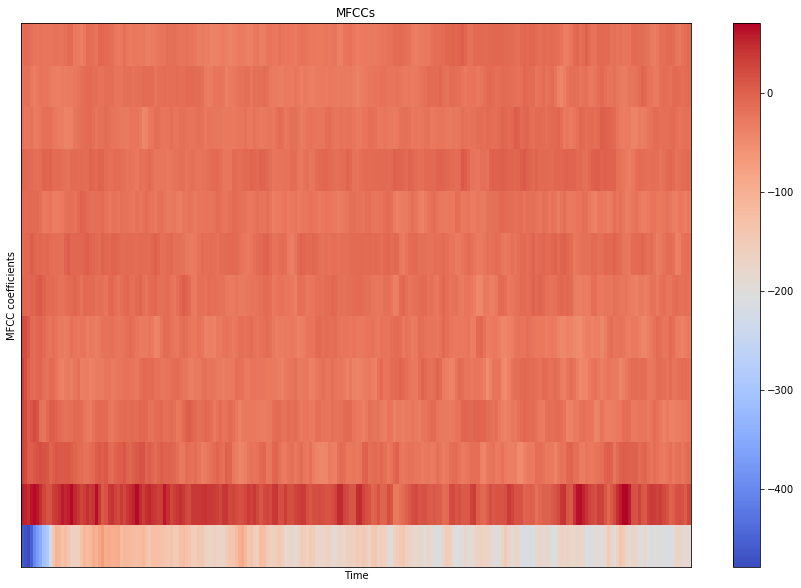

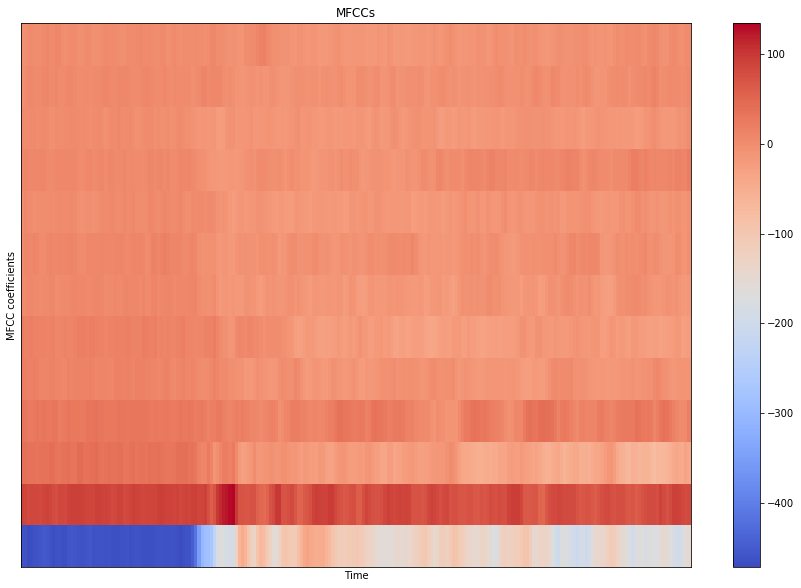

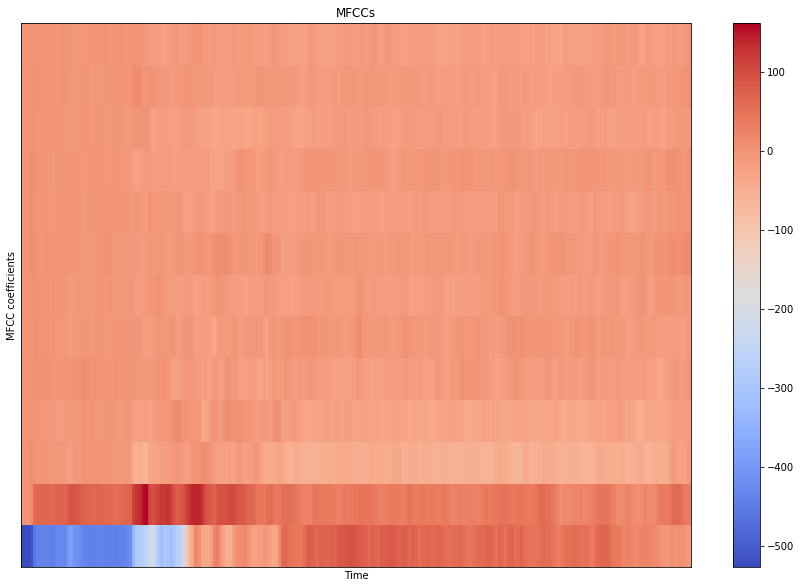

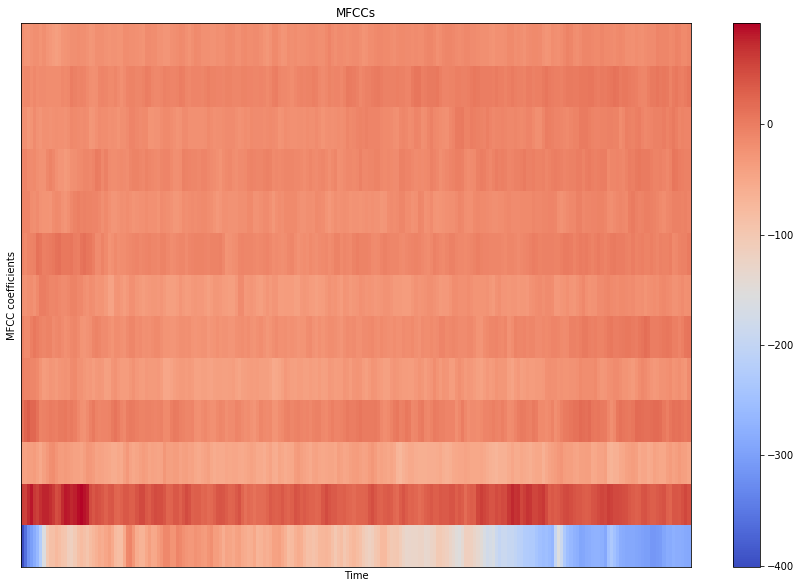

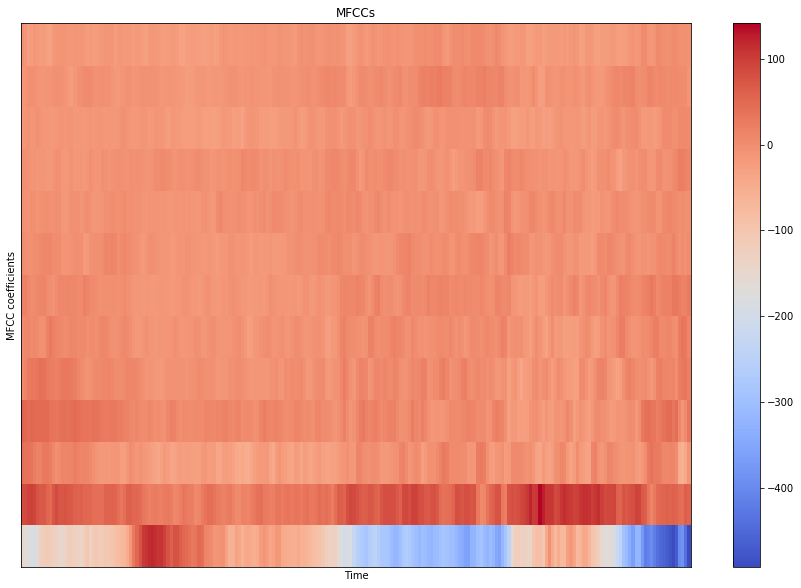

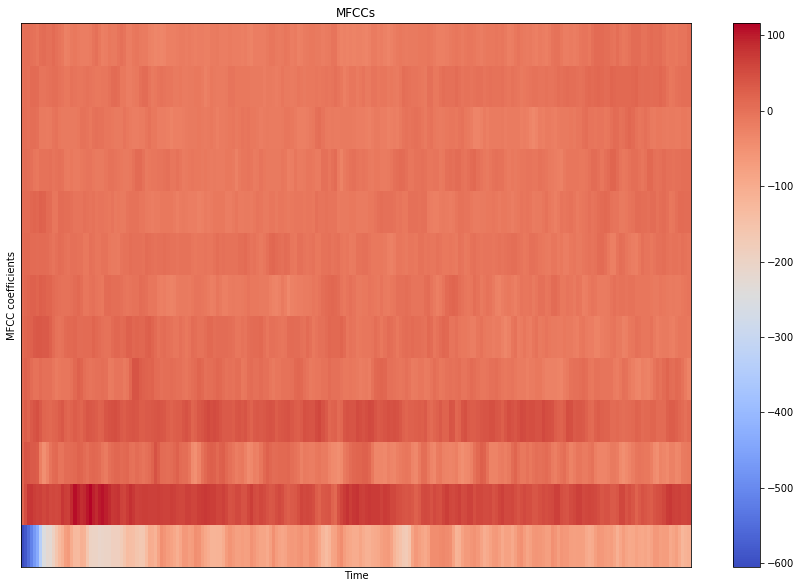

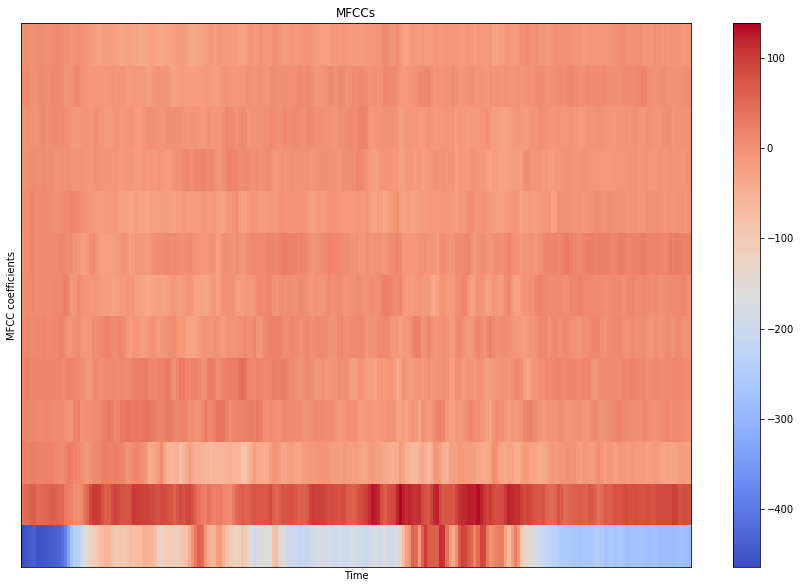

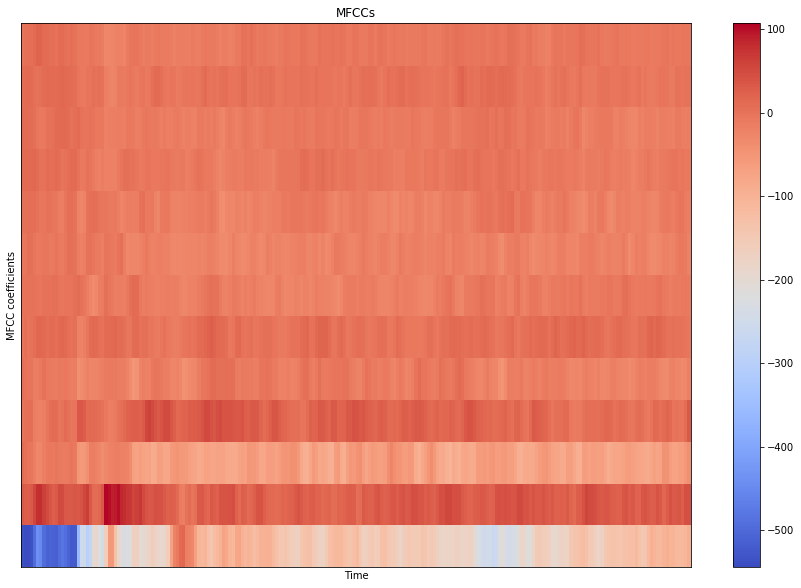

In [52]:
import librosa
import librosa.display
import IPython.display
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import glob


%matplotlib inline

FIG_SIZE = (15,10)

folder_list = glob.glob("data/*")
print(folder_list)
print(len(folder_list))
file_list=[]
for i in range(len(folder_list)):
    file=glob.glob(folder_list[i]+"/*")
    file_list.append(file)
    sig=[None]*len(file_list[i])
    sr=[None]*len(file_list[i])
    print(len(Y))
    index=0
    for j in file_list[i]:
        sig[index], sr[index] = librosa.load(j, sr=22050)
        fft = np.fft.fft(sig[index])

        # 복소공간 값 절댓갑 취해서, magnitude 구하기
        magnitude = np.abs(fft) 

        # Frequency 값 만들기
        f = np.linspace(0,sr[index],len(magnitude))

        # 푸리에 변환을 통과한 specturm은 대칭구조로 나와서 high frequency 부분 절반을 날려고 앞쪽 절반만 사용한다.
        left_spectrum = magnitude[:int(len(magnitude)/2)]
        left_f = f[:int(len(magnitude)/2)]
        # STFT -> spectrogram
        hop_length = 512  # 전체 frame 수
        n_fft = 2048  # frame 하나당 sample 수

        # calculate duration hop length and window in seconds
        hop_length_duration = float(hop_length)/sr[index]
        n_fft_duration = float(n_fft)/sr[index]

        # STFT
        stft = librosa.stft(sig[index], n_fft=n_fft, hop_length=hop_length)

        # 복소공간 값 절댓값 취하기
        magnitude = np.abs(stft)

        # magnitude > Decibels 
        log_spectrogram = librosa.amplitude_to_db(magnitude)
        # MFCCs
        # extract 13 MFCCs
        MFCCs = librosa.feature.mfcc(sig[index], sr[index], n_fft=n_fft, hop_length=hop_length, n_mfcc=40)
        #display MFCCs
        plt.figure(figsize=FIG_SIZE)
        librosa.display.specshow(MFCCs, sr=sr[index], hop_length=hop_length)
        plt.xlabel("Time")
        plt.ylabel("MFCC coefficients")
        plt.colorbar()
        plt.title("MFCCs")
        
        #save image
        fig = plt.gcf() 
        fig.savefig(str(i)+'-'+str(index)+'.png')
        index+=1
print("complete!")       